# **<h3 align="center">Machine Learning 2024-25</h3>**
## **<h3 align="center">To Grant or Not to Grant: Deciding on Compensation Benefits</h3>**


**Group 38 members:**<br>
Ana Marta Azinheira  - 20240496@novaims.unl.pt<br>
Braulio Damba - 20240007@novaims.unl.pt<br>
Henry Tirla  - 20221016@novaims.unl.pt<br>
Marco Galão  - r20201545@novaims.unl.pt<br>
Rodrigo Sardinha - 20211627@novaims.unl.pt<br>

**Table of Contents** <br>
* [1. Imports](#imports)
    * [1.1. Import Libraries](#import_libraries)
    * [1.2. Import Dataset](#import_dataset)
* [2. Exploration](#exploration)
  * [2.1. Description of the Dataset's Structure](#dataset_structure)
  * [2.2. Exploration of the Dataset](#dataset_exploration)
* [3. Preprocessing](#preprocessing)
  * [3.1. Set Index](#set_index)
  * [3.2. Constant Features](#constant_features)
  * [3.3. Duplicates](#duplicates)
  * [3.4. Missing Values](#missing_values)
  * [3.5. Data Types](#data_types)
  * [3.6. Check for Inconsistencies](#inconsistencies)
  * [3.7. Train-Validation Split](#split)
  * [3.8. Outliers](#outliers)
    * [3.8.1. Defining Features](#defining_features)
    * [3.8.2. Visualizations](#visualizations)
    * [3.8.3. Filtering](#filtering)
      * [3.8.3.1. Filter 1: IQR Method](#filter1)
      * [3.8.3.2. Filter 2: Manual](#filter2)
      * [3.8.3.3. Filter 3: Winsorization](#filter3)
  * [3.9. Missing Values Imputation](#missing_values_imputation)
* [4. Feature Engineering](#feature_engineering)
* [5. Feature Selection](#feature_selection)
  * [5.1. SMOTE](#smote)
  * [5.2. Filter Methods](#filter)
  * [5.3. Wrapper Methods](#wrapper)
  * [5.4. Embedded Methods](#embedded)
  * [5.5. Voting for Feature Selection](#voting)
* [6. Modelling and Assessment](#modelling_and_assessment)
* [7. Deployment](#deployment)

## 3.7. Train-Validation Split <a id="split"></a>

<div class="alert alert-block alert-success"> <a id = "imports"></a>

# 1. Imports

## 1.1. Import the Libraries <a class="anchor" id="import_libraries"></a>


In [577]:
# General Libraries
import pandas as pd
import numpy as np
import re
from math import ceil
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import spearmanr

# Machine Learning and Data Preprocessing
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, LabelEncoder
from imblearn.over_sampling import SMOTE

# Feature Selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoCV, LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier # pip install xgboost scikit-learn
from sklearn.svm import SVC

# Model Evaluation
from sklearn.metrics import f1_score

# Visualization Settings
%config InlineBackend.figure_format = 'retina'
sns.set()

# Omit Warnings
import warnings
warnings.filterwarnings("ignore")

## 1.2. Import the DataSet <a class="anchor" id="import_dataset"></a>

In [578]:
df = pd.read_csv('../data/train_data.csv', sep=',')

In [579]:
df.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'Claim Injury Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender',
       'IME-4 Count', 'Industry Code', 'Industry Code Description',
       'Medical Fee Region', 'OIICS Nature of Injury Description',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
       'Agreement Reached', 'WCB Decision', 'Number of Dependents'],
      dtype='object')

In [580]:
#importing the test dataset
df_test = pd.read_csv('../data/test_data.csv', sep=',')

In [581]:
df_test.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'First Hearing Date', 'Gender', 'IME-4 Count',
       'Industry Code', 'Industry Code Description', 'Medical Fee Region',
       'OIICS Nature of Injury Description', 'WCIO Cause of Injury Code',
       'WCIO Cause of Injury Description', 'WCIO Nature of Injury Code',
       'WCIO Nature of Injury Description', 'WCIO Part Of Body Code',
       'WCIO Part Of Body Description', 'Zip Code', 'Number of Dependents'],
      dtype='object')

In [582]:
#importing the sample submission dataset
df_sample_submission = pd.read_csv('../data/sample_submission.csv', sep=',')

In [583]:
df_sample_submission.columns

Index(['Claim Identifier', 'Claim Injury Type'], dtype='object')

In [584]:
df[["Agreement Reached", "WCB Decision", "Claim Injury Type"]].head()

,Agreement Reached,WCB Decision,Claim Injury Type
0,0.0,Not Work Related,2. NON-COMP
1,1.0,Not Work Related,4. TEMPORARY
2,0.0,Not Work Related,4. TEMPORARY
3,NaN,NaN,NaN
4,0.0,Not Work Related,2. NON-COMP


In [585]:
# Check if specific columns are in df_test and store results in a dictionary
column_check = {col: col in df_test.columns for col in ["Agreement Reached", "WCB Decision", "Claim Injury Type"]}

print(column_check)

{'Agreement Reached': False, 'WCB Decision': False, 'Claim Injury Type': False}


### Temporarily dropping secondary target variables; they will be explored in the open-ended section

In [586]:
df.drop(columns=["Agreement Reached", "WCB Decision"], inplace=True)

<div class="alert alert-block alert-success"> <a id = "exploration"></a>

# 2. Exploration

## 2.1. Description of the Dataset's Structure <a class="anchor" id="dataset_structure"></a>

- *Accident Date* - Injury date of the claim.

- *Age at Injury* - Age of injured worker when the injury occurred.
    
- *Alternative Dispute Resolution* - Adjudication processes external to the Board.

- *Assembly Date* - The date the claim was first assembled.
    
- *Attorney/Representative* - Is the claim being represented by an Attorney?

- *Average Weekly Wage* - The wage used to calculate workers’ compensation, disability, or an Paid Leave wage replacement benefits.

- *Birth Year* - The reported year of birth of the injured worker.
    
- *C-2 Date* - Date of receipt of the Employer's Report of Work-Related Injury/Illness or equivalent (formerly Form C-2).
    
- *C-3 Date* - Date Form C-3 (Employee Claim Form) was received.
    
- *Carrier Name* - Name of primary insurance provider responsible for providing workers’ compensation coverage to the injured worker’s employer.
    
- *Carrier Type* - Type of primary insurance provider responsible for providing workers’ compensation coverage.

- *Claim Identifier* - Unique identifier for each claim, assigned by WCB.

- *County of Injury* - Name of the New York County where the injury occurred.

- *COVID-19 Indicator* - Indication that the claim may be associated with COVID-19.

- *District Name* - Name of the WCB district office that oversees claims for that region or area of the state.

- *First Hearing Date* - Date the first hearing was held on a claim at a WCB hearing location. A blank date means the claim has not yet had a hearing held.

- *Gender* - The reported gender of the injured worker.

- *IME-4 Count* - Number of IME-4 forms received per claim. The IME-4 form is the “Independent Examiner's Report of Independent Medical Examination” form.

- *Industry Code* - NAICS code and descriptions are available at: https://www.naics.com/search-naics-codes-by-industry/.

- *Industry Code Description* - 2-digit NAICS industry code description used to classify businesses according to their economic activity.

- *Medical Fee Region* - Approximate region where the injured worker would receive medical service.

- *OIICS Nature of Injury Description* - The OIICS nature of injury codes & descriptions are available at https://www.bls.gov/iif/oiics_manual_2007.pdf.

- *WCIO Cause of Injury Code* - The WCIO cause of injury codes & descriptions are at https://www.guarantysupport.com/wp-content/uploads/2024/02/WCIO-Legacy.pdf

- *WCIO Cause of Injury Description* - See description of field above.

- *WCIO Nature of Injury Code* - The WCIO nature of injury are available at https://www.guarantysupport.com/wp-content/uploads/2024/02/WCIO-Legacy.pdf

- *WCIO Nature of Injury Description* - See description of field above.

- *WCIO Part Of Body Code* - The WCIO part of body codes & descriptions are available at https://www.guarantysupport.com/wp-content/uploads/2024/02/WCIO-Legacy.pdf

- *WCIO Part Of Body Description* - See description of field above.

- *Zip Code* - The reported ZIP code of the injured worker’s home address.

- *Agreement Reached* - Binary variable: Yes if there is an agreement without the involvement of the WCB -> unknown at the start of a claim.

- *WCB Decision* - Multiclass variable: Decision of the WCB relative to the claim: “Accident” means that claim refers to workplace accident, “Occupational Disease” means illness from the workplace. -> requires WCB deliberation so it is unknown at start of claim.

- *Claim Injury Type* - Main target variable: Deliberation of the WCB relative to benefits awarded to the claim. Numbering indicates severity.

## 2.2. Exploration of the Dataset <a class="anchor" id="dataset_exploration"></a>

In [587]:
df.shape

(593471, 31)

In [588]:
df.head().T

,0,1,2,3,4
Accident Date,2019-12-30,2019-08-30,2019-12-06,NaN,2019-12-30
Age at Injury,31.0,46.0,40.0,NaN,61.0
Alternative Dispute Resolution,N,N,N,NaN,N
Assembly Date,2020-01-01,2020-01-01,2020-01-01,2020-01-01,2020-01-01
Attorney/Representative,N,Y,N,NaN,N
Average Weekly Wage,0.0,1745.93,1434.8,NaN,NaN
Birth Year,1988.0,1973.0,1979.0,NaN,1958.0
C-2 Date,2019-12-31,2020-01-01,2020-01-01,NaN,2019-12-31
C-3 Date,NaN,2020-01-14,NaN,NaN,NaN
Carrier Name,NEW HAMPSHIRE INSURANCE CO,ZURICH AMERICAN INSURANCE CO,INDEMNITY INSURANCE CO OF,NaN,STATE INSURANCE FUND


In [589]:
df.tail().T

,593466,593467,593468,593469,593470
Accident Date,NaN,2022-12-13,NaN,NaN,NaN
Age at Injury,NaN,72.0,NaN,NaN,NaN
Alternative Dispute Resolution,NaN,N,NaN,NaN,NaN
Assembly Date,2022-12-31,2022-12-31,2022-12-31,2022-12-31,2022-12-31
Attorney/Representative,NaN,N,NaN,NaN,NaN
Average Weekly Wage,NaN,0.0,NaN,NaN,NaN
Birth Year,NaN,1950.0,NaN,NaN,NaN
C-2 Date,NaN,2022-12-31,NaN,NaN,NaN
C-3 Date,NaN,NaN,NaN,NaN,NaN
Carrier Name,NaN,TECHNOLOGY INSURANCE CO. INC.,NaN,NaN,NaN


In [590]:
#checking the data types of the variables of the training dataset and if there are any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

- From this information, we can see that the variables 'Assembly Date' and 'Claim Identifier' have no missing values.

In [591]:
#getting the main descriptive statistics only for the numerical variables

df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,574026.0,42.11,1.426000e+01,0.0,31.0,42.0,54.0,117.0
Average Weekly Wage,545375.0,491.09,6.092920e+03,0.0,0.0,0.0,841.0,2828079.0
Birth Year,544948.0,1886.77,4.146400e+02,0.0,1965.0,1977.0,1989.0,2018.0
Claim Identifier,593471.0,23667598.79,1.079271e+08,5393066.0,5593414.5,5791212.0,5991000.5,999891667.0
IME-4 Count,132803.0,3.21,2.830000e+00,1.0,1.0,2.0,4.0,73.0
Industry Code,564068.0,58.65,1.964000e+01,11.0,45.0,61.0,71.0,92.0
OIICS Nature of Injury Description,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WCIO Cause of Injury Code,558386.0,54.38,2.587000e+01,1.0,31.0,56.0,75.0,99.0
WCIO Nature of Injury Code,558369.0,41.01,2.221000e+01,1.0,16.0,49.0,52.0,91.0
WCIO Part Of Body Code,556944.0,39.74,2.237000e+01,-9.0,33.0,38.0,53.0,99.0


<br>

- 'Claim Identifier': set it as the df index (and check for duplicates)

- convert to integer:
    - 'Age at Injury': also explore min and max & check consistency with 'Birth Year'
    - 'Birth Year': also explore zeros & treat outliers (born in 2018)
    - 'IME-4 Count': also treat outlier
    - 'Industry Code': also check consistency with the link
    - 'Number of Dependents': not in metadata (make assumption) & seems uniformly distributed (strange - similar number of workers with 4, 5 or 6 dependents and workers with 0 or 1 dependents)

- special missing values:
    - 'OIICS Nature of Injury Description': full of missing values (drop this column)

- 'Average Weekly Wage': explore wage of 0 & treat outliers
- 'WCIO Cause of Injury Code': explore codes meaning (link doesn't work) & check consistency with 'WCIO Cause of Injury Description'
- 'WCIO Part Of Body Code': explore codes meaning (link doesn't work) & treat outliers (can accept negative codes?) & check consistency with 'WCIO Part Of Body Description'
- 'Agreement Reached': seems okay (missing value at the start of the claim)


In [592]:
# getting the main descriptive statistics for the remaining cathegorical variables

df.describe(include = ['object']).T

,count,unique,top,freq
Accident Date,570337,5539,2020-03-01,1245
Alternative Dispute Resolution,574026,3,N,571412
Assembly Date,593471,1096,2020-03-06,1422
Attorney/Representative,574026,2,N,392291
C-2 Date,559466,2475,2021-05-11,1847
C-3 Date,187245,1648,2021-04-21,350
Carrier Name,574026,2046,STATE INSURANCE FUND,111144
Carrier Type,574026,8,1A. PRIVATE,285368
Claim Injury Type,574026,8,2. NON-COMP,291078
County of Injury,574026,63,SUFFOLK,60430


<br>

- convert to datetime (check if dates are from the start of 2020 till the end of 2022):
    - 'Accident Date'
    - 'Assembly Date'
    - 'C-2 Date'
    - 'C-3 Date'
    - 'First Hearing Date' (missing values: a blank date means the claim has not yet had a hearing held)

- convert to binary:
    - 'Alternative Dispute Resolution': maybe the 'U's represent missing values (we can make this assumption)
    - 'Attorney/Representative'
    - 'COVID-19 Indicator'

- special missing values:
    - 'Carrier Type': replace 'UNKNOWN' (maybe also '5D. SPECIAL FUND - UNKNOWN') & explore online (for example, do the code represents a category)
    - 'Gender': explore values 'U' and 'X' (maybe 'U' means Unknown or Unspecified, and 'X' refers to Non-Binary, Gender X, or Other gender identities) - make assumptions
    - 'Medical Fee Region': explore values & 'UK' maybe stands for Unknown or Unclassified
    - 'County of Injury': replace 'UNKNOWN' & explore the different values

- 'Claim Injury Type': seems okay (just need to understand the different values)
- 'Carrier Name': explore (for example, check if the same insurance provider is written differently)
- 'County of Injury': seems okay (just need to explore the different values)
- 'District Name': seems okay (just need to explore if the values correspond to NY districts)
- 'Industry Code Description': seems okay (just need to check consistency with the link of 'Industry Code')
- 'WCIO Cause of Injury Description': seems okay (just need to explore values & check consistency with 'WCIO Cause of Injury Code')
- 'WCIO Part Of Body Description': seems okay (just need to explore values & check consistency with 'WCIO Part Of Body Code')
- 'Zip Code': seems okay (just need to explore values)
- 'WCB Decision': just 'Not Work Related', which is not stated in the metadata (missing value at the start of the claim, because requires WCB deliberation)

<div class="alert alert-block alert-success"> <a id = "preprocessing"></a>

# 3. Preprocessing

## 3.1. Set Index <a id="set_index"></a>

Let's check if 'Claim Identifier' is appropriate for index

In [593]:
# Ensure all values in 'Claim Identifier' are converted to strings for length calculation
claim_lengths = df["Claim Identifier"].astype(str).apply(len)

# Count occurrences of each unique length
length_counts = claim_lengths.value_counts(normalize=True) * 100

# Display the results
print("Number of values by length in 'Claim Identifier':")
print(length_counts.round(2))

Number of values by length in 'Claim Identifier':
Claim Identifier
7    96.72
9     3.28
Name: proportion, dtype: float64


In [594]:
# Filter rows by length of 'Claim Identifier' (7 or 9 characters)
claim_id_7_length = df[df['Claim Identifier'].astype(str).apply(len) == 7]
claim_id_9_length = df[df['Claim Identifier'].astype(str).apply(len) == 9]

In [595]:
claim_id_7_length.describe().T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,574026.0,4.211427e+01,14.256432,0.0,31.00,42.0,54.00,117.0
Average Weekly Wage,545375.0,4.910883e+02,6092.918120,0.0,0.00,0.0,841.00,2828079.0
Birth Year,544948.0,1.886768e+03,414.644423,0.0,1965.00,1977.0,1989.00,2018.0
Claim Identifier,574026.0,5.778956e+06,222308.226013,5393066.0,5586764.25,5778282.5,5971328.75,6165685.0
IME-4 Count,132803.0,3.207337e+00,2.832303,1.0,1.00,2.0,4.00,73.0
Industry Code,564068.0,5.864531e+01,19.644175,11.0,45.00,61.0,71.00,92.0
OIICS Nature of Injury Description,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WCIO Cause of Injury Code,558386.0,5.438114e+01,25.874281,1.0,31.00,56.0,75.00,99.0
WCIO Nature of Injury Code,558369.0,4.101384e+01,22.207521,1.0,16.00,49.0,52.00,91.0
WCIO Part Of Body Code,556944.0,3.973815e+01,22.365940,-9.0,33.00,38.0,53.00,99.0


In [596]:
claim_id_7_length.describe(include='object').T

,count,unique,top,freq
Accident Date,570337,5539,2020-03-01,1245
Alternative Dispute Resolution,574026,3,N,571412
Assembly Date,574026,897,2020-03-06,1413
Attorney/Representative,574026,2,N,392291
C-2 Date,559466,2475,2021-05-11,1847
C-3 Date,187245,1648,2021-04-21,350
Carrier Name,574026,2046,STATE INSURANCE FUND,111144
Carrier Type,574026,8,1A. PRIVATE,285368
Claim Injury Type,574026,8,2. NON-COMP,291078
County of Injury,574026,63,SUFFOLK,60430


In [597]:
claim_id_9_length.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Accident Date,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age at Injury,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alternative Dispute Resolution,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Assembly Date,19445,1096,2020-06-16,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Attorney/Representative,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average Weekly Wage,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Birth Year,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C-2 Date,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C-3 Date,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Carrier Name,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Decision:** The records with a 9-length Claim Identifier account for just 3.28% of the data and have missing values across all columns, except for “Assembly Date”. Since they provide very little information, we’ve decided to drop them to maintain data quality (with all records now having a 7-length Claim Identifier) and improve model performance

In [598]:
df_no_claim_id_9_length = df[df['Claim Identifier'].astype(str).apply(len) != 9]

**Note:** All the transformations we apply in the train dataset, we should also apply in the test dataset (except deleting rows)

In [599]:
# df_test_no_claim_id_9_length = df_test[df_test['Claim Identifier'].astype(str).apply(len) != 9]

Let's check if "Claim Identifier" has missing values

In [600]:
df_no_claim_id_9_length["Claim Identifier"].isna().sum()

0

**Conclusion:** No missing values

Let's check if "Claim Identifier" has duplicates

In [601]:
df_no_claim_id_9_length["Claim Identifier"].duplicated().sum()

0

**Conclusion:** No duplicates

In [602]:
df_index = df_no_claim_id_9_length.set_index("Claim Identifier")
df_index.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,4.0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,6.0
5393887,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,II,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,1.0
5393863,2019-12-26,67.0,N,2020-01-01,N,0.00,1952.0,2019-12-31,NaN,INDEMNITY INS. OF N AMERICA,...,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,38.0,SHOULDER(S),11772,5.0


In [603]:
df_test_index = df_test.set_index("Claim Identifier")

## 3.2. Constant Features <a id="constant_features"></a>

In [604]:
variances = df_index.var(numeric_only=True)
variances[variances == 0]

Series([], dtype: float64)

**Conclusion**: There are no univariate features

## 3.3. Duplicates <a id="duplicates"></a>

In [605]:
# Check for duplicated observations
df_index.duplicated().sum()

1

**Conclusion:** There is 1 duplicated observation. Let's drop it

In [606]:
# Drop all duplicates
df_no_duplicates = df_index.drop_duplicates(keep='first')

In [607]:
# df_test_no_duplicates = df_test_index.drop_duplicates(keep='first')

## 3.4. Missing Values <a id="missing_values"></a>

- columns with just missing values:
  - 'OIICS Nature of Injury Description'
- hidden missing values:
  - 'Carrier Type'
  - 'Gender'
  - 'Medical Fee Region'
  - 'Alternative Dispute Resolution'
  - 'County of Injury'

In [608]:
df_treat_missing = df_no_duplicates.copy()

In [609]:
df_test_treat_missing = df_test_index.copy()

Drop column "OIICS Nature of Injury Description", because it has only missing values

In [610]:
df_treat_missing["OIICS Nature of Injury Description"].value_counts(dropna=False, normalize=True) * 100

OIICS Nature of Injury Description
NaN    100.0
Name: proportion, dtype: float64

In [611]:
df_treat_missing.drop(columns=["OIICS Nature of Injury Description"], inplace=True)

In [612]:
df_test_treat_missing.drop(columns=["OIICS Nature of Injury Description"], inplace=True)

Check hidden missing values

In [613]:
df_treat_missing["Carrier Type"].value_counts(dropna=False, normalize=True) * 100

Carrier Type
1A. PRIVATE                                    49.713340
3A. SELF PUBLIC                                21.239493
2A. SIF                                        19.362223
4A. SELF PRIVATE                                9.196115
UNKNOWN                                         0.309046
5D. SPECIAL FUND - UNKNOWN                      0.178215
5C. SPECIAL FUND - POI CARRIER WCB MENANDS      0.000871
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)     0.000697
Name: proportion, dtype: float64

In [614]:
df_treat_missing[df_treat_missing["Carrier Type"] == "UNKNOWN"].describe().T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,1774.0,37.949267,17.329159,0.0,28.0,38.0,51.0,79.0
Average Weekly Wage,1682.0,10.470488,103.732252,0.0,0.0,0.0,0.0,2500.0
Birth Year,1681.0,1710.386675,676.139876,0.0,1960.0,1974.0,1987.0,2008.0
IME-4 Count,116.0,2.293103,1.652493,1.0,1.0,2.0,3.0,11.0
Industry Code,625.0,46.411200,18.525940,11.0,23.0,48.0,56.0,92.0
WCIO Cause of Injury Code,387.0,52.299742,26.988350,1.0,28.5,45.0,75.0,99.0
WCIO Nature of Injury Code,366.0,47.117486,27.002483,1.0,20.5,52.0,59.0,90.0
WCIO Part Of Body Code,555.0,23.819820,33.051103,-9.0,-9.0,23.0,46.0,99.0
Number of Dependents,1774.0,3.016347,1.997817,0.0,1.0,3.0,5.0,6.0


In [615]:
df_treat_missing[df_treat_missing["Carrier Type"] == "UNKNOWN"].describe(include='object').T

,count,unique,top,freq
Accident Date,1719,941,2001-09-11,56
Alternative Dispute Resolution,1774,1,N,1774
Assembly Date,1774,679,2021-01-04,8
Attorney/Representative,1774,2,Y,1079
C-2 Date,572,375,2022-09-27,7
C-3 Date,1421,696,2020-02-03,8
Carrier Name,1774,1,*** CARRIER UNDETERMINED ***,1774
Carrier Type,1774,1,UNKNOWN,1774
Claim Injury Type,1774,5,2. NON-COMP,1529
County of Injury,1774,57,QUEENS,404


**Decision:** 'UNKNOWN' indicates that the type of the insurance provider was unavailable or not recorded at the time the data was collected, so it should be replaced with np.nan (instead of dropping because they have meaningful information)

In [616]:
df_treat_missing["Gender"].value_counts(dropna=False, normalize=True) * 100

Gender
M    58.397631
F    40.773660
U     0.820696
X     0.008014
Name: proportion, dtype: float64

In [617]:
df_treat_missing[df_treat_missing["Gender"] == "U"].describe().T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,4711.0,39.962428,14.608975,0.0,29.0,38.0,52.0,84.00
Average Weekly Wage,4488.0,264.574615,597.232754,0.0,0.0,0.0,0.0,5309.25
Birth Year,4471.0,1835.771416,514.235587,0.0,1965.0,1980.0,1991.0,2006.00
IME-4 Count,567.0,3.250441,2.921360,1.0,1.0,2.0,4.0,21.00
Industry Code,4656.0,55.841065,14.845878,11.0,48.0,61.0,62.0,92.00
WCIO Cause of Injury Code,4648.0,56.717083,26.655002,1.0,31.0,59.0,81.0,99.00
WCIO Nature of Injury Code,4648.0,45.676850,24.565870,1.0,28.0,52.0,59.0,91.00
WCIO Part Of Body Code,4642.0,44.548255,23.583361,-9.0,35.0,42.0,55.0,99.00
Number of Dependents,4711.0,3.009128,2.009352,0.0,1.0,3.0,5.0,6.00


In [618]:
df_treat_missing[df_treat_missing["Gender"] == "U"].describe(include='object').T

,count,unique,top,freq
Accident Date,4710,1248,2022-01-03,18
Alternative Dispute Resolution,4711,2,N,4709
Assembly Date,4711,771,2022-01-07,22
Attorney/Representative,4711,2,N,3940
C-2 Date,4652,879,2022-10-20,21
C-3 Date,754,501,2022-07-15,5
Carrier Name,4711,449,SAFETY NATIONAL CASUALTY CORP,693
Carrier Type,4711,7,1A. PRIVATE,3713
Claim Injury Type,4711,6,2. NON-COMP,3072
County of Injury,4711,63,QUEENS,451


**Decision:**
- Drop X: Since the X category represents a very small percentage (0.008%), it likely won’t provide much value for the predictive model, so it can be safely dropped.
- Convert U to missing: The U category may represent unknown or unspecified gender. Therefore, converting U to missing value seems a reasonable approach

In [619]:
df_treat_missing = df_treat_missing[df_treat_missing['Gender'] != 'X']

In [620]:
# df_test_treat_missing = df_test_treat_missing[df_test_treat_missing['Gender'] != 'X']

In [621]:
df_treat_missing["Medical Fee Region"].value_counts(dropna=False, normalize=True) * 100

Medical Fee Region
IV     46.333402
I      23.674211
II     14.814479
III     9.347380
UK      5.830527
Name: proportion, dtype: float64

**Decision:** 'UK' likely refers to 'Unknown'. Therefore, replacing 'UK' with np.nan allows subsequent analyses to focus on the regions that are known (I, II, III, IV) without the influence of ambiguous entries

In [622]:
df_treat_missing["Alternative Dispute Resolution"].value_counts(dropna=False, normalize=True) * 100

Alternative Dispute Resolution
N    99.544583
Y     0.454546
U     0.000871
Name: proportion, dtype: float64

**Decision:** Treating 'U' as a missing value (pd.NA) seems a good approach given the binary context of the variable and the low frequency of this value. This will help in maintaining data integrity and ensuring that our analysis is accurate and meaningful

In [623]:
((df_treat_missing["County of Injury"] == "UNKNOWN").mean() * 100).round(2)

0.21

In [624]:
df_treat_missing[df_treat_missing["County of Injury"] == "UNKNOWN"].describe().T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,1196.0,40.800167,14.929436,0.0,30.0,40.0,52.000,96.00
Average Weekly Wage,1136.0,418.093239,1132.090535,0.0,0.0,0.0,41.305,16849.07
Birth Year,1147.0,969.584133,989.704380,0.0,0.0,0.0,1980.000,2004.00
IME-4 Count,185.0,3.637838,3.074028,1.0,1.0,3.0,5.000,19.00
Industry Code,1162.0,49.833907,18.288268,11.0,33.0,53.0,62.000,92.00
WCIO Cause of Injury Code,1138.0,56.152021,26.700902,1.0,31.0,56.0,79.750,99.00
WCIO Nature of Injury Code,1139.0,44.277436,22.680681,1.0,28.0,49.0,52.000,91.00
WCIO Part Of Body Code,1153.0,45.218560,22.896145,-9.0,35.0,42.0,55.000,99.00
Number of Dependents,1196.0,2.987458,1.999333,0.0,1.0,3.0,5.000,6.00


In [625]:
df_treat_missing[df_treat_missing["County of Injury"] == "UNKNOWN"].describe(include='object').T

,count,unique,top,freq
Accident Date,1184,741,2020-03-01,7
Alternative Dispute Resolution,1196,2,N,1193
Assembly Date,1196,609,2021-02-22,7
Attorney/Representative,1196,2,N,937
C-2 Date,1157,608,2020-07-14,7
C-3 Date,265,214,2021-03-16,6
Carrier Name,1196,176,STATE INSURANCE FUND,324
Carrier Type,1196,6,1A. PRIVATE,807
Claim Injury Type,1196,8,2. NON-COMP,731
County of Injury,1196,1,UNKNOWN,1196


**Decision:** 'UNKNOWN' indicates that the name of the New York County where the injury occurred was unavailable or not recorded at the time the data was collected, so it should be replaced with np.nan (instead of dropping because they have meaningful information)

The missing values in the original DataFrame are represented as np.nan. To ensure consistency throughout our dataset, we will standardize the representation of missing values (as np.nan)

In [626]:
df_treat_missing["Carrier Type"].replace("UNKNOWN", np.nan, inplace=True)
df_treat_missing["Gender"].replace("U", np.nan, inplace=True)
df_treat_missing["Medical Fee Region"].replace("UK", np.nan, inplace=True)
df_treat_missing["Alternative Dispute Resolution"].replace("U", np.nan, inplace=True)
df_treat_missing["County of Injury"].replace("UNKNOWN", np.nan, inplace=True)

In [627]:
df_test_treat_missing["Carrier Type"].replace("UNKNOWN", np.nan, inplace=True)
df_test_treat_missing["Gender"].replace("U", np.nan, inplace=True)
df_test_treat_missing["Medical Fee Region"].replace("UK", np.nan, inplace=True)
df_test_treat_missing["Alternative Dispute Resolution"].replace("U", np.nan, inplace=True)
df_test_treat_missing["County of Injury"].replace("UNKNOWN", np.nan, inplace=True)

"As a general rule of thumb, only features that are missing in excess of 60% of their values should be considered for complete removal" (Fundamentals of Machine Learning for Predictive Data Analytics Algorithms).

In [628]:
# Calculate the percentage of missing values in each column
perc_missing_values = (df_treat_missing.isna().sum() / len(df_treat_missing) * 100).round(2)
perc_missing_values[perc_missing_values > 0].sort_values(ascending=False)

IME-4 Count                          76.87
First Hearing Date                   73.73
C-3 Date                             67.39
Medical Fee Region                    5.83
Birth Year                            5.07
Zip Code                              4.99
Average Weekly Wage                   4.99
WCIO Part Of Body Description         2.98
WCIO Part Of Body Code                2.98
WCIO Nature of Injury Description     2.73
WCIO Nature of Injury Code            2.73
WCIO Cause of Injury Description      2.72
WCIO Cause of Injury Code             2.72
C-2 Date                              2.54
Industry Code                         1.73
Industry Code Description             1.73
Gender                                0.82
Accident Date                         0.64
Carrier Type                          0.31
County of Injury                      0.21
dtype: float64

Let's evaluate the columns with more than 60% of missing values, before dropping them

**'IME-4 Count':**

In [629]:
df_treat_missing["IME-4 Count"].value_counts(dropna=False, normalize=True).sort_index() * 100

IME-4 Count
1.0      6.985273
2.0      6.010847
3.0      2.810904
4.0      2.400959
5.0      1.338028
6.0      1.119727
7.0      0.668666
8.0      0.549846
9.0      0.333636
10.0     0.254365
11.0     0.174571
12.0     0.140597
13.0     0.089899
14.0     0.068992
15.0     0.047563
16.0     0.037284
17.0     0.021778
18.0     0.024391
19.0     0.013764
20.0     0.009756
21.0     0.009234
22.0     0.005924
23.0     0.003310
24.0     0.002788
25.0     0.001220
26.0     0.001394
27.0     0.002439
28.0     0.000697
29.0     0.000871
30.0     0.000697
31.0     0.000348
32.0     0.000697
33.0     0.000348
34.0     0.000697
35.0     0.000174
36.0     0.000523
37.0     0.000174
39.0     0.000348
47.0     0.000174
48.0     0.000174
73.0     0.000174
NaN     76.866749
Name: proportion, dtype: float64

A value of 0 in "IME-4 Count" seems plausible, as it indicates that no forms were submitted for certain claims. Since there are no recorded instances with a value of 0, it raises the possibility that the existing missing values might actually represent cases where no forms were received, suggesting that some of these NaNs could be interpreted as 0. However, assuming all missing values correspond 0 is a very strong assumption

Due to this potential interpretation, we need to analyze the variable more carefully

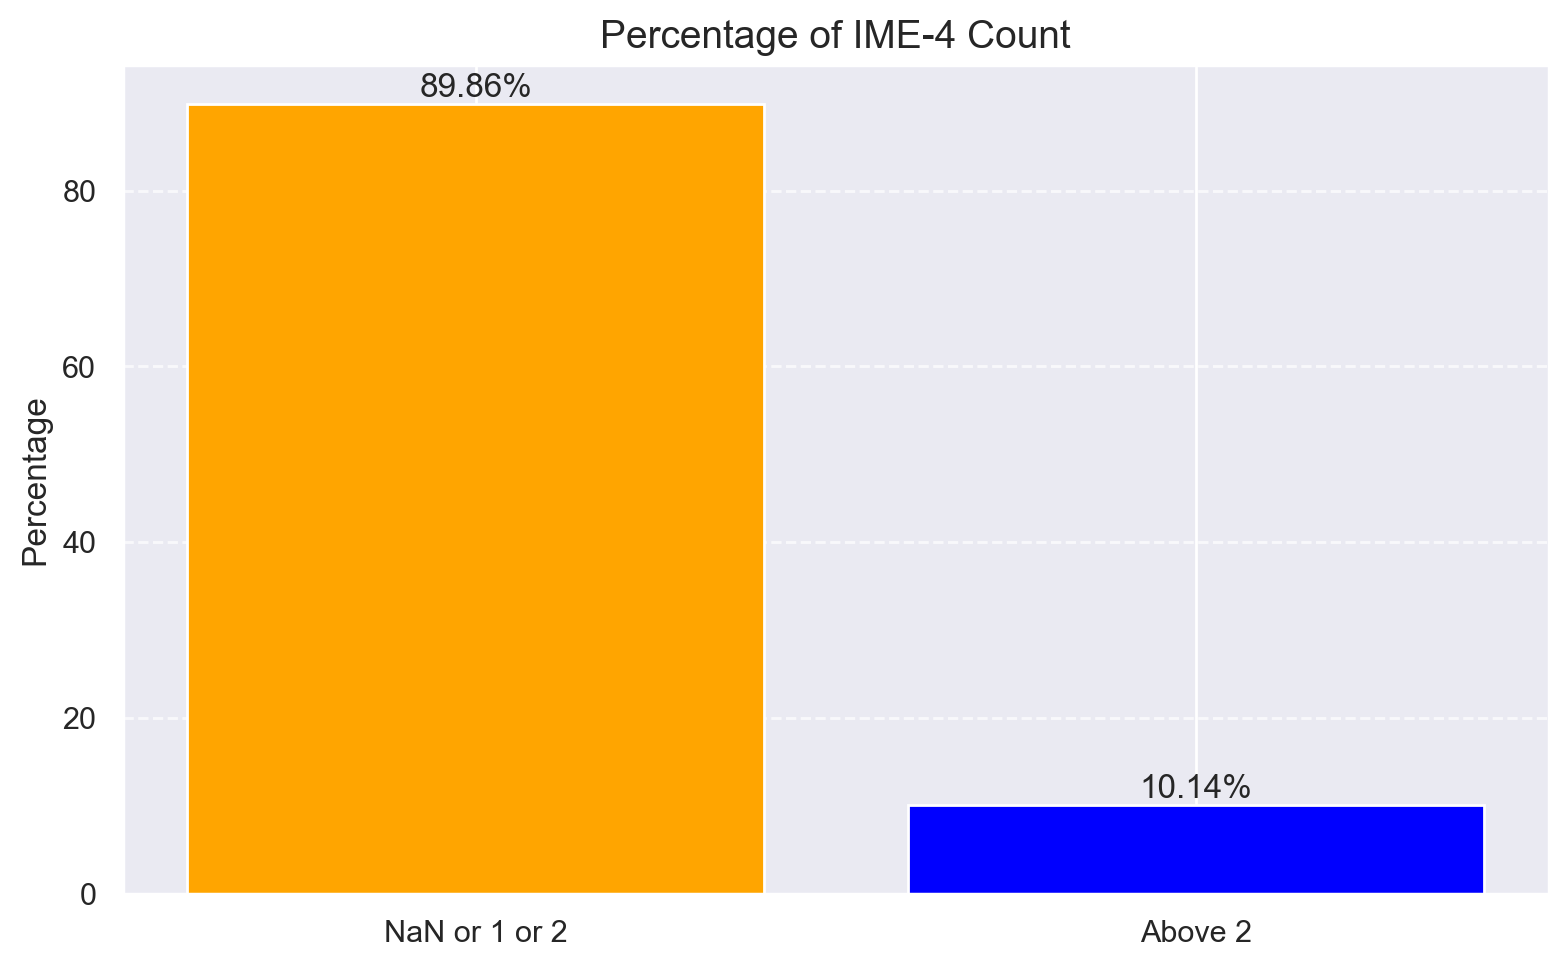

In [630]:
# Calculate the total number of entries
total_count = df_treat_missing['IME-4 Count'].count() + df_treat_missing['IME-4 Count'].isna().sum()

# Count NaN values and counts of 1 and 2
count_nan_or_1_or_2 = df_treat_missing['IME-4 Count'].isna().sum() + \
                      ((df_treat_missing['IME-4 Count'] == 1).sum()) + \
                      ((df_treat_missing['IME-4 Count'] == 2).sum())

# Count occurrences greater than 2
count_above_2 = (df_treat_missing['IME-4 Count'] > 2).sum()

# Create a summary DataFrame with percentages
summary_df = pd.DataFrame({
    'Category': ['NaN or 1 or 2', 'Above 2'],
    'Count': [count_nan_or_1_or_2, count_above_2]
})

# Calculate percentages
summary_df['Percentage'] = (summary_df['Count'] / total_count) * 100

# Create a bar chart for percentages
plt.figure(figsize=(8, 5))
bars = plt.bar(summary_df['Category'], summary_df['Percentage'], color=['orange', 'blue'])
plt.title('Percentage of IME-4 Count', fontsize=14)
plt.ylabel('Percentage', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

**Conclusion:** As a large portion of the dataset (around 90%) either has no information on IME-4 forms (which could indicate 0 IME-4 forms received per claim) or reports very low counts, the column may not add valuable insights or predictive power in modeling contexts. Therefore, we decided to drop this variable

In [631]:
df_treat_missing.drop(columns="IME-4 Count", inplace=True)

In [632]:
df_test_treat_missing.drop(columns="IME-4 Count", inplace=True)

**'First Hearing Date':** 
While this variable contains a significant proportion of missing values (73.73%), these missing values carry important information— a blank date indicates that the claim has not yet had a hearing. Therefore, we will retain this variable.

**'C-3 Date':** Similarly, C-3 Date also has a large proportion of missing values (67.39%). However, these missing values are meaningful because they may indicate that the form has not been received yet. Therefore, we will retain this variable.

Let's treat missing values (by row) 

Check the percentage and cumulative percentage of rows in the DataFrame based on the number of missing values

In [633]:
# Count the number of missing values per row
missing_counts = df_treat_missing.isna().sum(axis=1)

# Calculate the total number of rows
total_rows = len(df_treat_missing)

# Calculate the percentage of missing values per row
total_columns = df_treat_missing.shape[1]  # Total number of columns
missing_value_percentage_per_row = (missing_counts / total_columns) * 100

# Count the occurrences of each missing value percentage
missing_percentage_counts = missing_value_percentage_per_row.value_counts().sort_index()

# Calculate the percentage of rows corresponding to each unique count of missing values
perc_rows_count = missing_percentage_counts.values / total_rows * 100

# Create a DataFrame with missing values and their percentages
results_df = pd.DataFrame({
    'Missing Values (%)': missing_percentage_counts.index.round(2),
    'Rows Count (%)': perc_rows_count.round(2),
})

# Calculate cumulative percentage
results_df['Cumulative Rows Count (%)'] = perc_rows_count.cumsum().round(2)

# Set the index name
results_df.index.name = 'Missing Values'

# Display the results
results_df

,Missing Values (%),Rows Count (%),Cumulative Rows Count (%)
Missing Values,,,
0,0.00,14.61,14.61
1,3.57,19.00,33.62
2,7.14,51.36,84.98
3,10.71,10.81,95.79
4,14.29,1.36,97.16
5,17.86,0.15,97.31
6,21.43,0.04,97.35
7,25.00,0.07,97.43
8,28.57,0.40,97.82


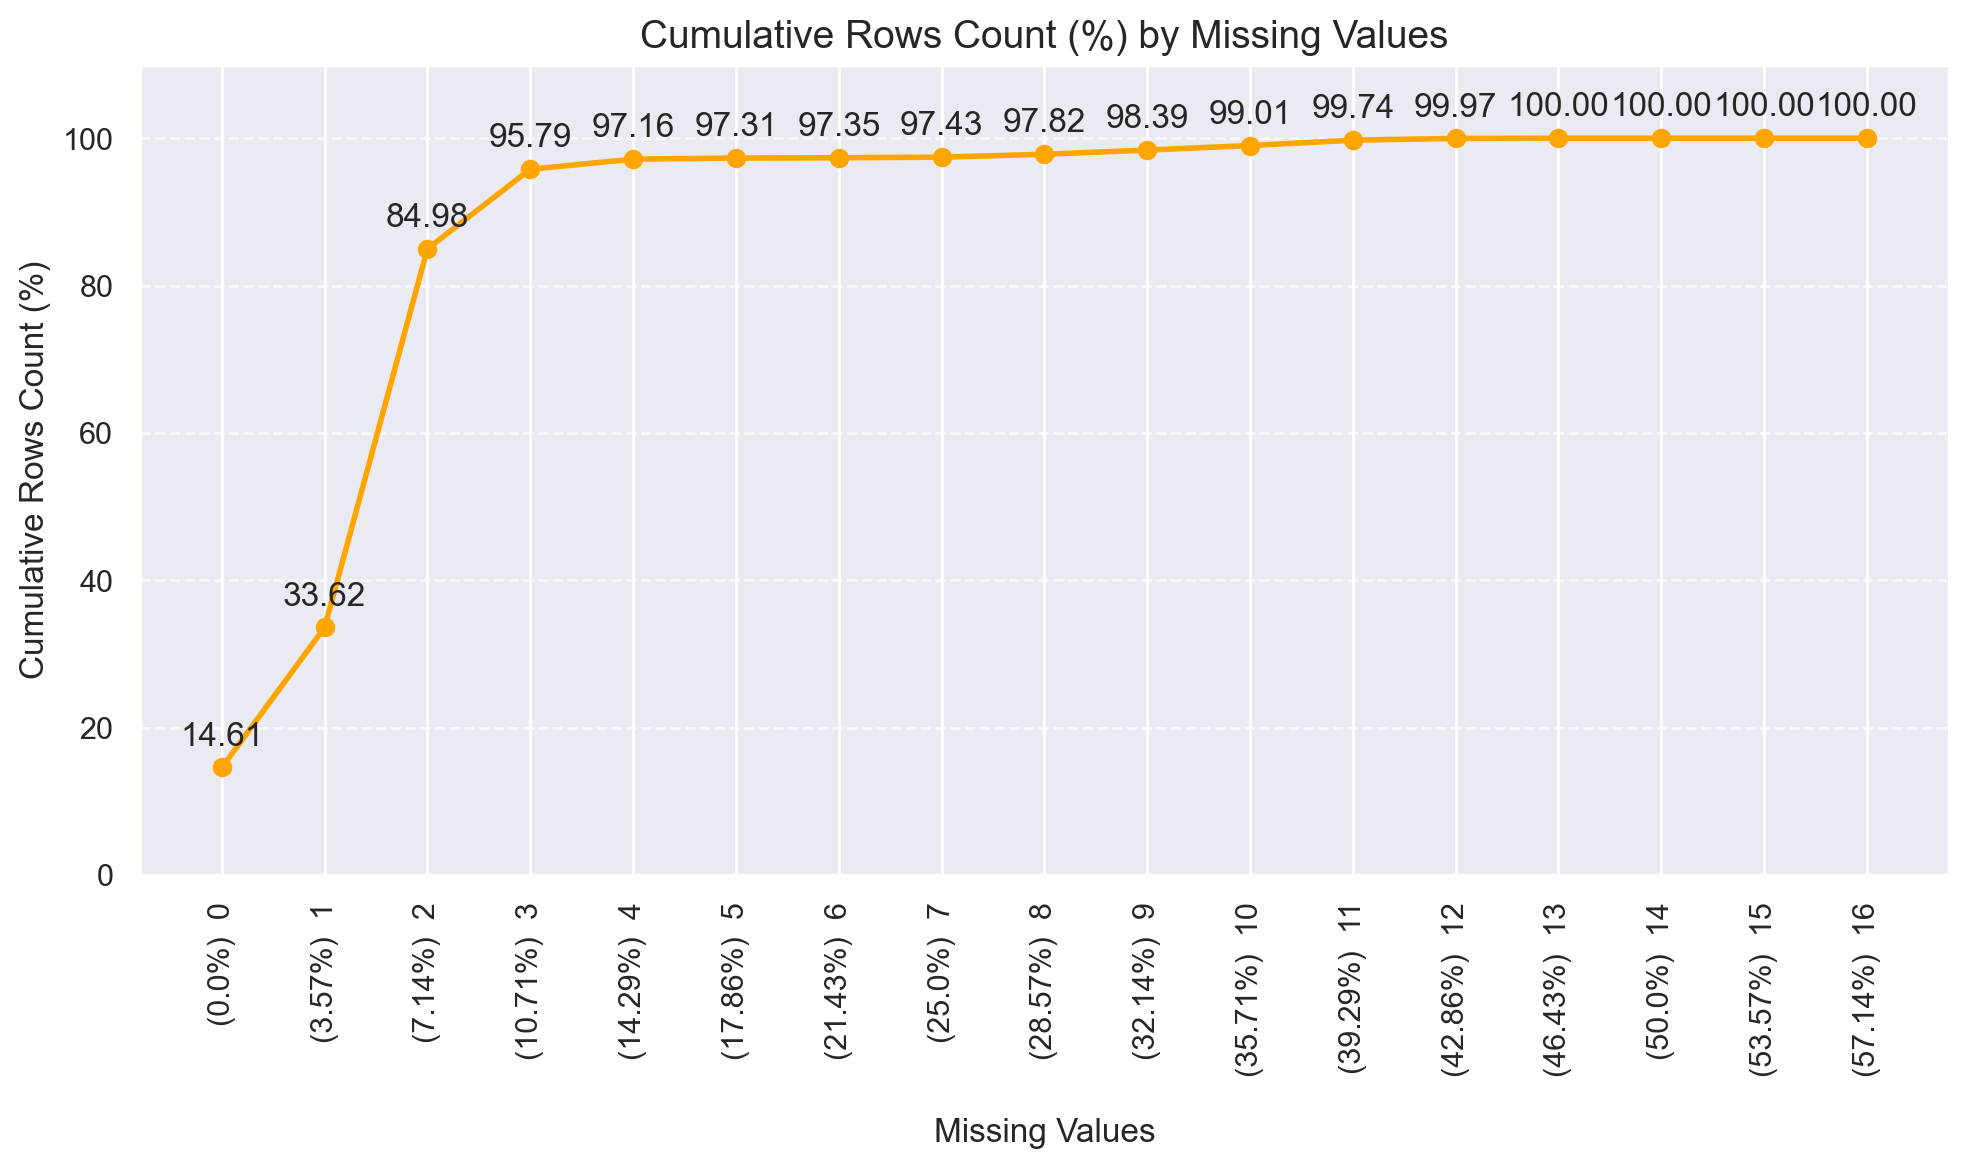

In [634]:
# Create formatted labels for the x-axis
results_df['Missing Values Labels'] = '(' + results_df['Missing Values (%)'].astype(str) + '%)  ' + results_df.index.astype(str)

# Create a line chart for cumulative rows count
plt.figure(figsize=(10, 6))

# Plot Cumulative Rows Count (%)
plt.plot(results_df['Missing Values (%)'], results_df['Cumulative Rows Count (%)'], marker='o', color='orange', linewidth=2, label='Cumulative Rows Count (%)')

# Add labels and title
plt.title('Cumulative Rows Count (%) by Missing Values', fontsize=14)
plt.xlabel('Missing Values', labelpad=15, fontsize=12)
plt.ylabel('Cumulative Rows Count (%)', fontsize=12)

# Set y-axis limits to start from 0
plt.ylim(0, 110)  # Adding a little space for the highest point

# Display custom labels on x-ticks
plt.xticks(results_df['Missing Values (%)'], results_df['Missing Values Labels'], rotation=90)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show data labels on the cumulative line
for index, value in enumerate(results_df['Cumulative Rows Count (%)']):
    plt.text(results_df['Missing Values (%)'].iloc[index], value + 3, f"{value:.2f}", ha='center')

# Show the plot
plt.tight_layout()
plt.show()

**Decision:** We decided to be a bit conservative and drop observations with 11 or more missing values (36.67% or more of missing values), affecting less than 1% of the dataset. This minimal loss of data ensures that we maintain a high-quality dataset without significantly impacting the analysis

In [635]:
# Print the shape of the original DataFrame
original_length = len(df_treat_missing)

# Define the threshold for missing values
threshold = 11  # More than 10 missing values

# Drop rows with more than 10 missing values
df_treat_missing.dropna(thresh=df_treat_missing.shape[1] - threshold, inplace=True)
# df_test_treat_missing.dropna(thresh=df_treat_missing.shape[1] - threshold, inplace=True)

# Calculate the number of rows removed and the percentage
rows_removed = original_length - len(df_treat_missing)
percentage_removed = (rows_removed / original_length) * 100

# Print the number of rows removed and the percentage
print(f"Number of rows removed: {rows_removed} ({round(percentage_removed, 2)}%)")

Number of rows removed: 1508 (0.26%)


In [636]:
# Calculate the number of rows removed due to duplicates and missing values
total_rows_removed = len(df) - len(df_treat_missing)

# Calculate the percentage of rows removed
percent_total_rows_removed = total_rows_removed / len(df) * 100

# Print the results
print(f"Total rows removed until now: {total_rows_removed} ({round(percent_total_rows_removed, 2)}%)")

Total rows removed until now: 21000 (3.54%)


## 3.5 Data Types <a id="data_types"></a>

- object to datetime:
  - 'Accident Date'
  - 'Assembly Date'
  - 'C-2 Date'
  - 'C-3 Date'
  - 'First Hearing Date' (missing values: a blank date means the claim has not yet had a hearing held)

- float to object (codes):
  - 'Industry Code'
  - 'WCIO Cause of Injury Code'
  - 'WCIO Nature of Injury Code'
  - 'WCIO Part Of Body Code'

- float to integer:
  - 'Age at Injury'
  - 'Birth Year'
  - 'IME-4 Count'
  - 'Number of Dependents': not in metadata (make assumption)

- object to binary:
  - 'Alternative Dispute Resolution'
  - 'Attorney/Representative'
  - 'COVID-19 Indicator'
  - 'Gender'

In [637]:
df_adjust_dtypes = df_treat_missing.copy()

In [638]:
df_test_adjust_dtypes = df_test_treat_missing.copy()

In [639]:
columns_object_to_datetime = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']
code_columns = ['Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code']
columns_float_to_int = ['Age at Injury', 'Birth Year', 'Number of Dependents']
columns_object_to_binary = ['Alternative Dispute Resolution', 'Attorney/Representative', 'COVID-19 Indicator']

columns_adjust_dtypes = columns_object_to_datetime + code_columns + columns_float_to_int + columns_object_to_binary + ["Gender"]

In [640]:
df_adjust_dtypes[columns_adjust_dtypes].dtypes

Accident Date                      object
Assembly Date                      object
C-2 Date                           object
C-3 Date                           object
First Hearing Date                 object
Industry Code                     float64
WCIO Cause of Injury Code         float64
WCIO Nature of Injury Code        float64
WCIO Part Of Body Code            float64
Age at Injury                     float64
Birth Year                        float64
Number of Dependents              float64
Alternative Dispute Resolution     object
Attorney/Representative            object
COVID-19 Indicator                 object
Gender                             object
dtype: object

In [641]:
df_adjust_dtypes[columns_adjust_dtypes].head().T

Claim Identifier,5393875,5393091,5393889,5393887,5393863
Accident Date,2019-12-30,2019-08-30,2019-12-06,2019-12-30,2019-12-26
Assembly Date,2020-01-01,2020-01-01,2020-01-01,2020-01-01,2020-01-01
C-2 Date,2019-12-31,2020-01-01,2020-01-01,2019-12-31,2019-12-31
C-3 Date,NaN,2020-01-14,NaN,NaN,NaN
First Hearing Date,NaN,2020-02-21,NaN,NaN,NaN
Industry Code,44.0,23.0,56.0,62.0,44.0
WCIO Cause of Injury Code,27.0,97.0,79.0,16.0,31.0
WCIO Nature of Injury Code,10.0,49.0,7.0,43.0,10.0
WCIO Part Of Body Code,62.0,38.0,10.0,36.0,38.0
Age at Injury,31.0,46.0,40.0,61.0,67.0


In [642]:
# Convert multiple object columns to datetime
for col in columns_object_to_datetime:
    df_adjust_dtypes[col] = pd.to_datetime(df_adjust_dtypes[col])  # Converts missing dates to NaT
    df_test_adjust_dtypes[col] = pd.to_datetime(df_test_adjust_dtypes[col])  # Converts missing dates to NaT

# Convert multiple float columns (codes) to object
for col in code_columns:
    df_adjust_dtypes[col] = df_adjust_dtypes[col].astype('Int64').astype(object)  # Convert to Int64 first, then to string
    df_test_adjust_dtypes[col] = df_test_adjust_dtypes[col].astype('Int64').astype(object)  # Convert to Int64 first, then to string

# Convert multiple float columns to integers
for col in columns_float_to_int:
    df_adjust_dtypes[col] = df_adjust_dtypes[col].astype('Int64')  # Use 'Int64' for nullable integer type
    df_test_adjust_dtypes[col] = df_test_adjust_dtypes[col].astype('Int64')  # Use 'Int64' for nullable integer type

# Convert multiple object columns to binary
for col in columns_object_to_binary:
    df_adjust_dtypes[col] = df_adjust_dtypes[col].map({'Y': 1, 'N': 0}).astype('Int64')  # Use 'Int64' for nullable integers
    df_test_adjust_dtypes[col] = df_test_adjust_dtypes[col].map({'Y': 1, 'N': 0}).astype('Int64')  # Use 'Int64' for nullable integers

# Convert gender column to binary ("Male")
df_adjust_dtypes["Male"] = df_adjust_dtypes["Gender"].map({'M': 1, 'F': 0}).astype('Int64')  # Use 'Int64' for nullable integers
df_test_adjust_dtypes["Male"] = df_test_adjust_dtypes["Gender"].map({'M': 1, 'F': 0}).astype('Int64')  # Use 'Int64' for nullable integers

# Drop the original 'Gender' column
df_adjust_dtypes.drop(columns=['Gender'], inplace=True)
df_test_adjust_dtypes.drop(columns=['Gender'], inplace=True)

In [643]:
# Update the list of columns
columns_adjust_dtypes.remove("Gender")
columns_adjust_dtypes.append("Male")

In [644]:
# Check data types
df_adjust_dtypes[columns_adjust_dtypes].dtypes

Accident Date                     datetime64[ns]
Assembly Date                     datetime64[ns]
C-2 Date                          datetime64[ns]
C-3 Date                          datetime64[ns]
First Hearing Date                datetime64[ns]
Industry Code                             object
WCIO Cause of Injury Code                 object
WCIO Nature of Injury Code                object
WCIO Part Of Body Code                    object
Age at Injury                              Int64
Birth Year                                 Int64
Number of Dependents                       Int64
Alternative Dispute Resolution             Int64
Attorney/Representative                    Int64
COVID-19 Indicator                         Int64
Male                                       Int64
dtype: object

In [645]:
df_adjust_dtypes[columns_adjust_dtypes].head().T

Claim Identifier,5393875,5393091,5393889,5393887,5393863
Accident Date,2019-12-30 00:00:00,2019-08-30 00:00:00,2019-12-06 00:00:00,2019-12-30 00:00:00,2019-12-26 00:00:00
Assembly Date,2020-01-01 00:00:00,2020-01-01 00:00:00,2020-01-01 00:00:00,2020-01-01 00:00:00,2020-01-01 00:00:00
C-2 Date,2019-12-31 00:00:00,2020-01-01 00:00:00,2020-01-01 00:00:00,2019-12-31 00:00:00,2019-12-31 00:00:00
C-3 Date,NaT,2020-01-14 00:00:00,NaT,NaT,NaT
First Hearing Date,NaT,2020-02-21 00:00:00,NaT,NaT,NaT
Industry Code,44,23,56,62,44
WCIO Cause of Injury Code,27,97,79,16,31
WCIO Nature of Injury Code,10,49,7,43,10
WCIO Part Of Body Code,62,38,10,36,38
Age at Injury,31,46,40,61,67


## 3.6. Check for Inconsistencies <a id="inconsistencies"></a>

In [646]:
df_inconsistencies = df_adjust_dtypes.copy()

In [647]:
df_test_inconsistencies = df_test_adjust_dtypes.copy()

### Date Consistencies

The chronological order of date features should follow the natural sequence of a workers’ compensation claim process, from the injury to the subsequent events related to the claim:


- **Accident Date** - Injury date of the claim.
- **C-2 Date** - Date of receipt of the Employer's Report of Work-Related Injury/Illness or equivalent (formerly Form C-2).
- **C-3 Date** - Date Form C-3 (Employee Claim Form) was received. (generally after the C-2 form has been submitted, but might happen concurrently)
- **Assembly Date** - The date the claim was first assembled.
- **First Hearing Date** - Date the first hearing was held on a claim at a WCB hearing location. A blank date means the claim has not yet had a hearing held.

- https://www.wcb.ny.gov/content/main/forms/AllForms.jsp
- https://www.wcb.ny.gov/content/main/Employers/when-injury-happens.jsp
- https://www.wcb.ny.gov/content/main/Workers/HowSystemWorks.jsp

- **Form C-2** - Within 10 days after occurrence of Injury/Illness. (The 10-day period begins on the date of the incident or the date the employer is notified of the injury or illness)
- **Form C-3** - Within two years of accident, or within two years after employee knew or should have known that injury or illness was related to employment.
- **First Hearing Date**
    - 90-day period for scheduling the First Hearing Date typically begins from the date the claim is filed with the Workers' Compensation Board.
    - If the case or claim is more complex or if there are delays (e.g., missing documentation or issues with the employer), the actual hearing may take longer to schedule, but 90 days is the standard guideline for the first hearing.

However, we'll try to be more flexible than these guidelines (just for reference)

#### Assembly Date

"In the training set, you will find the claims data assembled from the start of 2020 till the end of 2022`"

In [648]:
# Define the start and end dates using strings, then convert to datetime format
start_date = '2020-01-01'
end_date = '2022-12-31'

# Filter the rows where 'Assembly Date' is outside the specified range
invalid_assembly_dates = df_inconsistencies[
    (df_inconsistencies['Assembly Date'] < start_date) |
    (df_inconsistencies['Assembly Date'] > end_date)
]

# Count how many rows have invalid dates
invalid_count = len(invalid_assembly_dates)

# Show the number of invalid rows and percentage
print("Number of invalid assembly dates:", len(invalid_assembly_dates))

Number of invalid assembly dates: 0


**Conclusion:** There are no assembly date inconsistencies

#### First Hearing Date

In [649]:
df_inconsistencies['First Hearing Date'].sort_values(ascending=False)

Claim Identifier
5958552   2024-06-07
6091910   2024-06-07
5622016   2024-06-07
5991761   2024-06-07
5956534   2024-06-07
             ...    
6165265          NaT
6165285          NaT
6165506          NaT
6165339          NaT
6165075          NaT
Name: First Hearing Date, Length: 572471, dtype: datetime64[ns]

In [650]:
# Calculate the difference
differences = df_inconsistencies['First Hearing Date'] - df_inconsistencies['C-3 Date']
round(len(df_inconsistencies[differences.dt.days > 90]) / len(df_inconsistencies) * 100, 2)

14.43

**Conclusion:** Considering the high percentage, we might need to be flexible regarding this guideline and accept this. Let's leave this for now. In the future, we will explore this better

#### Chronological order

In [651]:
chronological_order = ['Accident Date', 'C-2 Date', 'C-3 Date', 'Assembly Date', 'First Hearing Date']

In [652]:
# Calculate the percentage of missing values for columns involved in chronological checks
missing_percentages = (
    df_inconsistencies[chronological_order].isna().sum() / len(df_inconsistencies) * 100
).sort_values()

# Display the sorted percentages
missing_percentages.round(2)

Assembly Date          0.00
Accident Date          0.60
C-2 Date               2.28
C-3 Date              67.36
First Hearing Date    73.66
dtype: float64

**Conclusion:**
- Assembly Date was considered as the most reliable feature
    - it might be a feature created automatically by the system when the claim is assembled
    - does not have inconsistencies in terms of time period - all fall between 2020 and 2022
    - has 0 missing values
- C-3 Date and First Hearing Date have significant missing values (67.36% and 73.66%, respectively).

In [653]:
# Check if the chronological order is violated (comparing with NaT will always result in False - which is desirable, because we don't consider them for the analysis)
chronological_violations = df_inconsistencies[
    (df_inconsistencies['Accident Date'] > df_inconsistencies['C-2 Date']) |
    (df_inconsistencies['Accident Date'] > df_inconsistencies['C-3 Date']) |
    (df_inconsistencies['Accident Date'] > df_inconsistencies['Assembly Date']) |
    (df_inconsistencies['Accident Date'] > df_inconsistencies['First Hearing Date']) |

    (df_inconsistencies['C-2 Date'] > df_inconsistencies['C-3 Date']) |
    (df_inconsistencies['C-2 Date'] > df_inconsistencies['Assembly Date']) |
    (df_inconsistencies['C-2 Date'] > df_inconsistencies['First Hearing Date']) |

    (df_inconsistencies['C-3 Date'] > df_inconsistencies['Assembly Date']) |
    (df_inconsistencies['C-3 Date'] > df_inconsistencies['First Hearing Date']) |

    (df_inconsistencies['Assembly Date'] > df_inconsistencies['First Hearing Date'])
]

# Show the rows with chronological inconsistencies
chronological_violations_count = len(chronological_violations)
chronological_violations_percentage = (chronological_violations_count / len(df_inconsistencies)) * 100

# Print results
print(f"Total rows with chronological order violations: {chronological_violations_count} ({round(chronological_violations_percentage, 2)}%)")

# Optionally display some of the rows with inconsistencies for further inspection
chronological_violations[chronological_order]

Total rows with chronological order violations: 179563 (31.37%)


,Accident Date,C-2 Date,C-3 Date,Assembly Date,First Hearing Date
Claim Identifier,,,,,
5393091,2019-08-30,2020-01-01,2020-01-14,2020-01-01,2020-02-21
5394182,2019-12-30,2019-12-31,2020-03-04,2020-01-01,NaT
5393826,2019-12-18,2019-12-31,2020-03-04,2020-01-01,NaT
5393811,2019-12-19,2020-01-01,2020-01-07,2020-01-01,2020-08-13
5393931,2019-09-15,2020-01-01,2020-01-03,2020-01-01,2020-03-06
...,...,...,...,...,...
6164443,2022-12-12,2023-01-12,2022-12-22,2022-12-30,NaT
6164364,2022-11-23,2023-01-06,2022-12-21,2022-12-30,NaT
6164612,2022-12-12,2023-01-04,2022-12-28,2022-12-30,NaT


In [654]:
# Initialize a dictionary to store results
assembly_date_violations = {}

# Check how many rows have Assembly Date earlier than Accident Date
assembly_before_accident = df_inconsistencies[
    (df_inconsistencies['Assembly Date'] <= df_inconsistencies['Accident Date'])
]
assembly_date_violations['Assembly <= Accident'] = len(assembly_before_accident)

# Check how many rows have Assembly Date earlier than C-2 Date
assembly_before_c2 = df_inconsistencies[
    (df_inconsistencies['Assembly Date'] < df_inconsistencies['C-2 Date'])
]
assembly_date_violations['Assembly < C-2'] = len(assembly_before_c2)

# Check how many rows have Assembly Date earlier than C-3 Date
assembly_before_c3 = df_inconsistencies[
    (df_inconsistencies['Assembly Date'] < df_inconsistencies['C-3 Date'])
]
assembly_date_violations['Assembly < C-3'] = len(assembly_before_c3)

# Check how many rows have Assembly Date later than First Hearing Date
assembly_after_hearing = df_inconsistencies[
    (df_inconsistencies['Assembly Date'] >= df_inconsistencies['First Hearing Date'])
]
assembly_date_violations['Assembly >= First Hearing'] = len(assembly_after_hearing)

# Calculate total rows for percentage calculation
total_rows = len(df_inconsistencies)

# Convert counts to percentages
for key, count in assembly_date_violations.items():
    percentage = (count / total_rows) * 100
    assembly_date_violations[key] = f"{count} ({percentage:.2f}%)"

# Display the results
assembly_date_violations

{'Assembly <= Accident': '4950 (0.86%)',
 'Assembly < C-2': '68804 (12.02%)',
 'Assembly < C-3': '99345 (17.35%)',
 'Assembly >= First Hearing': '0 (0.00%)'}

- We checked for violations where one date was earlier than a logically subsequent date (e.g., Accident Date being later than C-2 Date).
- Specifically, we examined if Assembly Date, most reliable feature, was earlier than other dates (e.g., Accident Date, C-2 Date, C-3 Date) and found that around 12% of rows had Assembly Date earlier than C-2 Date, and 17.35% had Assembly Date earlier than C-3 Date.
- No record found with Assembly Date >= First Hearing Date

In [655]:
# Remove rows where Assembly Date is earlier than Accident Date
df_inconsistencies = df_inconsistencies[
    ~(df_inconsistencies['Assembly Date'] < df_inconsistencies['Accident Date'])
]

In [656]:
# df_test_inconsistencies = df_test_inconsistencies[
#     ~(df_test_inconsistencies['Assembly Date'] < df_test_inconsistencies['Accident Date'])
# ]

In [657]:
# Fix C-2 and C-3 Dates based on the Assembly Date
def adjust_dates(row):
    # If Assembly Date is earlier than C-2 Date, adjust C-2 Date to match the Accident Date
    if (row['C-2 Date'] > row['Assembly Date']) | (row['C-2 Date'] < row['Accident Date']):
        row['C-2 Date'] = row['Assembly Date']

    # If Assembly Date is earlier than C-3 Date
    if (row['C-3 Date'] > row['Assembly Date']) | (row['C-3 Date'] < row['C-2 Date']) | (row['C-3 Date'] < row['Accident Date']):
        if pd.notna(row['C-2 Date']): # adjust C-3 Date to match the C-2 Date
            row['C-3 Date'] = row['C-2 Date']
        else: # adjust C-3 Date to match the Assembly Date
            row['C-3 Date'] = row['Assembly Date']
    
    return row

# Apply the adjustment function to the dataframe
df_inconsistencies = df_inconsistencies.apply(adjust_dates, axis=1)
df_test_inconsistencies = df_test_inconsistencies.apply(adjust_dates, axis=1)

In [658]:
# Display the first few rows to verify the adjustments
df_inconsistencies[chronological_order].head()

,Accident Date,C-2 Date,C-3 Date,Assembly Date,First Hearing Date
Claim Identifier,,,,,
5393875,2019-12-30,2019-12-31,NaT,2020-01-01,NaT
5393091,2019-08-30,2020-01-01,2020-01-01,2020-01-01,2020-02-21
5393889,2019-12-06,2020-01-01,NaT,2020-01-01,NaT
5393887,2019-12-30,2019-12-31,NaT,2020-01-01,NaT
5393863,2019-12-26,2019-12-31,NaT,2020-01-01,NaT


The function changed some data types, let's fix them

In [659]:
columns_object_to_int = ["Birth Year", "Alternative Dispute Resolution"]
df_inconsistencies[columns_object_to_int].dtypes

Birth Year                        object
Alternative Dispute Resolution    object
dtype: object

In [660]:
# Convert multiple object columns to binary
for col in columns_object_to_int:
    df_inconsistencies[col] = df_inconsistencies[col].astype('Int64')  # Use 'Int64' for nullable integers
    df_test_inconsistencies[col] = df_test_inconsistencies[col].astype('Int64')  # Use 'Int64' for nullable integers

**Conclusion:**
- Removal of Extreme Violations: We removed rows where Assembly Date was earlier than Accident Date (about 0.86% of the data).
- Adjusting Dates: For the remaining records, we adjusted C-2 Date and C-3 Date based on Assembly Date:
    - If C-2 Date was later than Assembly Date or earlier than Accident Date, we set C-2 Date to Assembly Date.
    - Similarly, if C-3 Date was later than Assembly Date, we adjusted it to match C-2 Date (if C-2 Date is not missing) or to Assembly Date (if C-2 Date is missing)

In [661]:
# Check if the chronological order is violated (comparing with NaT will always result in False - which is desirable, because we don't consider them for the analysis)
chronological_violations = df_inconsistencies[
    (df_inconsistencies['Accident Date'] > df_inconsistencies['C-2 Date']) |
    (df_inconsistencies['Accident Date'] > df_inconsistencies['C-3 Date']) |
    (df_inconsistencies['Accident Date'] > df_inconsistencies['Assembly Date']) |
    (df_inconsistencies['Accident Date'] > df_inconsistencies['First Hearing Date']) |

    (df_inconsistencies['C-2 Date'] > df_inconsistencies['C-3 Date']) |
    (df_inconsistencies['C-2 Date'] > df_inconsistencies['Assembly Date']) |
    (df_inconsistencies['C-2 Date'] > df_inconsistencies['First Hearing Date']) |

    (df_inconsistencies['C-3 Date'] > df_inconsistencies['Assembly Date']) |
    (df_inconsistencies['C-3 Date'] > df_inconsistencies['First Hearing Date']) |

    (df_inconsistencies['Assembly Date'] >= df_inconsistencies['First Hearing Date'])
]

# Show the rows with chronological inconsistencies
chronological_violations_count = len(chronological_violations)
chronological_violations_percentage = (chronological_violations_count / len(df_inconsistencies)) * 100

# Print results
print(f"Total rows with chronological order violations: {chronological_violations_count} ({round(chronological_violations_percentage, 2)}%)")

Total rows with chronological order violations: 0 (0.0%)


**Conclusion:** After applying the adjustments, we rechecked the data for chronological violations. The final result showed that 0 records had any chronological order violations, indicating that the adjustments successfully corrected all inconsistencies


#### Accident Date

In [662]:
df_inconsistencies[chronological_order].describe()

,Accident Date,C-2 Date,C-3 Date,Assembly Date,First Hearing Date
count,567654,558030,185622,571067,149525
mean,2021-04-30 13:09:43.669630208,2021-07-09 16:13:39.362399488,2021-06-24 04:04:53.241102592,2021-07-19 23:53:32.229038080,2022-03-19 18:54:02.925263360
min,1961-09-06 00:00:00,1996-01-12 00:00:00,1996-06-18 00:00:00,2020-01-01 00:00:00,2020-01-30 00:00:00
25%,2020-09-15 00:00:00,2020-10-27 00:00:00,2020-10-01 00:00:00,2020-10-27 00:00:00,2021-06-02 00:00:00
50%,2021-06-28 00:00:00,2021-07-31 00:00:00,2021-06-21 00:00:00,2021-07-30 00:00:00,2022-03-10 00:00:00
75%,2022-03-21 00:00:00,2022-04-20 00:00:00,2022-03-18 00:00:00,2022-04-20 00:00:00,2023-01-11 00:00:00
max,2022-12-30 00:00:00,2022-12-31 00:00:00,2022-12-30 00:00:00,2022-12-31 00:00:00,2024-06-07 00:00:00


In [663]:
# Check for Accident Date Date inconsistency (more than 2 years after Accident Date)
inconsistent_accident_c3 = df_inconsistencies[
    (df_inconsistencies['C-3 Date'] - df_inconsistencies['Accident Date']).dt.days > 730
]

# test_inconsistent_accident_c3 = df_test_inconsistencies[
#     (df_test_inconsistencies['C-3 Date'] - df_test_inconsistencies['Accident Date']).dt.days > 730
# ]

# Check for Accident Date Date inconsistency (more than 2 years after Assembly Date), when C-3 is missing
inconsistent_accident_assembly = df_inconsistencies[
    (df_inconsistencies['C-3 Date']).isna() &
    ((df_inconsistencies['Assembly Date'] - df_inconsistencies['Accident Date']).dt.days > 730)
]

# test_inconsistent_accident_assembly = df_test_inconsistencies[
#     (df_test_inconsistencies['C-3 Date']).isna() &
#     ((df_test_inconsistencies['Assembly Date'] - df_test_inconsistencies['Accident Date']).dt.days > 730)
# ]

# Calculate the number of rows with Accident Date inconsistencies
total_rows = len(df_inconsistencies)
inconsistent_c3_rows = len(inconsistent_accident_c3) + len(inconsistent_accident_assembly)

# Calculate the percentage of Accident Date Date inconsistencies
perc_inconsistent_c3 = (inconsistent_c3_rows / total_rows) * 100

# Output the percentage
print(f"Percentage of C-3 Date inconsistencies: {inconsistent_c3_rows} ({round(perc_inconsistent_c3, 2)}%)")

# Display inconsistent rows for Accident Date
inconsistent_accident_c3[['Accident Date', 'C-3 Date']]

Percentage of C-3 Date inconsistencies: 6606 (1.16%)


,Accident Date,C-3 Date
Claim Identifier,,
5395731,2012-06-23,2019-12-30
5395732,2012-12-12,2019-12-30
5397326,2012-10-06,2020-01-07
5399138,2001-09-11,2020-01-09
5400349,2017-02-14,2020-01-10
...,...,...
6159127,2019-11-19,2022-12-22
6162311,2001-09-11,2022-12-27
6162198,2020-12-17,2022-12-27


In [664]:
inconsistent_accident_assembly[['Accident Date', 'Assembly Date']]

,Accident Date,Assembly Date
Claim Identifier,,
5394319,2016-09-02,2020-01-02
5394016,1996-10-01,2020-01-02
5394353,1984-03-22,2020-01-02
5394422,2017-11-16,2020-01-02
5394386,1999-12-06,2020-01-03
...,...,...
6164736,2019-09-06,2022-12-29
6164911,2019-09-03,2022-12-29
6165071,1980-05-17,2022-12-30


**Conclusion:**
- The C-3 Date should be filed within two years of the Accident Date (if C-3 Date is missing, consider Assembly Date as a proxy). Any inconsistency beyond this period indicates a violation of this guideline.
- Deleting these rows (only 1.16%) ensures the data is clean.

In [665]:
# Remove rows with Accident Date inconsistencies (C-3 Date not missing)
df_inconsistencies = df_inconsistencies.drop(inconsistent_accident_c3.index)

In [666]:
# df_test_inconsistencies = df_test_inconsistencies.drop(test_inconsistent_accident_c3.index)

In [667]:
# Remove rows with Accident Date inconsistencies (C-3 Date missing - use Assembly Date as a proxy)
df_inconsistencies = df_inconsistencies.drop(inconsistent_accident_assembly.index)

In [668]:
# df_test_inconsistencies = df_test_inconsistencies.drop(test_inconsistent_accident_assembly.index)

In [669]:
df_inconsistencies[chronological_order].describe()

,Accident Date,C-2 Date,C-3 Date,Assembly Date,First Hearing Date
count,561048,552246,184096,564461,148331
mean,2021-06-19 22:07:11.193052928,2021-07-20 14:17:29.401896704,2021-06-24 07:37:12.713367040,2021-07-20 06:39:35.398831872,2022-03-20 09:10:06.872467712
min,1996-05-26 00:00:00,1996-06-18 00:00:00,1996-06-18 00:00:00,2020-01-01 00:00:00,2020-01-30 00:00:00
25%,2020-09-24 00:00:00,2020-10-28 00:00:00,2020-10-01 00:00:00,2020-10-27 00:00:00,2021-06-02 00:00:00
50%,2021-07-04 00:00:00,2021-08-02 00:00:00,2021-06-21 00:00:00,2021-08-02 00:00:00,2022-03-10 00:00:00
75%,2022-03-24 00:00:00,2022-04-20 00:00:00,2022-03-18 00:00:00,2022-04-20 00:00:00,2023-01-12 00:00:00
max,2022-12-30 00:00:00,2022-12-31 00:00:00,2022-12-30 00:00:00,2022-12-31 00:00:00,2024-06-07 00:00:00


### Minimum Age

- Minors with 14 to 17 years old are allowed to work, but under some restrict conditions. Let's analyze them
- https://dol.ny.gov/hours-work-minors

In [670]:
# Check the age distribution
df_inconsistencies['Age at Injury'].describe()

count    564461.000000
mean         42.131711
std          14.215686
min           0.000000
25%          31.000000
50%          42.000000
75%          54.000000
max         117.000000
Name: Age at Injury, dtype: float64

In [671]:
# Count customers between 14 and 17
minor_customers = df_inconsistencies[(df_inconsistencies['Age at Injury'] >= 14) & (df_inconsistencies['Age at Injury'] < 18)]
perc_minor_customers = len(minor_customers) / len(df_inconsistencies) * 100

print(f"Number of customers between 14 and 17 years old: {len(minor_customers)} ({round(perc_minor_customers, 2)}%)")

# Show descriptive statistics
minor_customers.describe().round(2).T

Number of customers between 14 and 17 years old: 2050 (0.36%)


,count,mean,min,25%,50%,75%,max,std
Accident Date,2050,2021-07-25 07:59:03.804877824,2019-02-22 00:00:00,2020-11-21 00:00:00,2021-07-30 00:00:00,2022-05-14 00:00:00,2022-12-26 00:00:00,NaN
Age at Injury,2050.0,16.54,14.0,16.0,17.0,17.0,17.0,0.71
Alternative Dispute Resolution,2050.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Assembly Date,2050,2021-08-19 18:31:57.658536448,2020-01-02 00:00:00,2020-12-23 12:00:00,2021-08-17 00:00:00,2022-05-30 00:00:00,2022-12-30 00:00:00,NaN
Attorney/Representative,2050.0,0.08,0.0,0.0,0.0,0.0,1.0,0.27
Average Weekly Wage,1971.0,92.57,0.0,0.0,0.0,125.6,2026.65,192.09
Birth Year,1930.0,1943.74,0.0,2003.0,2004.0,2005.0,2008.0,342.23
C-2 Date,2033,2021-08-20 05:35:44.417117696,2020-01-02 00:00:00,2020-12-28 00:00:00,2021-08-17 00:00:00,2022-06-01 00:00:00,2022-12-30 00:00:00,NaN
C-3 Date,280,2021-08-01 03:51:25.714285824,2019-11-13 00:00:00,2020-10-22 00:00:00,2021-08-08 12:00:00,2022-06-01 06:00:00,2022-12-29 00:00:00,NaN
COVID-19 Indicator,2050.0,0.01,0.0,0.0,0.0,0.0,1.0,0.11


In [672]:
# Count customers under 18
minor_customers = df_inconsistencies[df_inconsistencies['Age at Injury'] < 18]
perc_minor_customers = len(minor_customers) / len(df_inconsistencies) * 100

print(f"Number of customers under 18 years old: {len(minor_customers)} ({round(perc_minor_customers, 2)}%)")

# Show descriptive statistics
minor_customers.describe().round(2).T

Number of customers under 18 years old: 6938 (1.23%)


,count,mean,min,25%,50%,75%,max,std
Accident Date,3525,2021-05-18 20:25:56.425531904,2018-03-14 00:00:00,2020-08-17 00:00:00,2021-06-29 00:00:00,2022-02-25 00:00:00,2022-12-26 00:00:00,NaN
Age at Injury,6938.0,4.95,0.0,0.0,0.0,16.0,17.0,7.56
Alternative Dispute Resolution,6938.0,0.0,0.0,0.0,0.0,0.0,1.0,0.05
Assembly Date,6938,2021-06-21 03:52:15.082156544,2020-01-02 00:00:00,2020-09-21 00:00:00,2021-06-23 00:00:00,2022-03-16 00:00:00,2022-12-30 00:00:00,NaN
Attorney/Representative,6938.0,0.49,0.0,0.0,0.0,1.0,1.0,0.5
Average Weekly Wage,6628.0,81.89,0.0,0.0,0.0,0.0,5867.58,301.67
Birth Year,6623.0,1499.02,0.0,1902.0,1965.0,2003.0,2018.0,849.45
C-2 Date,5046,2021-07-11 16:39:40.023781120,2000-02-09 00:00:00,2020-10-15 06:00:00,2021-07-27 00:00:00,2022-04-21 18:00:00,2022-12-30 00:00:00,NaN
C-3 Date,3890,2021-05-26 05:10:57.069408768,2019-07-31 00:00:00,2020-08-26 00:00:00,2021-04-29 00:00:00,2022-02-27 12:00:00,2022-12-30 00:00:00,NaN
COVID-19 Indicator,6938.0,0.01,0.0,0.0,0.0,0.0,1.0,0.12


In [673]:
minor_customers.describe(include="object").T

,count,unique,top,freq
Carrier Name,6938,562,STATE INSURANCE FUND,1026
Carrier Type,6856,6,1A. PRIVATE,3758
Claim Injury Type,6938,7,2. NON-COMP,3892
County of Injury,6923,62,SUFFOLK,791
District Name,6938,8,NYC,3063
Industry Code,5900,24,72,778
Industry Code Description,5900,20,TRANSPORTATION AND WAREHOUSING,818
Medical Fee Region,6415,4,IV,2999
WCIO Cause of Injury Code,4957,70,99,660
WCIO Cause of Injury Description,4957,67,"OTHER - MISCELLANEOUS, NOC",660


**Conclusion:** Since only 1.26% of customers in the dataset are minors (and only 0.36% are allowed to work but under some restrict conditions), who are not legally permitted to work, we can remove these entries. Excluding minors from the dataset will improve the accuracy and relevance of our analysis for the target demographic.

In [674]:
# Remove customers under 18 from the dataset
df_inconsistencies = df_inconsistencies[~(df_inconsistencies['Age at Injury'] < 18)]

In [675]:
# df_test_inconsistencies = df_test_inconsistencies[~(df_test_inconsistencies['Age at Injury'] < 18)]

### Birth Year

In [676]:
# Check the age distribution
df_inconsistencies['Birth Year'].sort_values().unique()

<IntegerArray>
[   0, 1901, 1907, 1909, 1910, 1911, 1916, 1917, 1920, 1921, 1922, 1924, 1925,
 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938,
 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951,
 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
 2004, <NA>]
Length: 93, dtype: Int64

In [677]:
# Count the rows with Birth Year equal to 0
birth_year_zero_count = len(df_inconsistencies[df_inconsistencies['Birth Year'] == 0])

# Calculate the percentage of rows with Birth Year equal to 0
total_rows = len(df_inconsistencies)
percentage_zero = (birth_year_zero_count / total_rows) * 100

# Print the results
print(f"Rows with Birth Year = 0: {birth_year_zero_count} ({round(percentage_zero, 2)}%)")

Rows with Birth Year = 0: 22160 (3.97%)


In [678]:
# Calculate the missing values count and percentage for 'Birth Year' and 'Age at Injury'
missing_data = df_inconsistencies[['Birth Year', 'Age at Injury']].isna().sum()

# Calculate the percentage of missing data
missing_percentage = (missing_data / len(df_inconsistencies)) * 100

# Combine into a DataFrame
missing_table = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage (%)': missing_percentage.round(2)
})

# Display the result
missing_table

,Missing Count,Missing Percentage (%)
Birth Year,28095,5.04
Age at Injury,0,0.00


In [679]:
df_inconsistencies['Birth Year'].corr(df_inconsistencies['Age at Injury']).round(2)

-0.04

In [680]:
# Inspect rows where Birth Year is either NaN or 0
rows_with_na_or_zero_birth_year = df_inconsistencies[
    (df_inconsistencies['Birth Year'].isna()) | (df_inconsistencies['Birth Year'] == 0)
]

# Display these rows for inspection
rows_with_na_or_zero_birth_year.describe().T

,count,mean,min,25%,50%,75%,max,std
Accident Date,50255,2021-05-31 03:37:46.162570752,2012-06-28 00:00:00,2020-09-07 12:00:00,2021-06-10 00:00:00,2022-02-25 00:00:00,2022-12-29 00:00:00,NaN
Age at Injury,50255.0,42.699871,18.0,31.0,42.0,54.0,112.0,13.766058
Alternative Dispute Resolution,50255.0,0.002089,0.0,0.0,0.0,0.0,1.0,0.045662
Assembly Date,50255,2021-07-02 22:09:11.730176,2020-01-01 00:00:00,2020-10-14 00:00:00,2021-07-09 00:00:00,2022-03-28 00:00:00,2022-12-30 00:00:00,NaN
Attorney/Representative,50255.0,0.313322,0.0,0.0,0.0,1.0,1.0,0.463849
Average Weekly Wage,47785.0,480.826346,0.0,0.0,0.0,834.93,224083.0,1558.115022
Birth Year,22160.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C-2 Date,49437,2021-07-03 01:03:21.201529344,2012-07-12 00:00:00,2020-10-14 00:00:00,2021-07-09 00:00:00,2022-03-28 00:00:00,2022-12-30 00:00:00,NaN
C-3 Date,16223,2021-06-09 18:34:09.090797312,2012-07-12 00:00:00,2020-09-18 00:00:00,2021-06-01 00:00:00,2022-03-07 00:00:00,2022-12-30 00:00:00,NaN
COVID-19 Indicator,50255.0,0.046941,0.0,0.0,0.0,0.0,1.0,0.211514


In [681]:
# Display these rows for inspection
rows_with_na_or_zero_birth_year.describe(include='object').T

,count,unique,top,freq
Carrier Name,50255,1418,STATE INSURANCE FUND,9739
Carrier Type,50157,6,1A. PRIVATE,26435
Claim Injury Type,50255,8,2. NON-COMP,26352
County of Injury,49674,62,QUEENS,4688
District Name,50255,8,NYC,23570
Industry Code,49795,24,62,9570
Industry Code Description,49795,20,HEALTH CARE AND SOCIAL ASSISTANCE,9570
Medical Fee Region,34254,4,IV,13980
WCIO Cause of Injury Code,49357,75,56,4004
WCIO Cause of Injury Description,49357,72,LIFTING,4004


**Conclusion:** Birth Year is expected to be highly correlated with Age at Injury, which provides the same information and has no missing values. However, the correlation between Birth Year and Age at Injury is very low (-0.03), which indicates an issue with the data. Birth Year has 5.04% missing values and 4.04% rows with a value of 0, therefore Age at Injury is a more reliable feature. Since these rows seem fine in other features, we’ve decided to drop Birth Year due to its inconsistencies and the lack of strong correlation with Age at Injury.

In [682]:
df_inconsistencies.drop(columns=['Birth Year'], inplace=True)

In [683]:
df_test_inconsistencies.drop(columns=['Birth Year'], inplace=True)

### Number of Dependents

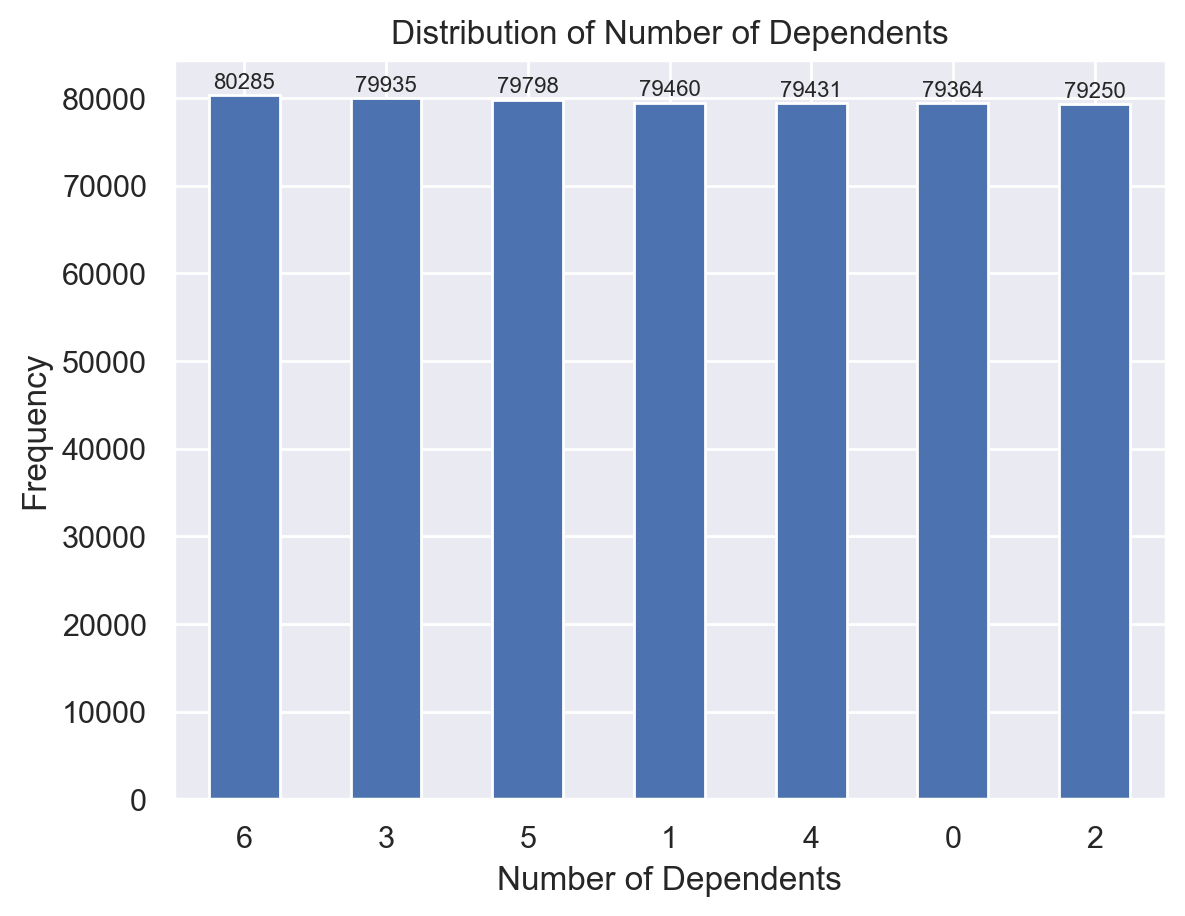

In [684]:
# Plot the distribution of 'Number of Dependents', sorted by frequency (descending)
ax = df_inconsistencies['Number of Dependents'].value_counts().sort_values(ascending=False).plot(kind='bar')

# Title and Labels
plt.title('Distribution of Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Frequency')

# Add bar labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                xytext=(0, 1),
                textcoords='offset points',
                ha='center', va='bottom', fontsize=8)

# Rotate x-axis labels to make them vertical
plt.xticks(rotation=0)

# Display the plot
plt.show()

**Conclusion:** The “Number of Dependents” variable has an unusually uniform distribution, which is uncommon for this kind of data. Normally, we would expect more variety, with fewer dependents being more common. This likely points to data quality issues. Therefore, it makes sense to drop this feature.

In [685]:
df_inconsistencies.drop(columns='Number of Dependents', inplace=True)

In [686]:
df_test_inconsistencies.drop(columns='Number of Dependents', inplace=True)

### 'Zip-Code'

- Standard ZIP codes in NY are 5 digits long. Some locations use the extended ZIP+4 format, which is 9 digits in total.
- https://worldpopulationreview.com/zips/new-york
- https://en.wikipedia.org/wiki/ZIP_Code

Check if there are any zip-code as ZIP+4

In [687]:
# Define the regex pattern for valid zip codes
zip_plus_four_pattern = r'^\d{5}-\d{4}$'

# Filter the DataFrame for rows where 'Zip Code' does not match the pattern
zip_plus_four_codes = df_inconsistencies[df_inconsistencies['Zip Code'].astype(str).str.match(zip_plus_four_pattern)]

# Display the rows with invalid zip codes
zip_plus_four_codes['Zip Code']

Series([], Name: Zip Code, dtype: object)

Check for zip-codes different than five digits zip-code

In [688]:
# Define the regex pattern for valid zip codes
valid_zip_pattern = r'^\d{5}$'

# Filter the DataFrame for rows where 'Zip Code' does not match the pattern
invalid_zip_codes = df_inconsistencies[df_inconsistencies['Zip Code'].notna() & ~df_inconsistencies['Zip Code'].astype(str).str.match(valid_zip_pattern)]
# Filter the DataFrame for rows where 'Zip Code' matches the valid zip pattern
valid_zip_codes = df_inconsistencies[df_inconsistencies['Zip Code'].notna() & df_inconsistencies['Zip Code'].str.match(valid_zip_pattern)]

# Display the rows with invalid zip codes
invalid_zip_codes['Zip Code']

Claim Identifier
5399802    L1N 5
5404203    T1B0P
5407348    L6Y 1
5412514    JMDMR
5413081    N2P 1
           ...  
6143240    V1M2B
6147711    L2P0A
6150118    L6L 1
6152050    L1A 1
6164424    G9B0Y
Name: Zip Code, Length: 14934, dtype: object

In [689]:
round(len(invalid_zip_codes) / len(df_inconsistencies) * 100, 2)

2.68

In [690]:
len(invalid_zip_codes["Zip Code"].unique())

1955

In [691]:
invalid_zip_codes.describe().T

,count,mean,min,25%,50%,75%,max,std
Accident Date,14934,2021-05-06 20:28:32.494978048,2018-03-31 00:00:00,2021-05-19 00:00:00,2021-06-01 00:00:00,2021-06-10 00:00:00,2022-12-03 00:00:00,NaN
Age at Injury,14934.0,42.213473,18.0,31.0,42.0,53.0,95.0,13.595011
Alternative Dispute Resolution,14934.0,0.004687,0.0,0.0,0.0,0.0,1.0,0.068305
Assembly Date,14934,2021-06-14 16:02:59.349135872,2020-01-09 00:00:00,2021-06-07 00:00:00,2021-06-14 00:00:00,2021-06-21 00:00:00,2022-12-29 00:00:00,NaN
Attorney/Representative,14934.0,0.305477,0.0,0.0,0.0,1.0,1.0,0.460625
Average Weekly Wage,14182.0,471.35388,0.0,0.0,0.0,861.1575,16386.86,743.161641
C-2 Date,14680,2021-06-14 10:07:23.378746624,2019-08-17 00:00:00,2021-06-07 00:00:00,2021-06-14 00:00:00,2021-06-21 00:00:00,2022-12-29 00:00:00,NaN
C-3 Date,4869,2021-06-12 17:54:45.027726336,2020-01-16 00:00:00,2021-06-04 00:00:00,2021-06-12 00:00:00,2021-06-18 00:00:00,2022-12-09 00:00:00,NaN
COVID-19 Indicator,14934.0,0.014798,0.0,0.0,0.0,0.0,1.0,0.120749
First Hearing Date,3827,2022-03-18 19:11:46.454141440,2020-05-19 00:00:00,2021-10-07 00:00:00,2021-12-22 00:00:00,2022-06-16 12:00:00,2024-06-06 00:00:00,NaN


In [692]:
invalid_zip_codes.describe(include='object').T

,count,unique,top,freq
Carrier Name,14934,897,STATE INSURANCE FUND,2813
Carrier Type,14907,5,1A. PRIVATE,7181
Claim Injury Type,14934,8,2. NON-COMP,7508
County of Injury,14910,62,SUFFOLK,1545
District Name,14934,8,NYC,7293
Industry Code,14762,24,62,2930
Industry Code Description,14762,20,HEALTH CARE AND SOCIAL ASSISTANCE,2930
Medical Fee Region,13816,4,IV,6951
WCIO Cause of Injury Code,14668,73,56,1315
WCIO Cause of Injury Description,14668,70,LIFTING,1315


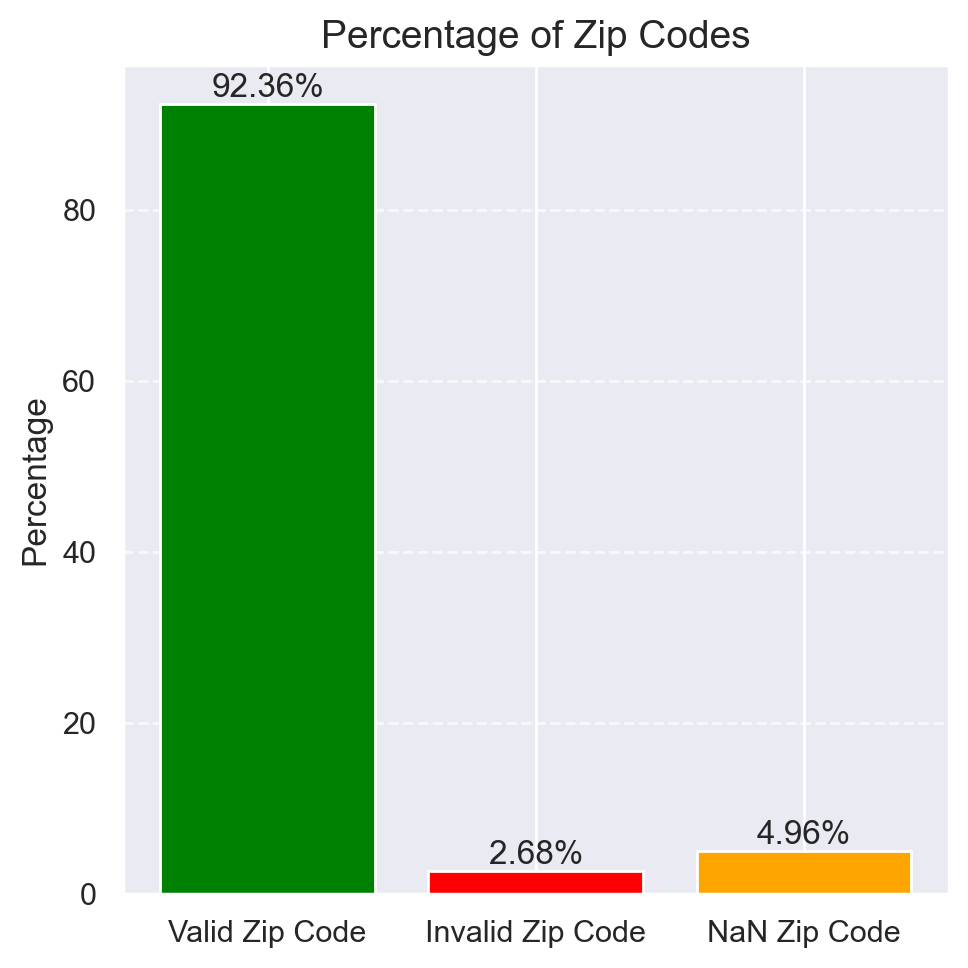

,Category,Count,Percentage
0,Valid Zip Code,514942,92.362468
1,Invalid Zip Code,14934,2.678634
2,NaN Zip Code,27647,4.958899


In [693]:
# Count the valid zip codes
count_valid_zip_codes = len(valid_zip_codes['Zip Code'])

# Count the invalid zip codes
count_invalid_zip_codes = len(invalid_zip_codes['Zip Code'])

# Count the NaN values in 'Zip Code'
count_nan_codes = df_inconsistencies['Zip Code'].isna().sum()

# Calculate the total number of entries (including NaN)
total_count = len(df_inconsistencies)

# Create a summary DataFrame with counts and percentages
summary_df = pd.DataFrame({
    'Category': ['Valid Zip Code', 'Invalid Zip Code', 'NaN Zip Code'],
    'Count': [count_valid_zip_codes, count_invalid_zip_codes, count_nan_codes]
})

# Calculate percentages
summary_df['Percentage'] = (summary_df['Count'] / total_count) * 100

# Create a bar chart for percentages
plt.figure(figsize=(5, 5))
bars = plt.bar(summary_df['Category'], summary_df['Percentage'], color=['green', 'red', 'orange'])
plt.title('Percentage of Zip Codes', fontsize=14)
plt.ylabel('Percentage', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

# Optionally, display the summary table for review
summary_df

**Conclusion:** We found that 2.68% of the zip codes in the dataset were invalid. These invalid zip codes were converted to NaN values, and we plan to replace them later using KNN imputation.

In [694]:
# Define the valid zip code pattern (5 digits)
valid_zip_pattern = r'^\d{5}$'

# Replace invalid zip codes with NaN
df_inconsistencies['Zip Code'] = df_inconsistencies['Zip Code'].apply(lambda x: x if re.match(valid_zip_pattern, str(x)) else np.nan)

In [695]:
df_test_inconsistencies['Zip Code'] = df_test_inconsistencies['Zip Code'].apply(lambda x: x if re.match(valid_zip_pattern, str(x)) else np.nan)

### 'Carrier Name'

In [696]:
# Get sorted unique carrier names before cleaning
carrier_names_before = sorted(df_inconsistencies["Carrier Name"].unique())
print("Carrier Names (Before Treating):")
carrier_names_before

Carrier Names (Before Treating):


['*** CARRIER UNDETERMINED ***',
 'A I U INSURANCE COMPANY',
 'ABF FREIGHT SYSTEM, INC.',
 'ABF FREIGHT SYSTEMS INC DEL',
 'ACADIA INSURANCE COMPANY',
 'ACCIDENT FUND GENERAL',
 'ACCIDENT FUND GENERAL INS CO',
 'ACCIDENT FUND INSURANCE',
 'ACCIDENT FUND INSURANCE CO',
 'ACCIDENT FUND NATIONAL INS CO',
 'ACCIDENT FUND NATONAL INS CO',
 'ACCREDITED SURETY AND CASUALTY',
 'ACE AMERICAN INSURANCE CO',
 'ACE AMERICAN INSURANCE CO.',
 'ACE FIRE UNDERWRITERS',
 'ACE FIRE UNDERWRITERS INS',
 'ACE PROPERTY & CASUALTY INS CO',
 'ACE PROPERTY AND CASUALTY',
 'ACIG INSURANCE COMPANY',
 'ADDISON CENTRAL SCHOOL DISTRIC',
 'ADDISON CSD',
 'ADIRONDACK CENTRAL SCHOOL',
 'ADIRONDACK CSD',
 'ADMIRAL INDEMNITY COMPANY',
 'ADMIRAL INDEMNITY CORP.',
 'AIG PROPERTY CASUALTY CO.',
 'AIG PROPERTY CASUALTY COMPANY',
 'AIU INSURANCE CO',
 'AKRON CENTRAL SCHOOL DISTRICT',
 'AKRON CSD',
 'ALBANY CITY OF',
 'ALBANY CITY SCHOOL DISTRICT',
 'ALBANY, COUNTY OF',
 'ALBION CENTRAL SCHOOL DIST',
 'ALBION CENTRAL SCHOOL D

In [697]:
# Function to clean carrier names
def clean_carrier_name(name):
    # Convert to lowercase
    name = name.lower()

    # Remove special characters (like '*', '.', commas)
    name = re.sub(r'[^\w\s&]', '', name)

    # Remove extra spaces
    name = re.sub(r'\s+', ' ', name).strip()

    # Standardize common abbreviations
    name = re.sub(r'\bco\b', 'company', name)
    name = re.sub(r'\binc\b', 'incorporated', name)
    name = re.sub(r'\bins\b', 'insurance', name)
    name = re.sub(r'\bcsd\b', 'central school district', name)
    
    return name

In [698]:
# Apply the cleaning function on the Carrier Name column
df_inconsistencies["Carrier Name"] = df_inconsistencies["Carrier Name"].apply(clean_carrier_name)

In [699]:
df_test_inconsistencies["Carrier Name"] = df_test_inconsistencies["Carrier Name"].apply(clean_carrier_name)

In [700]:
# Get sorted unique carrier names after cleaning
carrier_names_after = sorted(df_inconsistencies["Carrier Name"].unique())
print("Carrier Names (After Treating):")
carrier_names_after

Carrier Names (After Treating):


['a i u insurance company',
 'abf freight system incorporated',
 'abf freight systems incorporated del',
 'acadia insurance company',
 'accident fund general',
 'accident fund general insurance company',
 'accident fund insurance',
 'accident fund insurance company',
 'accident fund national insurance company',
 'accident fund natonal insurance company',
 'accredited surety and casualty',
 'ace american insurance company',
 'ace fire underwriters',
 'ace fire underwriters insurance',
 'ace property & casualty insurance company',
 'ace property and casualty',
 'acig insurance company',
 'addison central school distric',
 'addison central school district',
 'adirondack central school',
 'adirondack central school district',
 'admiral indemnity company',
 'admiral indemnity corp',
 'aig property casualty company',
 'aiu insurance company',
 'akron central school district',
 'albany city of',
 'albany city school district',
 'albany county of',
 'albion central school dist',
 'albion centr

**Conclusion:** We have fixed some issues with the Carrier Name feature, but some problems remain. For now, we will leave this feature out of our analysis. Later, we will work on improving it.

### Code Columns

- Industry Code: https://www.naics.com/search-naics-codes-by-industry/
- Remaining: https://www.guarantysupport.com/wp-content/uploads/2024/02/WCIO-Legacy.pdf


- As we can see, all the values are positive and range between 10 and 99.

In [701]:
for col in code_columns:
    # Drop missing values before getting unique values
    unique_values = df_inconsistencies[col].dropna().unique()
    print(f"\n{col}:\n{sorted(unique_values)}")


Industry Code:
[11, 21, 22, 23, 31, 32, 33, 42, 44, 45, 48, 49, 51, 52, 53, 54, 55, 56, 61, 62, 71, 72, 81, 92]

WCIO Cause of Injury Code:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 26, 27, 28, 29, 30, 31, 32, 33, 40, 41, 45, 46, 47, 48, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 65, 66, 67, 68, 69, 70, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 93, 94, 95, 96, 97, 98, 99]

WCIO Nature of Injury Code:
[1, 2, 3, 4, 7, 10, 13, 16, 19, 22, 25, 28, 30, 31, 32, 34, 36, 37, 38, 40, 41, 42, 43, 46, 47, 49, 52, 53, 54, 55, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 83, 90, 91]

WCIO Part Of Body Code:
[-9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 66, 90, 91, 99]


**Conclusion:** All codes seem to be aligned with the references, except the "-9" in "WCIO Part Of Body Code". Let's analyze these records

In [702]:
# Filter rows where "WCIO Part Of Body Code" is equal to "-9"
invalid_body_code_rows = df_inconsistencies[df_inconsistencies['WCIO Part Of Body Code'] == '-9']

# Get the count of such rows
count_invalid_body_code = len(invalid_body_code_rows)

# Calculate the percentage of these rows in the entire dataset
total_rows = len(df_inconsistencies)
perc_invalid_body_code = (count_invalid_body_code / total_rows) * 100

# Output the count and percentage
print(f"Number of rows with WCIO Part Of Body Code = '-9': {count_invalid_body_code} ({round(perc_invalid_body_code, 2)}%)")

# Display unique descriptions
invalid_body_code_rows[["WCIO Part Of Body Code", "WCIO Part Of Body Description"]].drop_duplicates()

Number of rows with WCIO Part Of Body Code = '-9': 0 (0.0%)


,WCIO Part Of Body Code,WCIO Part Of Body Description
Claim Identifier,,


In [703]:
# Filter rows where "WCIO Part Of Body Code" is equal to "90"
body_code_90_rows = df_inconsistencies[df_inconsistencies['WCIO Part Of Body Code'] == '90']

# Display unique descriptions
body_code_90_rows[["WCIO Part Of Body Code", "WCIO Part Of Body Description"]].drop_duplicates()

,WCIO Part Of Body Code,WCIO Part Of Body Description
Claim Identifier,,


In [704]:
# Define the condition for rows with codes '-9' or '90'
condition = df_inconsistencies['WCIO Part Of Body Code'].isin(['-9', '90'])
test_condition = df_test_inconsistencies['WCIO Part Of Body Code'].isin(['-9', '90'])

# Update the code and description for these rows
df_inconsistencies.loc[df_inconsistencies['WCIO Part Of Body Code'] == '-9', 'WCIO Part Of Body Code'] = '90'
df_inconsistencies.loc[condition, 'WCIO Part Of Body Description'] = 'Multiple Body Parts'

df_test_inconsistencies.loc[df_test_inconsistencies['WCIO Part Of Body Code'] == '-9', 'WCIO Part Of Body Code'] = '90'
df_test_inconsistencies.loc[test_condition, 'WCIO Part Of Body Description'] = 'Multiple Body Parts'

# Verify the changes
updated_rows = df_inconsistencies[condition][['WCIO Part Of Body Code', 'WCIO Part Of Body Description']]

# Calculate the total number of rows for percentage
total_rows = len(df_inconsistencies)

# Print the count and percentage of updated rows
updated_count = len(updated_rows)
updated_percentage = (updated_count / total_rows) * 100

print(f"Number of updated rows: {updated_count} ({updated_percentage:.2f}%)")

Number of updated rows: 0 (0.00%)


**Conclusion:** We identified that 7.41% of records had an inconsistent value in the “WCIO Part Of Body Code”: “-9”. Based on the reference, which indicates that code “90” corresponds to “Multiple Body Parts (including Body Systems & Body Parts)”, we standardized these by changing -9 to 90 and updating both codes to have the description “Multiple Body Parts.” This approach was supported by the reference and helped improve consistency across the dataset.

### Rows Removed

In [705]:
# Calculate the number of rows removed
rows_removed_inconsistencies = len(df_adjust_dtypes) - len(df_inconsistencies)
total_rows_removed = len(df) - len(df_inconsistencies)


# Calculate the percentage of rows removed
percent_rows_removed_inconsistencies = rows_removed_inconsistencies / len(df_adjust_dtypes) * 100
percent_total_rows_removed = total_rows_removed / len(df) * 100

# Print the results
print(f"Total rows removed due to inconsistencies: {rows_removed_inconsistencies} ({round(percent_rows_removed_inconsistencies, 2)}%)")
print(f"Total rows removed until now: {total_rows_removed} ({round(percent_total_rows_removed, 2)}%)")

Total rows removed due to inconsistencies: 14948 (2.61%)
Total rows removed until now: 35948 (6.06%)


## 3.7. Train-Validation Split <a id="split"></a>

This is when we need to split the data into train and validation sets, to ensure that no information from the validation set leaks into the training process

In [706]:
# Separate features (data) and target (target_variable)
data = df_inconsistencies.drop(columns=["Claim Injury Type"])
target = df_inconsistencies["Claim Injury Type"]

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(data,
                                      target,
                                      test_size = 0.2,
                                      random_state = 15,
                                      shuffle = True,
                                      stratify = target
)

## 3.8. Outliers <a id="outliers"></a>

In [707]:
X_train_outliers = X_train.copy()
X_val_outliers = X_val.copy()
# X_test_outliers = df_test_inconsistencies.copy()

### 3.8.1 Defining Features <a id="defining_features"></a>

In [708]:
# Define metric (numerical) features for both train and validation datasets
metric_features = X_train_outliers.select_dtypes(include=['number']).columns.tolist()
non_metric_features = X_train_outliers.select_dtypes(exclude=['number']).columns.tolist()

In [709]:
metric_features

['Age at Injury',
 'Alternative Dispute Resolution',
 'Attorney/Representative',
 'Average Weekly Wage',
 'COVID-19 Indicator']

In [710]:
non_metric_features

['Accident Date',
 'Assembly Date',
 'C-2 Date',
 'C-3 Date',
 'Carrier Name',
 'Carrier Type',
 'County of Injury',
 'District Name',
 'First Hearing Date',
 'Industry Code',
 'Industry Code Description',
 'Medical Fee Region',
 'WCIO Cause of Injury Code',
 'WCIO Cause of Injury Description',
 'WCIO Nature of Injury Code',
 'WCIO Nature of Injury Description',
 'WCIO Part Of Body Code',
 'WCIO Part Of Body Description',
 'Zip Code',
 'Male']

### 3.8.2 Visualizations <a id="visualizations"></a>

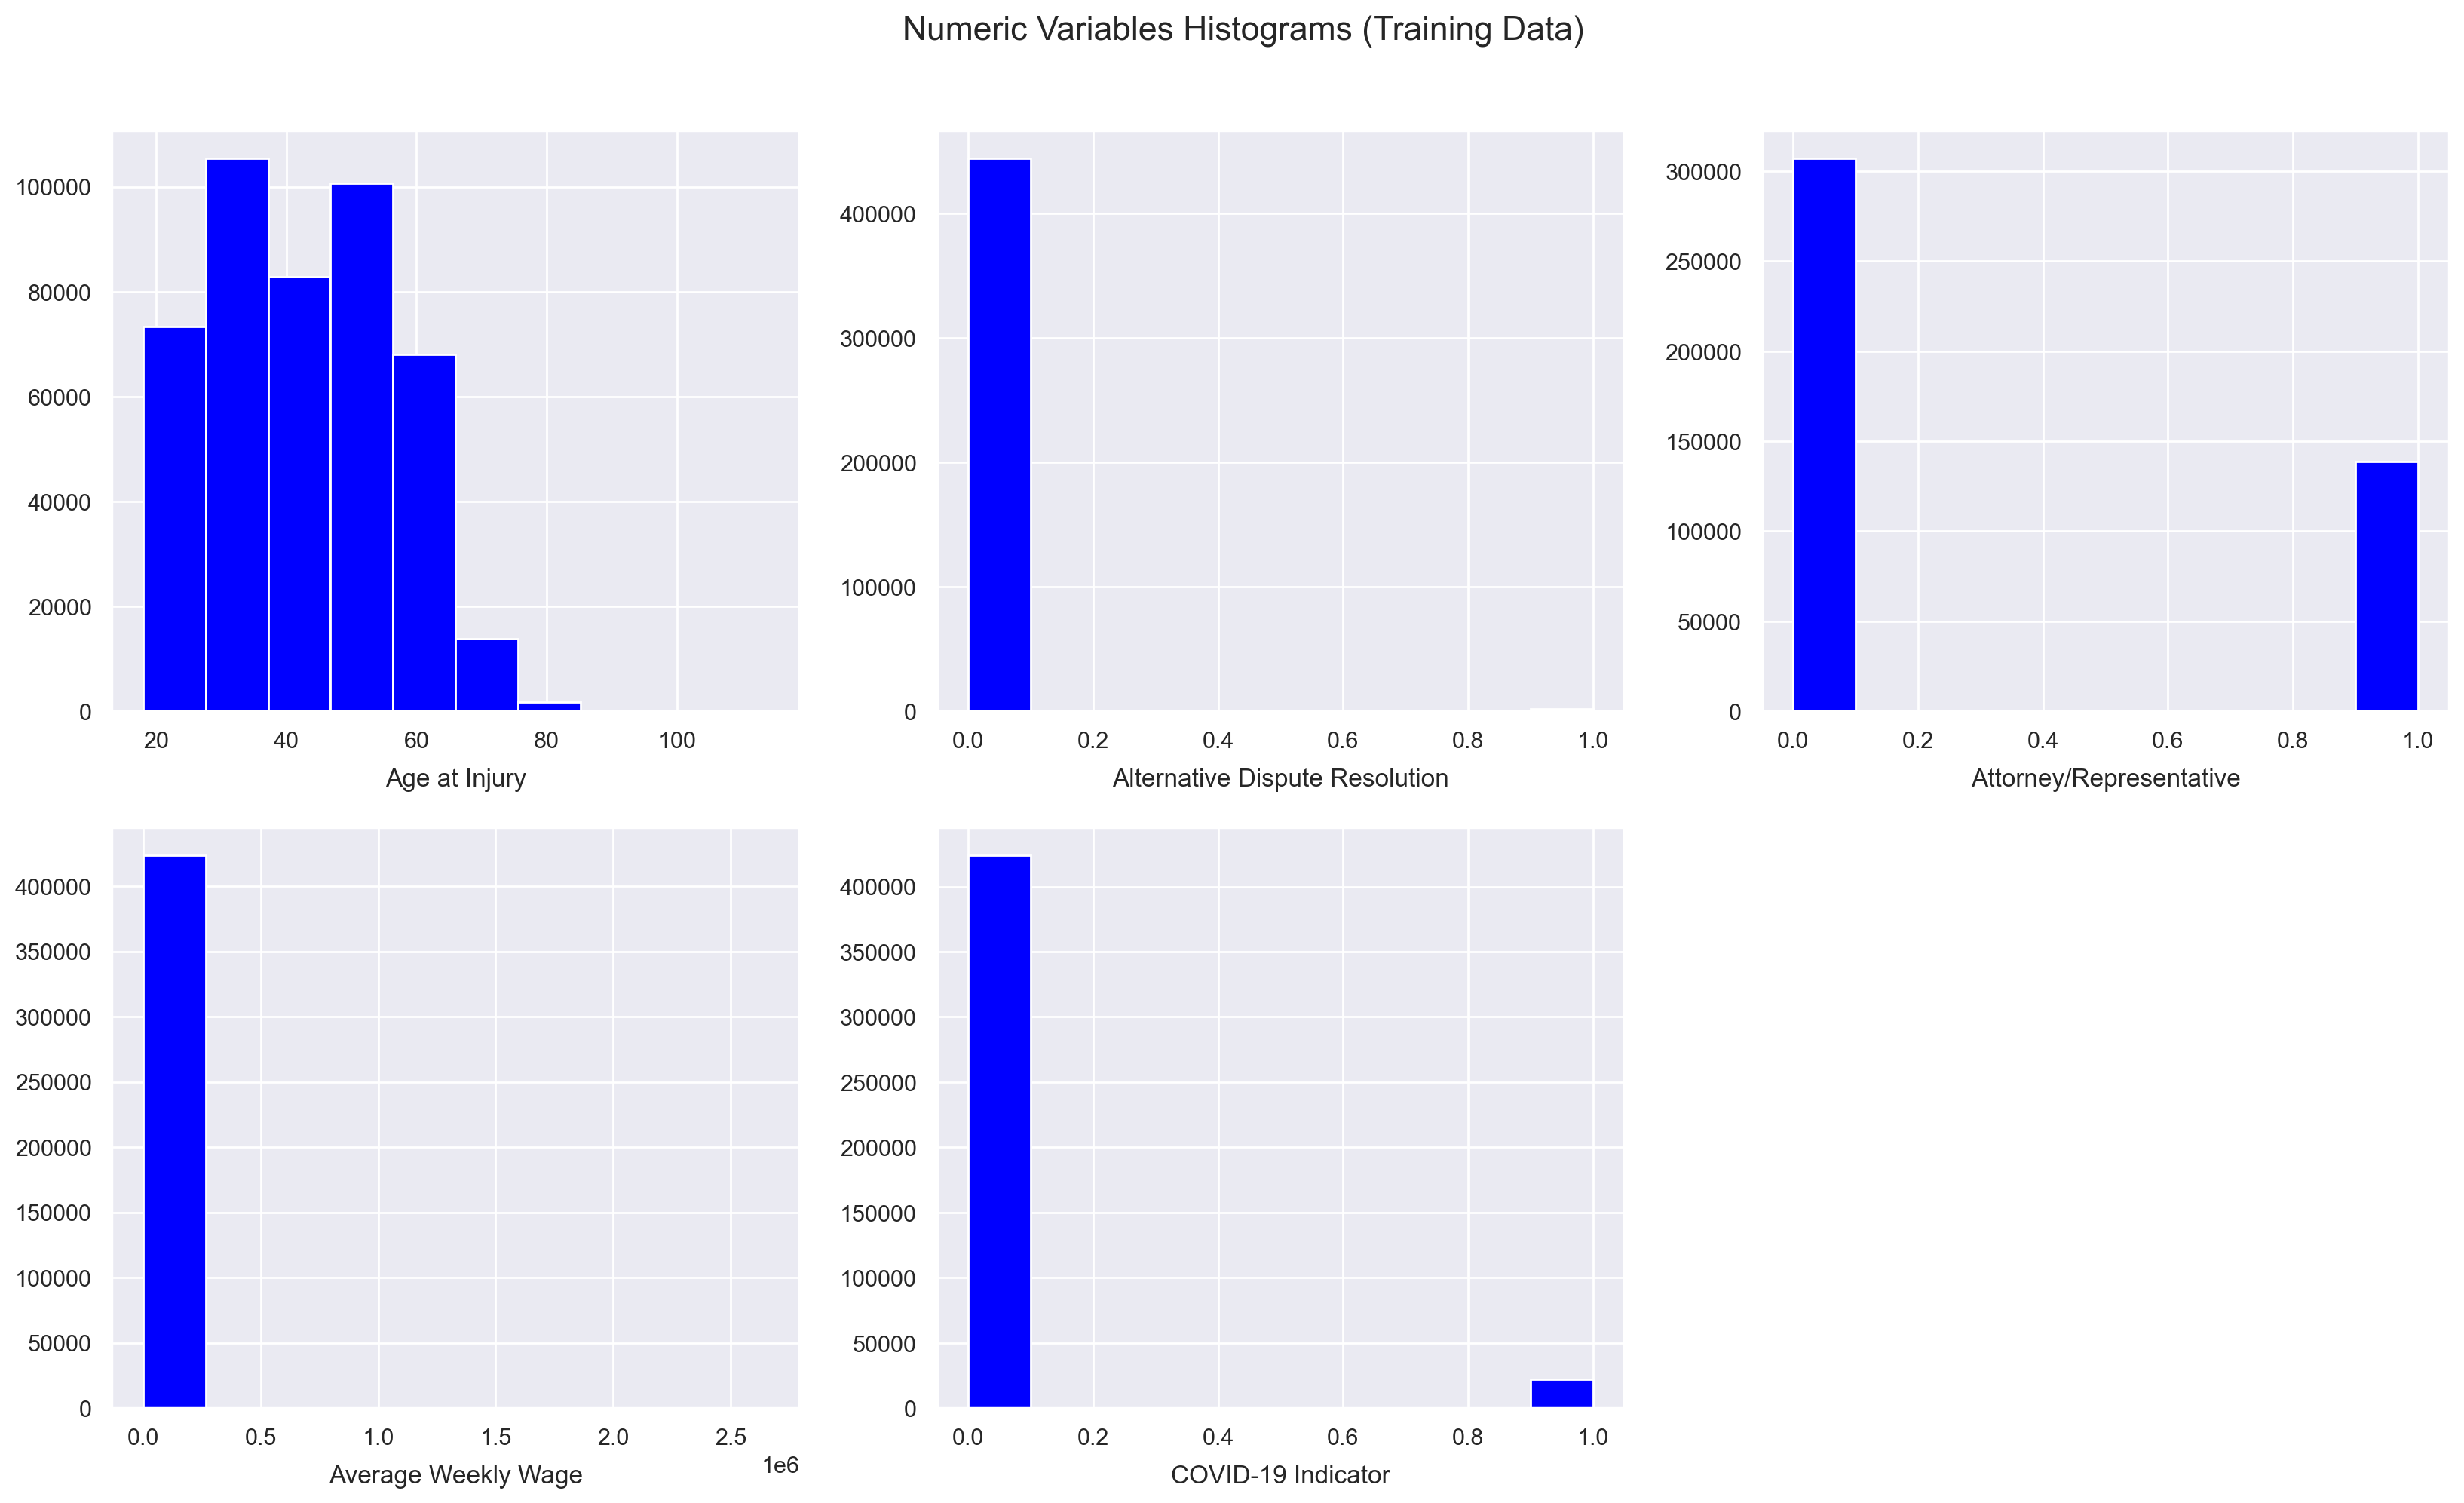

In [711]:
# Plot all numeric features (histograms) for training data
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot histograms for X_train_outliers
for ax, feat in zip(axes.flatten(), metric_features):
    ax.hist(X_train_outliers[feat], bins=10, color='blue')
    ax.set_title(feat, y=-0.15)

# Remove empty axes (if there are any)
for ax in axes.flatten()[len(metric_features):]:
    fig.delaxes(ax)

plt.suptitle('Numeric Variables Histograms (Training Data)', fontsize=16, y=0.95)
plt.show()

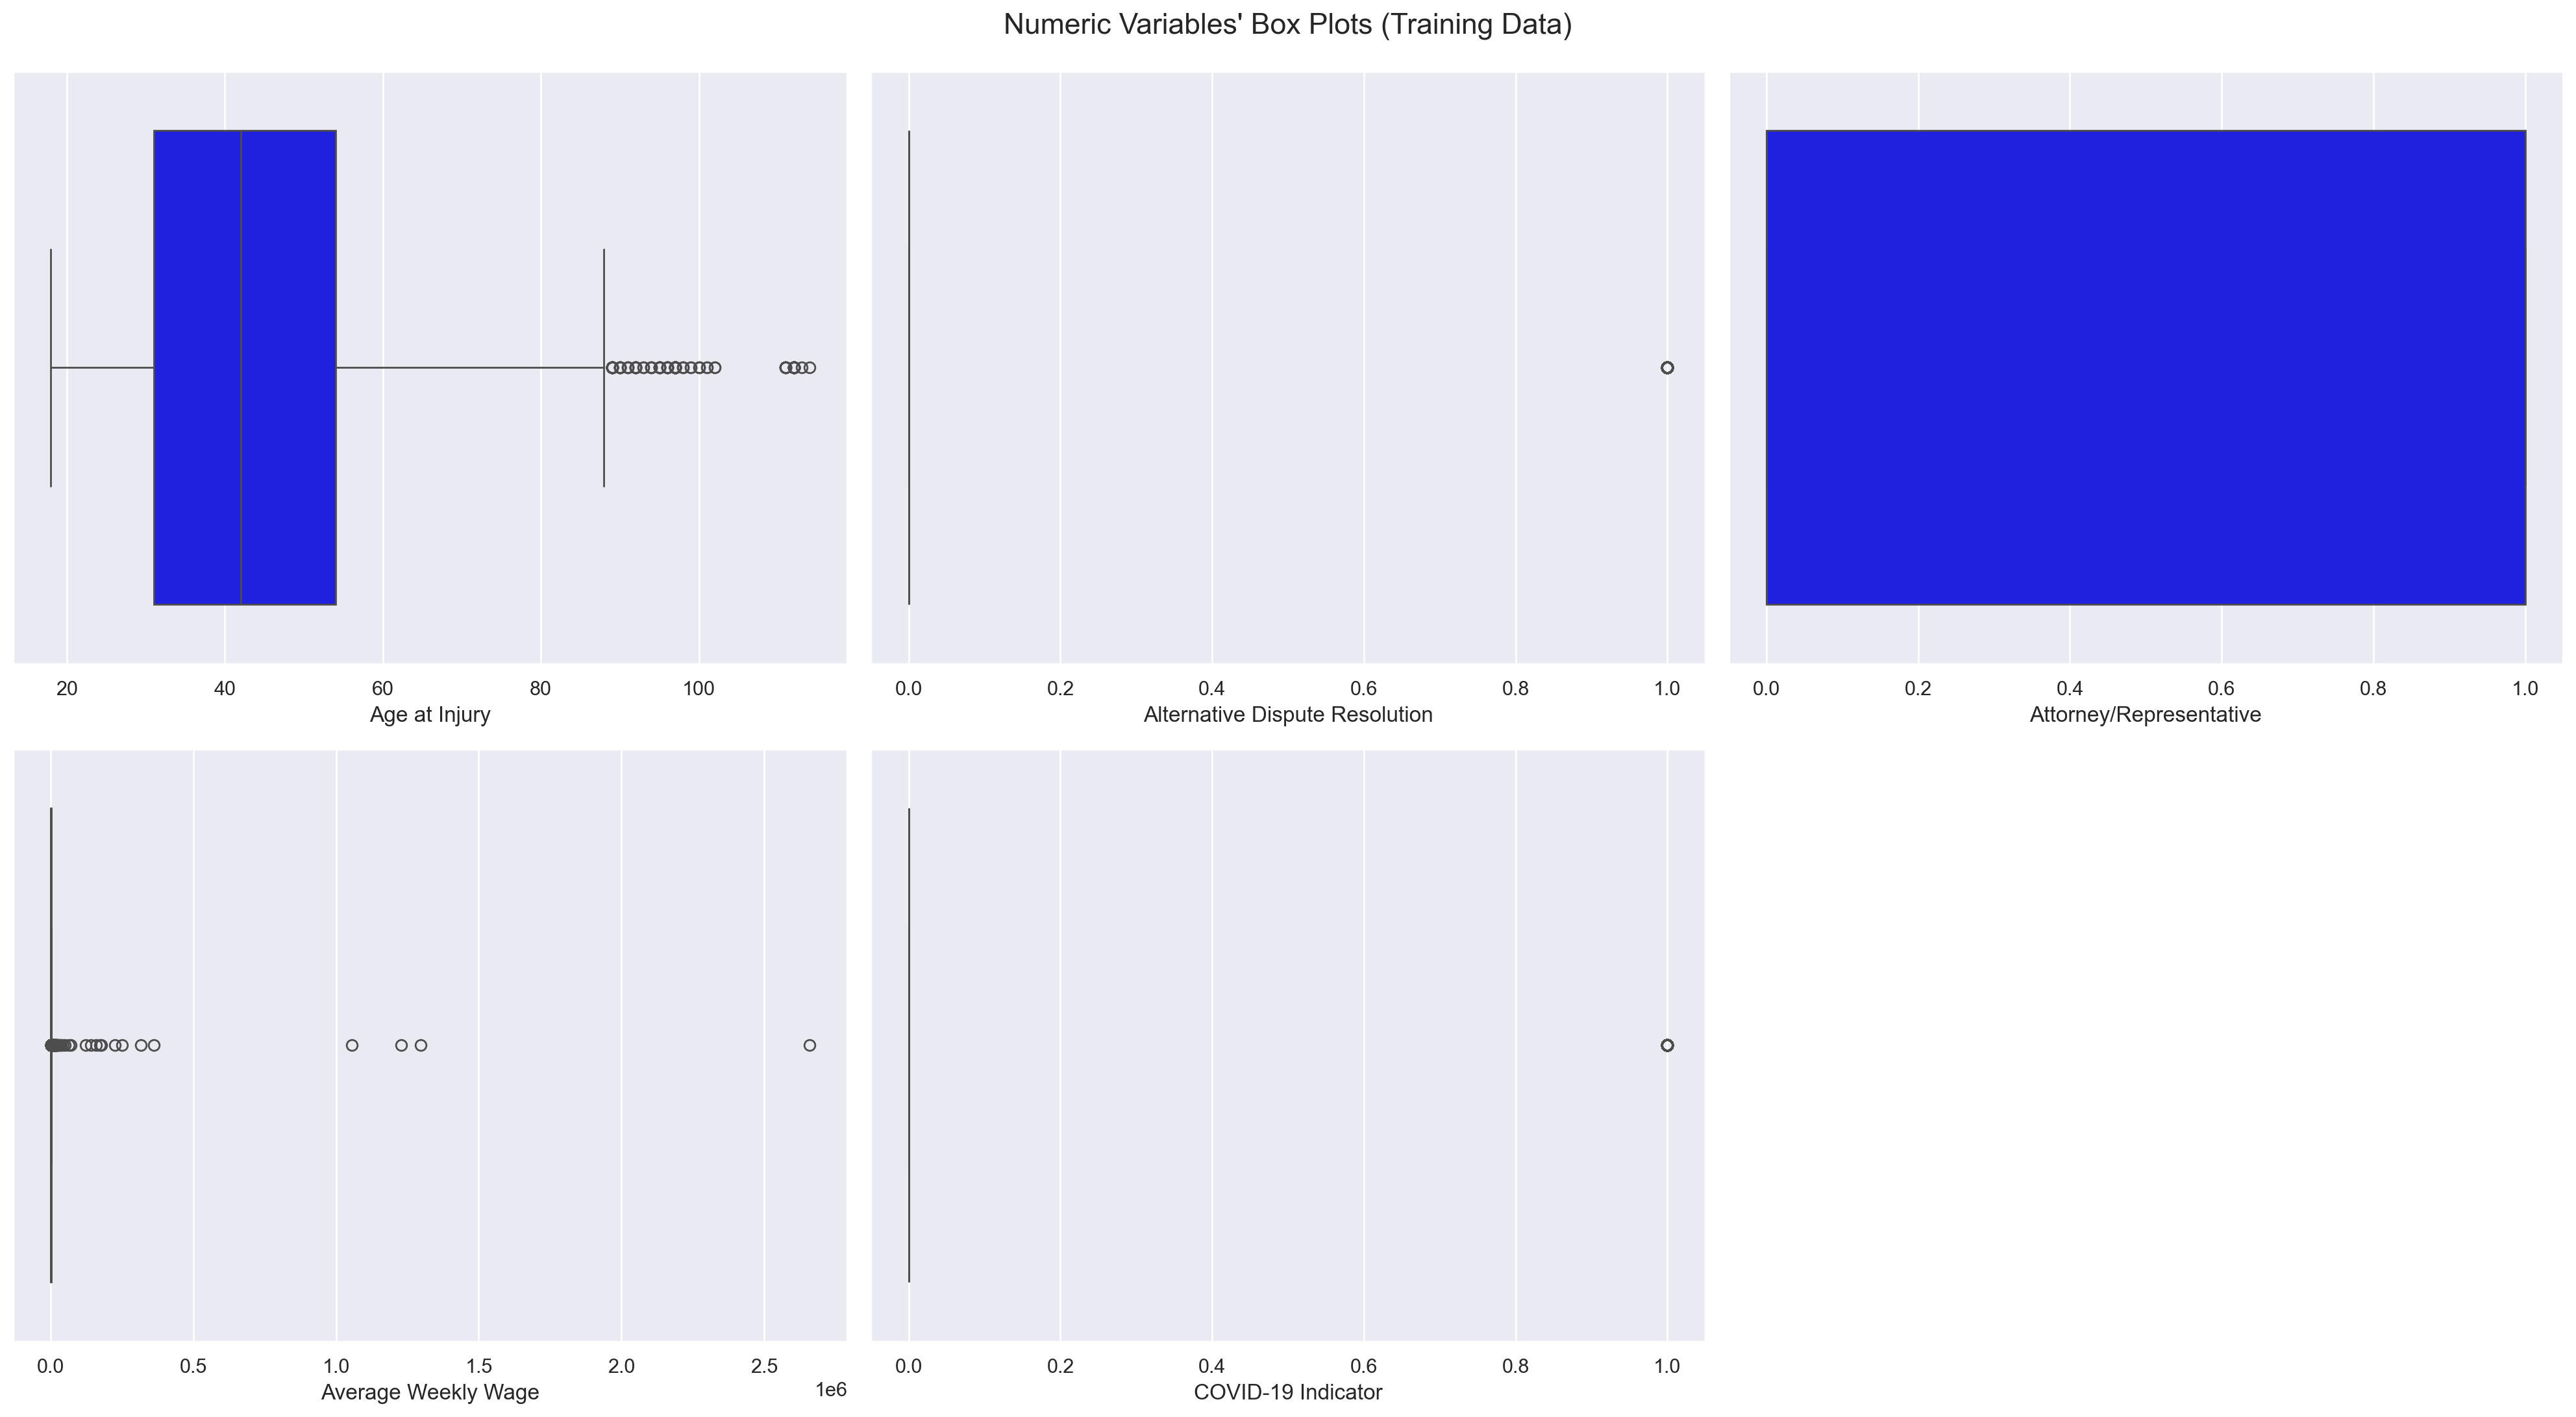

In [712]:
# Create box plots for each numerical feature for training data
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(data=X_train_outliers, x=feat, ax=ax, color='blue')

plt.suptitle("Numeric Variables' Box Plots (Training Data)", fontsize=16, y=0.99)

# Remove empty axes (if there are any)
for ax in axes.flatten()[len(metric_features):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

### 3.8.3 Filtering <a id="filtering"></a>

#### 3.8.3.1 Filter 1 - IQR Method <a id="filter1"></a>

We should as well solve the problem with the outliers: our initial idea was to use the **Z-score** method to identify and potentially remove outliers. However, this approach has its limitations, as it is only applicable to data columns that are normally distributed. Therefore, we decided to use the **Interquartile Range (IQR)** method to handle skewed distributions more effectively.

In [713]:
def drop_outliers_iqr(df, metric_features):
    # Calculate Q1, Q3, and IQR for each metric feature
    Q1 = df[metric_features].quantile(0.25)
    Q3 = df[metric_features].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate upper and lower bounds
    upper_lim = Q3 + 1.5 * IQR
    lower_lim = Q1 - 1.5 * IQR

    # Create a filter for rows within bounds
    filter_mask = (df[metric_features] >= lower_lim) & (df[metric_features] <= upper_lim)
    
    # Keep rows where all conditions are True across metric features
    filter_mask = filter_mask.all(axis=1)

    # Filter the original dataframe
    df_filtered = df[filter_mask]
    
    return df_filtered

In [714]:
# Usage Example
outliers_filter1 = drop_outliers_iqr(X_train_outliers, metric_features)

# Calculate the number of rows before and after removing outliers
original_count = len(X_train_outliers)
filtered_count = len(outliers_filter1)

# Calculate the percentage of rows removed
rows_removed = original_count - filtered_count
percentage_removed = (rows_removed / original_count) * 100

# Output the result
print(f'Outliers Removed (in training data) Due to IQR method: {rows_removed} ({percentage_removed:.2f}%)')

Outliers Removed (in training data) Due to IQR method: 59502 (13.34%)


**Conclusion:** As we can notice, this approach is problematic since it removes too much observations.

#### 3.8.3.2 Filter 2 - Manual <a id="filter2"></a>

In [715]:
X_train_outliers[metric_features].describe()

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,COVID-19 Indicator
count,446018.000000,446016.0,446018.000000,4.238290e+05,446018.000000
mean,42.614870,0.003693,0.311241,4.969865e+02,0.049011
std,13.662398,0.060655,0.463002,5.340106e+03,0.215892
min,18.000000,0.0,0.000000,0.000000e+00,0.000000
25%,31.000000,0.0,0.000000,0.000000e+00,0.000000
50%,42.000000,0.0,0.000000,0.000000e+00,0.000000
75%,54.000000,0.0,1.000000,8.572900e+02,0.000000
max,114.000000,1.0,1.000000,2.659398e+06,1.000000


In [716]:
print(sorted(X_train_outliers["Age at Injury"].unique(), reverse=True))

[114, 113, 112, 111, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18]


In [717]:
# Define the threshold for age and average weekly wage (based on training data)
age_threshold = 100
avg_wage_threshold = 8_000 # a value 0 could be possible:
                           # the individual might not have worked during the period,
                           # or their wage is zero for some reason (e.g., leave of absence, unemployment)

# Store the original row count before filtering for both training and validation
original_train_row_count = len(X_train_outliers)

# Define conditions for each feature to identify outliers, while preserving NaN values
filter_age_train = X_train_outliers["Age at Injury"].isna() | (X_train_outliers["Age at Injury"] <= age_threshold)
filter_wage_train = X_train_outliers["Average Weekly Wage"].isna() | (X_train_outliers["Average Weekly Wage"] <= avg_wage_threshold)

filter_age_val = X_val_outliers["Age at Injury"].isna() | (X_val_outliers["Age at Injury"] <= age_threshold)
filter_wage_val = X_val_outliers["Average Weekly Wage"].isna() | (X_val_outliers["Average Weekly Wage"] <= avg_wage_threshold)

# filter_age_test = X_test_outliers["Age at Injury"].isna() | (X_test_outliers["Age at Injury"] <= age_threshold)
# filter_wage_test = X_test_outliers["Average Weekly Wage"].isna() | (X_test_outliers["Average Weekly Wage"] <= avg_wage_threshold)

# Apply the combined filter to the training and validation data (X and y)
X_train_outliers = X_train_outliers[filter_age_train & filter_wage_train]
y_train = y_train[filter_age_train & filter_wage_train]

X_val_outliers = X_val_outliers[filter_age_val & filter_wage_val]
y_val = y_val[filter_age_val & filter_wage_val]

# X_test_outliers = X_test_outliers[filter_age_test & filter_wage_test]

# Calculate rows removed in the training data
train_filtered_row_count = len(X_train_outliers)

# Rows removed and percentage for training set
train_rows_removed = original_train_row_count - train_filtered_row_count
train_perc_removed = (train_rows_removed / original_train_row_count) * 100

# Print out the results
print(f"Outliers Removed from Training Set (excluding NaNs): {train_rows_removed} ({round(train_perc_removed, 2)}%)")

Outliers Removed from Training Set (excluding NaNs): 100 (0.02%)


In [718]:
X_train_outliers[metric_features].describe()

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,COVID-19 Indicator
count,445918.000000,445916.0,445918.000000,423729.000000,445918.000000
mean,42.609991,0.003694,0.311239,475.633438,0.048993
std,13.651721,0.060662,0.463001,744.364478,0.215854
min,18.000000,0.0,0.000000,0.000000,0.000000
25%,31.000000,0.0,0.000000,0.000000,0.000000
50%,42.000000,0.0,0.000000,0.000000,0.000000
75%,54.000000,0.0,1.000000,856.830000,0.000000
max,100.000000,1.0,1.000000,7996.760000,1.000000


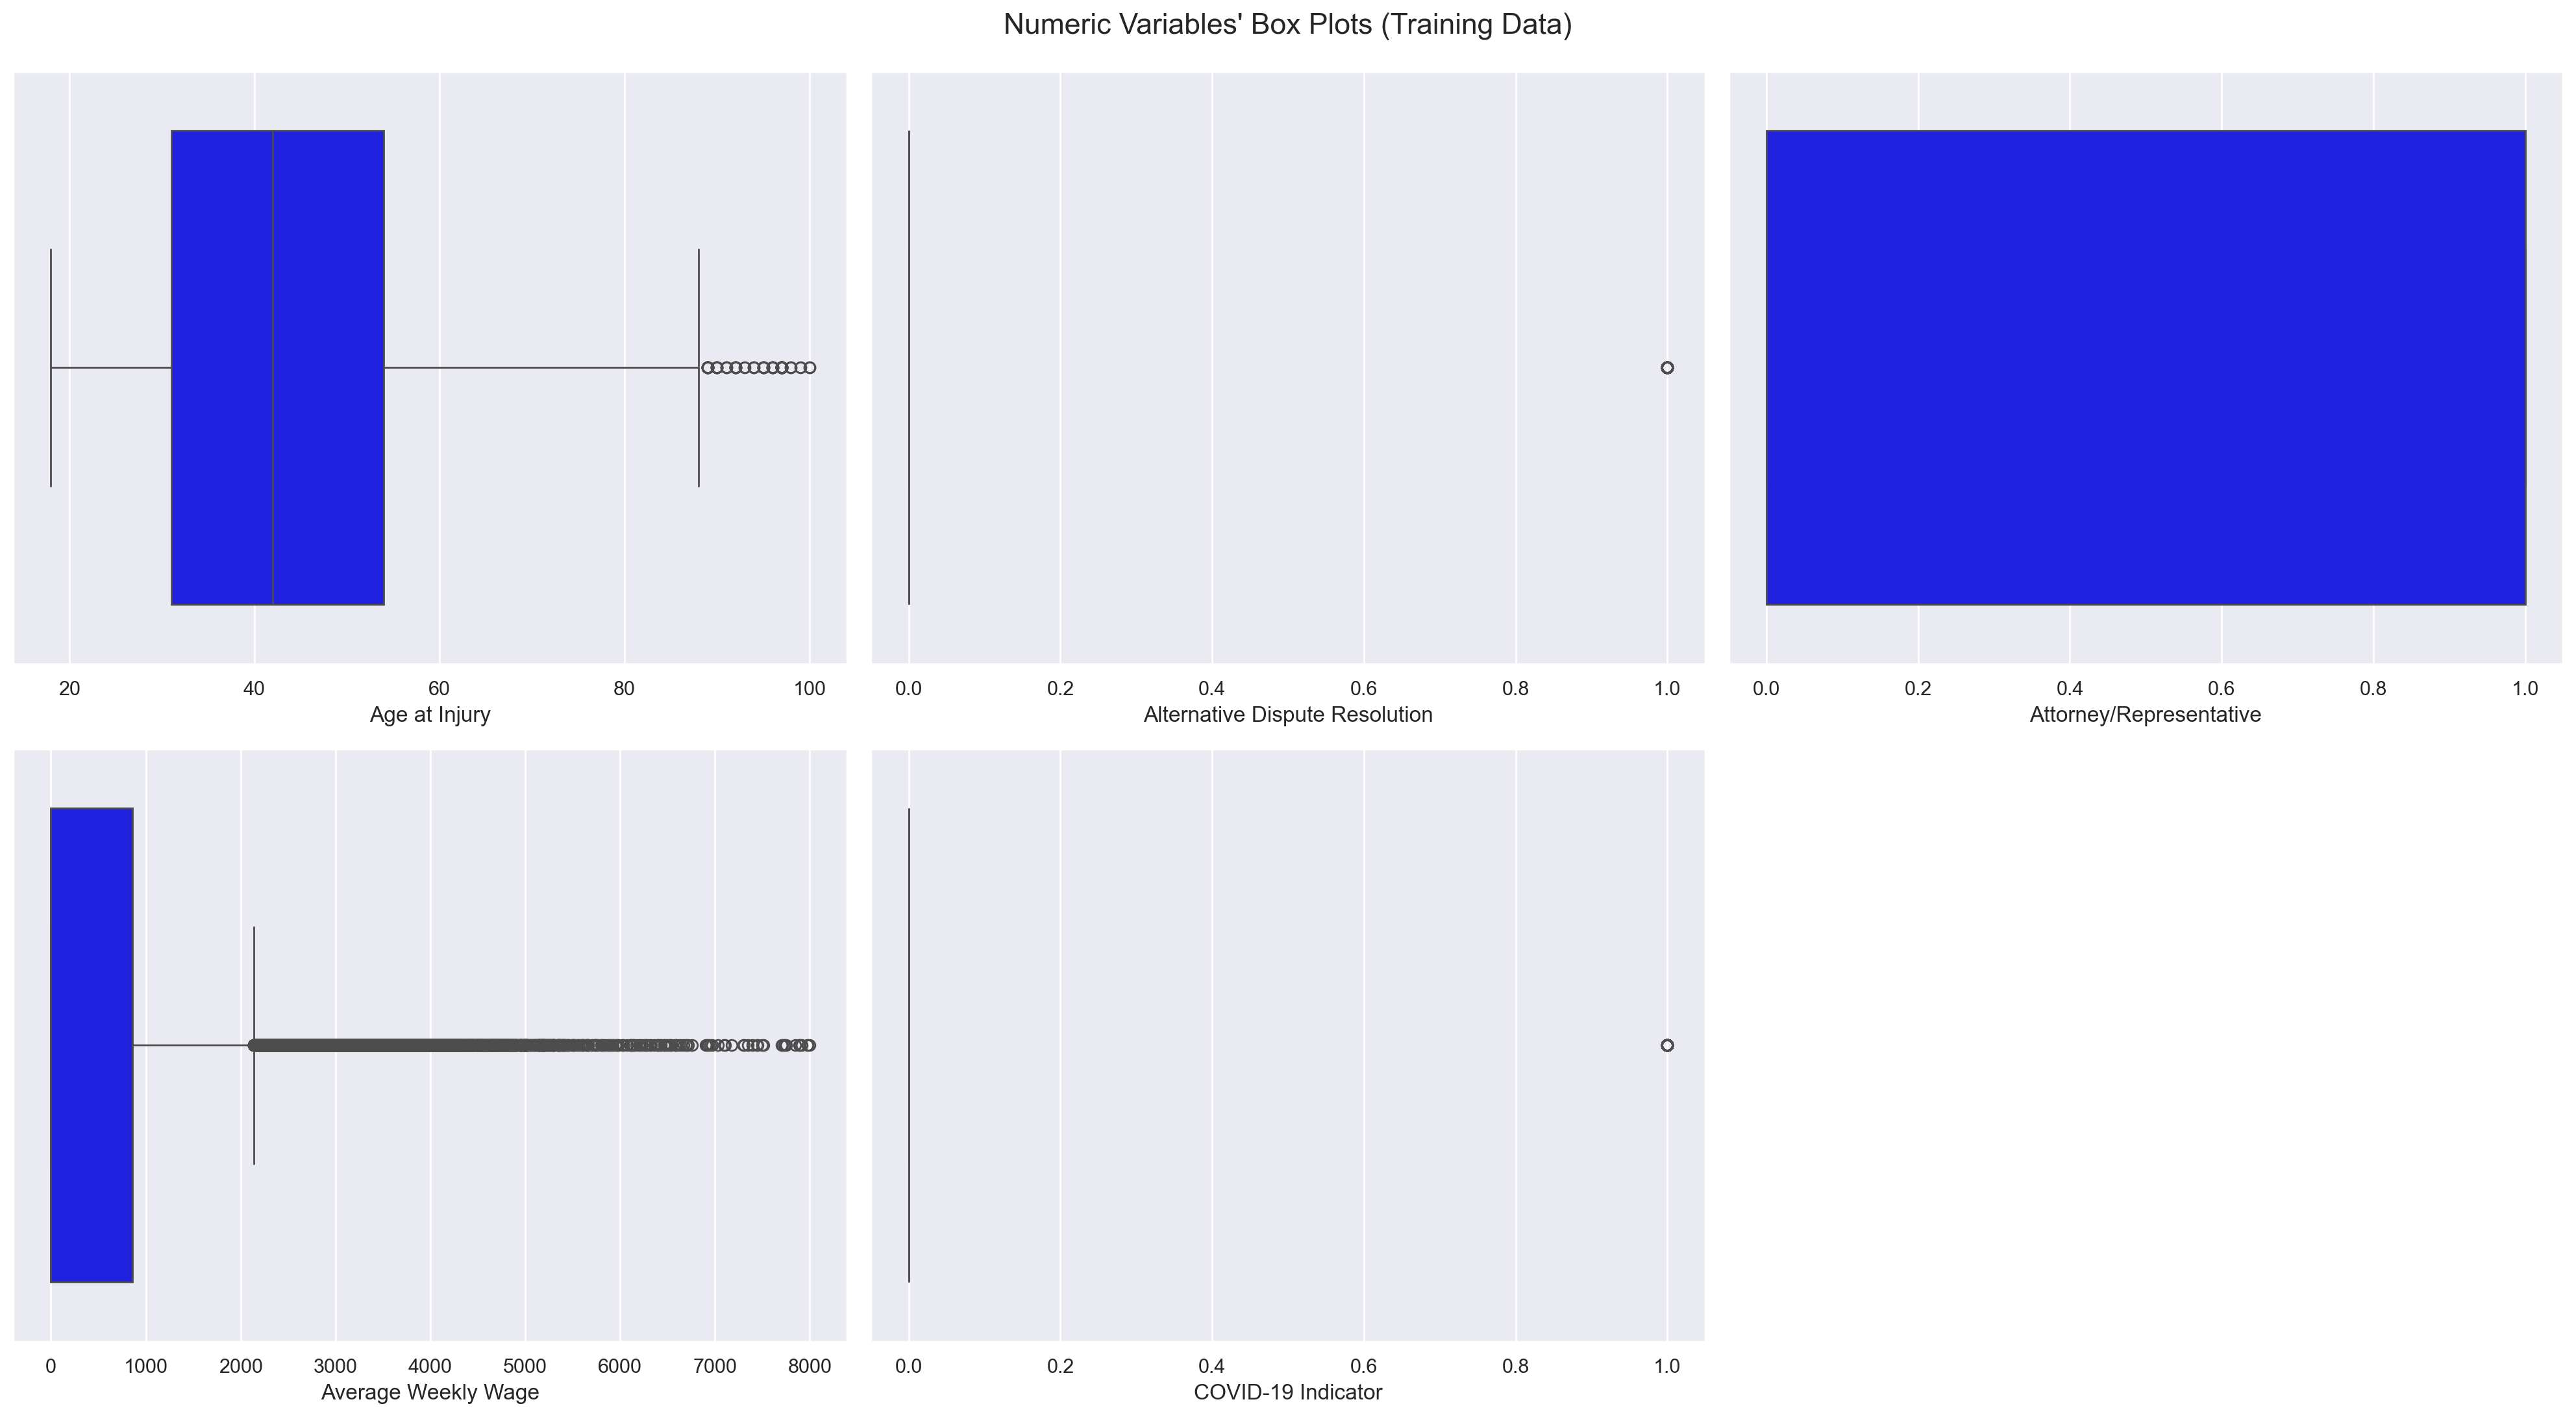

In [719]:
# Create box plots for each numerical feature for training data
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(data=X_train_outliers, x=feat, ax=ax, color='blue')

plt.suptitle("Numeric Variables' Box Plots (Training Data)", fontsize=16, y=0.99)

# Remove empty axes (if there are any)
for ax in axes.flatten()[len(metric_features):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

#### 3.8.3.3 Filter 3 - Winsorization <a id="filter3"></a>

Winsorizing the data involves replacing the outliers with the nearest non-outlier values. This ensures that the extreme values are still accounted for in the analysis, but their impact is minimized.

In [720]:
# Define Winsorization function based on IQR
def apply_winsorization(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count affected rows before applying Winsorization
    affected_before = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]

    # Apply Winsorization
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    
    return df, affected_before

In [721]:
# Apply Winsorization to relevant columns in X_train_outliers (training data)
X_train_outliers, affected_age_train = apply_winsorization(X_train_outliers, "Age at Injury")
X_train_outliers, affected_wage_train = apply_winsorization(X_train_outliers, "Average Weekly Wage")

X_val_outliers, affected_age_val = apply_winsorization(X_val_outliers, "Age at Injury")
X_val_outliers, affected_wage_val = apply_winsorization(X_val_outliers, "Average Weekly Wage")

# X_test_outliers, affected_age_test = apply_winsorization(X_test_outliers, "Age at Injury")
# X_test_outliers, affected_wage_test = apply_winsorization(X_test_outliers, "Average Weekly Wage")

# Calculate total affected rows and percentage for the training set
total_affected_train = affected_age_train + affected_wage_train
total_percentage_train = (total_affected_train / X_train_outliers.shape[0]) * 100

# Calculate individual percentages for each variable in the training set
perc_age_train = (affected_age_train / X_train_outliers.shape[0]) * 100
perc_wage_train = (affected_wage_train / X_train_outliers.shape[0]) * 100

# Print results for the training data
print(f"Age at Injury (Training Data): {affected_age_train} rows affected ({perc_age_train:.2f}%)")
print(f"Average Weekly Wage (Training Data): {affected_wage_train} rows affected ({perc_wage_train:.2f}%)")
print(f"Total rows affected in Training Data: {total_affected_train} ({total_percentage_train:.2f}%)")

Age at Injury (Training Data): 108 rows affected (0.02%)
Average Weekly Wage (Training Data): 16350 rows affected (3.67%)
Total rows affected in Training Data: 16458 (3.69%)


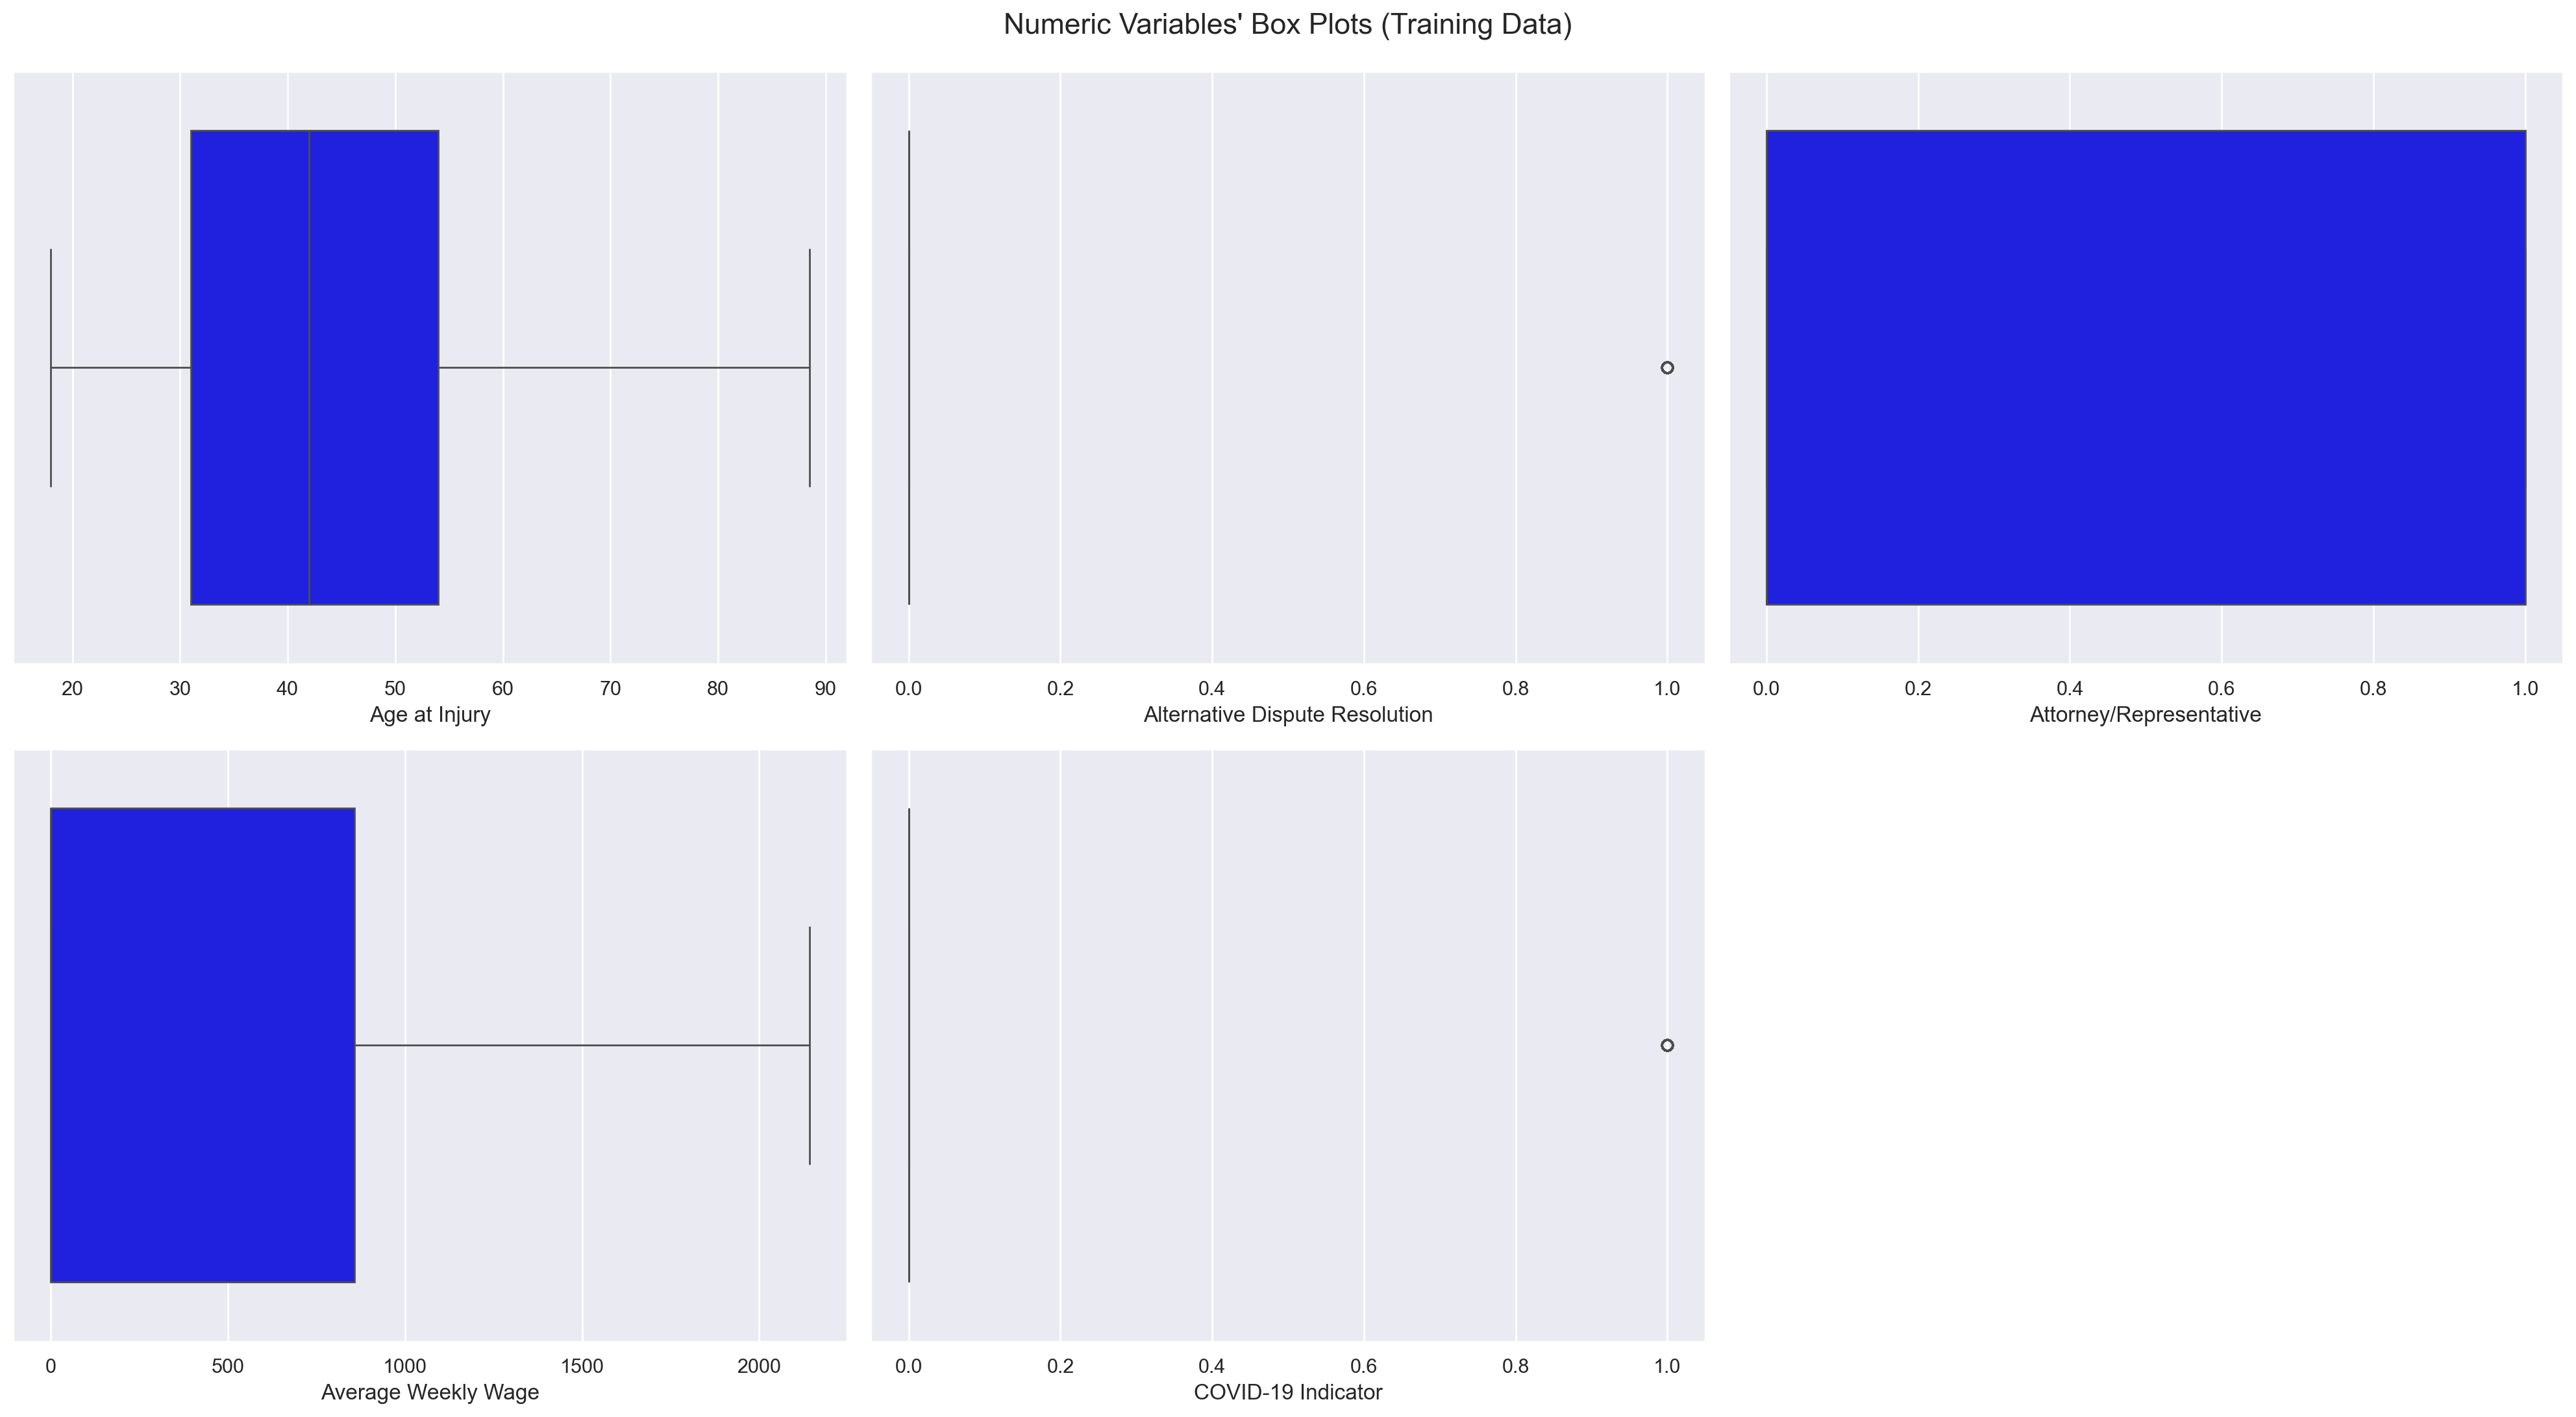

In [722]:
# Create box plots for each numerical feature for training data
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(data=X_train_outliers, x=feat, ax=ax, color='blue')

plt.suptitle("Numeric Variables' Box Plots (Training Data)", fontsize=16, y=0.99)

# Remove empty axes (if there are any)
for ax in axes.flatten()[len(metric_features):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

### Rows Removed

In [723]:
# Calculate the number of rows removed from the original training dataset
rows_removed_outliers_train = len(X_train) - len(X_train_outliers)

# Calculate the percentage of rows removed from the training dataset
percent_rows_removed_outliers_train = rows_removed_outliers_train / len(X_train) * 100

# Print the results
print(f"Rows removed due to outliers in training data: {rows_removed_outliers_train} ({round(percent_rows_removed_outliers_train, 2)}%)")

Rows removed due to outliers in training data: 100 (0.02%)


## 3.9. Missing Values Imputation <a id="missing_values_imputation"></a>

In [724]:
X_train_missing_imputation = X_train_outliers.copy()
X_val_missing_imputation = X_val_outliers.copy()
X_test_missing_imputation = df_test_inconsistencies.copy()

In [725]:
# Use fillna to convert all missing values to np.nan, for consistency
X_train_missing_imputation.fillna(np.nan, inplace=True)
X_val_missing_imputation.fillna(np.nan, inplace=True)
X_test_missing_imputation.fillna(np.nan, inplace=True)

In [726]:
# Calculate the percentage of missing values in each column
perc_missing_values = (X_train_missing_imputation.isna().sum() / len(X_train_missing_imputation) * 100)
perc_missing_values[perc_missing_values > 0].sort_values(ascending=False)

First Hearing Date                   73.813795
C-3 Date                             67.674550
Zip Code                              7.640642
Medical Fee Region                    5.618746
Average Weekly Wage                   4.976027
WCIO Part Of Body Code                2.197265
WCIO Part Of Body Description         2.197265
WCIO Nature of Injury Code            1.988931
WCIO Nature of Injury Description     1.988931
WCIO Cause of Injury Code             1.985343
WCIO Cause of Injury Description      1.985343
C-2 Date                              1.858862
Industry Code                         1.221525
Industry Code Description             1.221525
Male                                  0.802614
Carrier Type                          0.231208
County of Injury                      0.202279
Alternative Dispute Resolution        0.000449
dtype: float64

- Actually not missing values (date not defined or forms not received):
    - First Hearing Date
    - C-3 Date
    - C-2 Date
- Ignore description features (because we'll use the codes for the modeling instead of descriptions):
    - WCIO Part Of Body Description
    - WCIO Nature of Injury Description
    - WCIO Cause of Injury Description
    - Industry Code Description

**Conclusion -** missing values to impute:
- Zip Code
- Medical Fee Region
- Average Weekly Wage
- WCIO Part Of Body Code
- WCIO Nature of Injury Code
- WCIO Cause of Injury Code
- Industry Code
- Male
- Carrier Type
- County of Injury
- Alternative Dispute Resolution

In [727]:
numeric_columns = ['Average Weekly Wage',
                   'Male',
                   'Alternative Dispute Resolution']

categorical_columns = ['Zip Code',
                       'Medical Fee Region',
                       'WCIO Part Of Body Code',
                       'WCIO Nature of Injury Code',
                       'WCIO Cause of Injury Code',
                       'Industry Code',
                       'Carrier Type',
                       'County of Injury']

In [728]:
X_train_missing_imputation[numeric_columns + categorical_columns].describe(include='all').round(2)

,Average Weekly Wage,Male,Alternative Dispute Resolution,Zip Code,Medical Fee Region,WCIO Part Of Body Code,WCIO Nature of Injury Code,WCIO Cause of Injury Code,Industry Code,Carrier Type,County of Injury
count,423729.00,442339.00,445916.0,411847,420863,436120.00,437049.00,437065.00,440471.00,444887,445016
unique,NaN,NaN,<NA>,7084,4,NaN,NaN,NaN,NaN,6,62
top,NaN,NaN,<NA>,11236,IV,NaN,NaN,NaN,NaN,1A. PRIVATE,SUFFOLK
freq,NaN,NaN,<NA>,2626,207388,NaN,NaN,NaN,NaN,221333,46935
mean,451.52,0.59,0.0,NaN,NaN,39.78,40.90,54.15,58.71,NaN,NaN
std,663.65,0.49,0.06,NaN,NaN,22.36,22.18,25.74,19.63,NaN,NaN
min,0.00,0.00,0.0,NaN,NaN,-9.00,1.00,1.00,11.00,NaN,NaN
25%,0.00,0.00,0.0,NaN,NaN,33.00,16.00,31.00,45.00,NaN,NaN
50%,0.00,1.00,0.0,NaN,NaN,38.00,49.00,56.00,61.00,NaN,NaN
75%,856.83,1.00,0.0,NaN,NaN,53.00,52.00,75.00,71.00,NaN,NaN


**Note:** For a quicker execution, use median (for numeric features) and mode (for categorical features) to impute missing values. We will implement KNN imputation at a later stage for more accurate results.

In [729]:
# Create imputers
numeric_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputers to the respective columns in the training data
X_train_missing_imputation[numeric_columns] = numeric_imputer.fit_transform(X_train_missing_imputation[numeric_columns])
X_train_missing_imputation[categorical_columns] = categorical_imputer.fit_transform(X_train_missing_imputation[categorical_columns])

# For validation set
X_val_missing_imputation[numeric_columns] = numeric_imputer.transform(X_val_missing_imputation[numeric_columns])
X_val_missing_imputation[categorical_columns] = categorical_imputer.transform(X_val_missing_imputation[categorical_columns])

# For test set
X_test_missing_imputation[numeric_columns] = numeric_imputer.transform(X_test_missing_imputation[numeric_columns])
X_test_missing_imputation[categorical_columns] = categorical_imputer.transform(X_test_missing_imputation[categorical_columns])

### Scaling the Numerical Features

Since the data is skewed and doesn’t have extreme outliers (which were addressed), using MinMaxScaler is the best approach to scale the features for our model.

In [730]:
# # Initialize MinMaxScaler
# scaler = MinMaxScaler()  # Default range is between 0 and 1

# # Scale the numeric columns in the training and validation datasets
# X_train_missing_imputation[numeric_columns] = scaler.fit_transform(X_train_missing_imputation[numeric_columns])
# X_val_missing_imputation[numeric_columns] = scaler.transform(X_val_missing_imputation[numeric_columns])

In [731]:
# X_train_missing_imputation[numeric_columns].isna().sum()

In [732]:
# X_train_missing_imputation[numeric_columns]

### Imputing Missing Numerical Values with KNN

We use 5 neighbors for KNN imputation as it’s a common choice that works well in most cases.

In [733]:
# # Create the KNN imputer object with 5 neighbors
# knn_imputer = KNNImputer(n_neighbors=5)

# # Impute missing values in numerical columns (train and validation datasets)
# X_train_missing_imputation[numeric_columns] = knn_imputer.fit_transform(X_train_missing_imputation[numeric_columns])
# X_val_missing_imputation[numeric_columns] = knn_imputer.transform(X_val_missing_imputation[numeric_columns])
# X_test_missing_imputation[numeric_columns] = knn_imputer.transform(X_test_missing_imputation[numeric_columns])

In [734]:
# X_train_missing_imputation[numeric_columns].isna().sum()

### De-scaling the Numerical Features

In [735]:
# # De-scale the numerical columns after imputing
# X_train_missing_imputation[numeric_columns] = scaler.inverse_transform(X_train_missing_imputation[numeric_columns])
# X_val_missing_imputation[numeric_columns] = scaler.inverse_transform(X_val_missing_imputation[numeric_columns])
# X_test_missing_imputation[numeric_columns] = scaler.inverse_transform(X_test_missing_imputation[numeric_columns])

In [736]:
# X_train_missing_imputation[numeric_columns].isna().sum()

In [737]:
# X_train_missing_imputation[numeric_columns]

### Encoding Categorical Columns

In [738]:
# # Initialize the OrdinalEncoder with parameters to handle unknown categories
# ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# # Encode categorical columns in both training and validation datasets
# X_train_missing_imputation[categorical_columns] = ordinal_encoder.fit_transform(X_train_missing_imputation[categorical_columns])
# X_val_missing_imputation[categorical_columns] = ordinal_encoder.transform(X_val_missing_imputation[categorical_columns])
# X_test_missing_imputation[categorical_columns] = ordinal_encoder.transform(X_test_missing_imputation[categorical_columns])

# # Convert '-1' values (unknown categories) back to NaN
# X_train_missing_imputation[categorical_columns] = X_train_missing_imputation[categorical_columns].replace(-1, np.nan)
# X_val_missing_imputation[categorical_columns] = X_val_missing_imputation[categorical_columns].replace(-1, np.nan)
# X_test_missing_imputation[categorical_columns] = X_test_missing_imputation[categorical_columns].replace(-1, np.nan)

In [739]:
# X_train_missing_imputation[categorical_columns].isna().sum()

In [740]:
# X_train_missing_imputation[categorical_columns]

### Imputing Missing Categorical Values with KNN

We use 5 neighbors for KNN imputation as it’s a common choice that works well in most cases.

In [741]:
# # Apply KNN Imputer to fill missing values in categorical columns
# knn_imputer = KNNImputer(n_neighbors=5)

# # Apply KNN imputation to the categorical columns
# X_train_missing_imputation[categorical_columns] = knn_imputer.fit_transform(X_train_missing_imputation[categorical_columns])
# X_val_missing_imputation[categorical_columns] = knn_imputer.transform(X_val_missing_imputation[categorical_columns])
# X_test_missing_imputation[categorical_columns] = knn_imputer.transform(X_test_missing_imputation[categorical_columns])

In [742]:
# X_train_missing_imputation[categorical_columns].isna().sum()

### Decoding the Imputed Categorical Columns

In [743]:
# # Decode all categorical columns back to original labels
# X_train_missing_imputation[categorical_columns] = ordinal_encoder.inverse_transform(X_train_missing_imputation[categorical_columns])
# X_val_missing_imputation[categorical_columns] = ordinal_encoder.inverse_transform(X_val_missing_imputation[categorical_columns])
# X_test_missing_imputation[categorical_columns] = ordinal_encoder.inverse_transform(X_test_missing_imputation[categorical_columns])

In [744]:
# X_train_missing_imputation[categorical_columns].isna().sum()

In [745]:
# X_train_missing_imputation[categorical_columns]

### Count of Missing Values Imputed

In [746]:
def imputation_statistics(original_df, imputed_df, columns):
    total_imputed = 0  # Track the total number of imputed values
        
    # Iterate over each column to display column-wise statistics
    for col in columns:
        # Count original missing values
        original_missing = original_df[col].isna().sum()
        
        # Count imputed values (original missing values that are no longer missing)
        imputed_count = original_missing - imputed_df[col].isna().sum()
        
        # Add to the total imputed
        total_imputed += imputed_count
        
        # Calculate imputed percentage
        imputed_percentage = (imputed_count / len(original_df)) * 100
        
        # Print column-wise stats with percentage next to the count in parentheses
        print(f"{col}")
        print(f"  - Imputed Count: {imputed_count} ({imputed_percentage:.2f}%)\n")
    
    # Calculate the total imputed percentage across all columns
    total_imputed_percentage = (total_imputed / original_df.size) * 100
    
    # Print the total statistics
    print("-"*50)
    print(f"Total Imputed Values: {total_imputed} ({total_imputed_percentage:.2f}%)")

# Print results
imputation_statistics(X_train_outliers, X_train_missing_imputation, categorical_columns + numeric_columns)

Zip Code
  - Imputed Count: 34071 (7.64%)

Medical Fee Region
  - Imputed Count: 25055 (5.62%)

WCIO Part Of Body Code
  - Imputed Count: 9798 (2.20%)

WCIO Nature of Injury Code
  - Imputed Count: 8869 (1.99%)

WCIO Cause of Injury Code
  - Imputed Count: 8853 (1.99%)

Industry Code
  - Imputed Count: 5447 (1.22%)

Carrier Type
  - Imputed Count: 1031 (0.23%)

County of Injury
  - Imputed Count: 902 (0.20%)

Average Weekly Wage
  - Imputed Count: 22189 (4.98%)

Male
  - Imputed Count: 3579 (0.80%)

Alternative Dispute Resolution
  - Imputed Count: 2 (0.00%)

--------------------------------------------------
Total Imputed Values: 119796 (1.07%)


<div class="alert alert-block alert-success"> <a id = "feature_engineering"></a>

# 4. Feature Engineering 

In [747]:
X_train_new_features = X_train_missing_imputation.copy()
X_val_new_features = X_val_missing_imputation.copy()
X_test_new_features = X_test_missing_imputation.copy()

In [748]:
X_train_new_features.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'County of Injury', 'COVID-19 Indicator', 'District Name',
       'First Hearing Date', 'Industry Code', 'Industry Code Description',
       'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Cause of Injury Description', 'WCIO Nature of Injury Code',
       'WCIO Nature of Injury Description', 'WCIO Part Of Body Code',
       'WCIO Part Of Body Description', 'Zip Code', 'Male'],
      dtype='object')

### Date-related Features

In [749]:
# Injury Year, Quarter, and Month
X_train_new_features['Injury Year'] = X_train_new_features['Accident Date'].dt.year
X_val_new_features['Injury Year'] = X_val_new_features['Accident Date'].dt.year
X_test_new_features['Injury Year'] = X_test_new_features['Accident Date'].dt.year

X_train_new_features['Injury Quarter'] = X_train_new_features['Accident Date'].dt.quarter
X_val_new_features['Injury Quarter'] = X_val_new_features['Accident Date'].dt.quarter
X_test_new_features['Injury Quarter'] = X_test_new_features['Accident Date'].dt.quarter

X_train_new_features['Injury Month'] = X_train_new_features['Accident Date'].dt.month
X_val_new_features['Injury Month'] = X_val_new_features['Accident Date'].dt.month
X_test_new_features['Injury Month'] = X_test_new_features['Accident Date'].dt.month

### Flags for Missing Dates

In [750]:
# Create flags for missing dates
X_train_new_features['C-2 Date Missing'] = X_train_new_features['C-2 Date'].isna().astype(int)
X_val_new_features['C-2 Date Missing'] = X_val_new_features['C-2 Date'].isna().astype(int)
X_test_new_features['C-2 Date Missing'] = X_test_new_features['C-2 Date'].isna().astype(int)

X_train_new_features['C-3 Date Missing'] = X_train_new_features['C-3 Date'].isna().astype(int)
X_val_new_features['C-3 Date Missing'] = X_val_new_features['C-3 Date'].isna().astype(int)
X_test_new_features['C-3 Date Missing'] = X_test_new_features['C-3 Date'].isna().astype(int)

X_train_new_features['First Hearing Date Missing'] = X_train_new_features['First Hearing Date'].isna().astype(int)
X_val_new_features['First Hearing Date Missing'] = X_val_new_features['First Hearing Date'].isna().astype(int)
X_test_new_features['First Hearing Date Missing'] = X_test_new_features['First Hearing Date'].isna().astype(int)

### Days Between Accident and Assembly

In [751]:
# Days from Accident to Assembly (dates without missing values - the others have meaningful missing values, which should not be imputed)
X_train_new_features['Days Between Accident and Assembly'] = (X_train_new_features['Assembly Date'] - X_train_new_features['Accident Date']).dt.days
X_val_new_features['Days Between Accident and Assembly'] = (X_val_new_features['Assembly Date'] - X_val_new_features['Accident Date']).dt.days
X_test_new_features['Days Between Accident and Assembly'] = (X_test_new_features['Assembly Date'] - X_test_new_features['Accident Date']).dt.days

### Age Group at Injury

In [752]:
# Age Group at Injury
bins = [-float('inf'), 25, 35, 45, 60, float('inf')]
labels = ['Young Adult', 'Adult', 'Mid-aged Adult', 'Older Adult', 'Senior']
X_train_new_features['Age Group at Injury'] = pd.cut(X_train_new_features['Age at Injury'], bins=bins, labels=labels)
X_val_new_features['Age Group at Injury'] = pd.cut(X_val_new_features['Age at Injury'], bins=bins, labels=labels)
X_test_new_features['Age Group at Injury'] = pd.cut(X_test_new_features['Age at Injury'], bins=bins, labels=labels)

### Average Weekly Wage Category

In [753]:
# 'Average Weekly Wage Category' (using predefined bins)
bins = [-float('inf'), 50, 300, 1000, 2000, float('inf')]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
X_train_new_features['Average Weekly Wage Category'] = pd.cut(X_train_new_features['Average Weekly Wage'], bins=bins, labels=labels)
X_val_new_features['Average Weekly Wage Category'] = pd.cut(X_val_new_features['Average Weekly Wage'], bins=bins, labels=labels)
X_test_new_features['Average Weekly Wage Category'] = pd.cut(X_test_new_features['Average Weekly Wage'], bins=bins, labels=labels)

**Note:** The next features were tried, but not used for now (need improvement)

#### Expected Recovery Time
We resorted to ChatGPT to create these categories

In [754]:
# # Define the damage categories and expected recovery times
# damage = {"No recovery time needed":["NO PHYSICAL INJURY"], 
#           "Short term recovery": ["CONTUSION", "SPRAIN OR TEAR", "STRAIN OR TEAR", "BURN", "INFECTION", "CRUSHING", "SYNCOPE"],
#           "Mid term recovery": ["VDT-RELATED DISEASES","FOREIGN BODY","CONCUSSION", "LACERATION", "FRACTURE", "DISLOCATION", "RUPTURE", "HERNIA" ,"DERMATITIS", "AMPUTATION", "VISION LOSS"],
#           "Long term recovery": ["LOSS OF HEARING","INFLAMMATION" ,"ANGINA PECTORIS" ,"CARPAL TUNNEL SYNDROME", "HEARING LOSS OR IMPAIRMENT" ,"MENTAL STRESS" ,"ELECTRIC SHOCK" ,"DUST DISEASE, NOC" ,"ASBESTOSIS" ,"SILICOSIS" ,"RADIATION" ,"HEPATITIS C"],
#           "Permanent damage": ["AIDS","ENUCLEATION","SEVERANCE","RESPIRATORY DISORDER","PUNCTURE","MULTIPLE PHYSICAL INJURIES ONLY" ,"ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC" ,"ALL OTHER SPECIFIC INJURIES, NOC" ,"ALL OTHER CUMULATIVE INJURY, NOC" ,"MENTAL DISORDER" ,"CONTAGIOUS DISEASE" ,"MYOCARDIAL INFARCTION" ,"CANCER" ,"COVID-19" ,"ADVERSE REACTION TO A VACCINATION OR INOCULATION" ,"FREEZING" ,"BLACK LUNG" ,"BYSSINOSIS" ,"POISONING - GENERAL (NOT OD OR CUMULATIVE)" ,"POISONING - CHEMICAL, (OTHER THAN METALS)" ,"POISONING - METAL" ,"MULTIPLE INJURIES INCLUDING BOTH PHYSICAL AND PSYCHOLOGICAL" ,"HEAT PROSTRATION"]}

# # Flatten the dictionary to map each injury to its expected recovery time
# damage_flat = {injury: recovery_time for recovery_time, injuries in damage.items() for injury in injuries}

# # Function to assign expected recovery time
# def assign_recovery_time(injury):
#     return damage_flat.get(injury, np.nan)

# # For training, validation, and test set
# X_train_new_features["Expected Recovery Time"] = X_train_new_features["WCIO Nature of Injury Description"].apply(assign_recovery_time)
# X_val_new_features["Expected Recovery Time"] = X_val_new_features["WCIO Nature of Injury Description"].apply(assign_recovery_time)
# X_test_new_features["Expected Recovery Time"] = X_test_new_features["WCIO Nature of Injury Description"].apply(assign_recovery_time)

#### Timing, socioecomic indicators, carrier characteristics, injury causes:

We resorted to ChatGPT to create these categories

We created features that capture various aspects of the data, including timing, socioeconomic indicators, carrier characteristics, injury causes, and affected body regions. These features should provide a comprehensive basis for our predictive model.

In [755]:
# # Group injury cause categories for the training set
# X_train_new_features['cause_injury_lifting'] = X_train_new_features['WCIO Cause of Injury Description'].str.contains('LIFTING|STRAIN OR INJURY BY', case=False, na=False).astype(int)
# X_train_new_features['cause_injury_fall_trip'] = X_train_new_features['WCIO Cause of Injury Description'].str.contains('FALL|TRIP|SLIP|ON SAME LEVEL', case=False, na=False).astype(int)
# X_train_new_features['cause_injury_patient_interaction'] = X_train_new_features['WCIO Cause of Injury Description'].str.contains('FELLOW WORKER|PATIENT|OTHER PERSON', case=False, na=False).astype(int)
# X_train_new_features['cause_injury_mechanical'] = X_train_new_features['WCIO Cause of Injury Description'].str.contains('MACHINERY|EQUIPMENT|HAND TOOL', case=False, na=False).astype(int)
# X_train_new_features['cause_injury_environmental'] = X_train_new_features['WCIO Cause of Injury Description'].str.contains('MOLD|ABNORMAL AIR PRESSURE|RADIATION', case=False, na=False).astype(int)
# X_train_new_features['cause_injury_vehicle'] = X_train_new_features['WCIO Cause of Injury Description'].str.contains('CRASH|VEHICLE', case=False, na=False).astype(int)

# # Group body part categories for the validation set
# X_val_new_features['part_upper_body'] = X_val_new_features['WCIO Part Of Body Description'].str.contains('SHOULDER|UPPER ARM|UPPER BACK|HAND|THUMB', case=False, na=False).astype(int)
# X_val_new_features['part_lower_body'] = X_val_new_features['WCIO Part Of Body Description'].str.contains('KNEE|ANKLE|LOWER LEG|FOOT|TOES|HIP', case=False, na=False).astype(int)
# X_val_new_features['part_head_neck'] = X_val_new_features['WCIO Part Of Body Description'].str.contains('SKULL|FACIAL BONES|EYE|NOSE|EAR|HEAD', case=False, na=False).astype(int)
# X_val_new_features['part_trunk_spine'] = X_val_new_features['WCIO Part Of Body Description'].str.contains('CHEST|ABDOMEN|LUMBAR|VERTEBRAE|BACK', case=False, na=False).astype(int)
# X_val_new_features['part_internal'] = X_val_new_features['WCIO Part Of Body Description'].str.contains('LUNGS|HEART|BRAIN|INTERNAL ORGANS|BODY SYSTEMS', case=False, na=False).astype(int)

# # Group body part categories for the test set
# X_test_new_features['part_upper_body'] = X_test_new_features['WCIO Part Of Body Description'].str.contains('SHOULDER|UPPER ARM|UPPER BACK|HAND|THUMB', case=False, na=False).astype(int)
# X_test_new_features['part_lower_body'] = X_test_new_features['WCIO Part Of Body Description'].str.contains('KNEE|ANKLE|LOWER LEG|FOOT|TOES|HIP', case=False, na=False).astype(int)
# X_test_new_features['part_head_neck'] = X_test_new_features['WCIO Part Of Body Description'].str.contains('SKULL|FACIAL BONES|EYE|NOSE|EAR|HEAD', case=False, na=False).astype(int)
# X_test_new_features['part_trunk_spine'] = X_test_new_features['WCIO Part Of Body Description'].str.contains('CHEST|ABDOMEN|LUMBAR|VERTEBRAE|BACK', case=False, na=False).astype(int)
# X_test_new_features['part_internal'] = X_test_new_features['WCIO Part Of Body Description'].str.contains('LUNGS|HEART|BRAIN|INTERNAL ORGANS|BODY SYSTEMS', case=False, na=False).astype(int)

### Visualize New Features

## 5. Feature Selection <a id="feature_selection"></a>

In [756]:
X_train_feature_selection = X_train_new_features.copy()
X_val_feature_selection = X_train_new_features.copy()
X_test_feature_selection = X_test_new_features.copy()

**Note:** For now, we will just use the codes, because they are more reliable and structured. The descriptions can be explored and grouped into meaningful categories later as we refine the model. This allows us to build a more stable model initially while leaving room for future improvements.
    
- columns with codes:
    - Industry Code
    - WCIO Cause of Injury Code
    - WCIO Nature of Injury Code
    - WCIO Part Of Body Code
    - Zip Code

- columns with descriptions/names:
    - Carrier Name
    - Industry Code Description
    - WCIO Cause of Injury Description
    - WCIO Nature of Injury Description
    - WCIO Part Of Body Description

In [757]:
X_train_feature_selection.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'County of Injury', 'COVID-19 Indicator', 'District Name',
       'First Hearing Date', 'Industry Code', 'Industry Code Description',
       'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Cause of Injury Description', 'WCIO Nature of Injury Code',
       'WCIO Nature of Injury Description', 'WCIO Part Of Body Code',
       'WCIO Part Of Body Description', 'Zip Code', 'Male', 'Injury Year',
       'Injury Quarter', 'Injury Month', 'C-2 Date Missing',
       'C-3 Date Missing', 'First Hearing Date Missing',
       'Days Between Accident and Assembly', 'Age Group at Injury',
       'Average Weekly Wage Category'],
      dtype='object')

In [758]:
# List of description columns to drop (because we'll use the code columns)
description_columns = [
    'Carrier Name',
    'Industry Code Description',
    'WCIO Cause of Injury Description',
    'WCIO Nature of Injury Description',
    'WCIO Part Of Body Description'
]

# List of date columns to drop (because we will use the created columns based on dates instead)
date_columns = [
    'Accident Date',
    'Assembly Date',
    'C-2 Date',
    'C-3 Date',
    'First Hearing Date',
]

# Additional columns to drop (original columns that were used to create categories)
drop_columns = [
    'Age at Injury',  # Dropped because we will use 'Age Group at Injury' instead
    'Average Weekly Wage'  # Dropped because we will use 'Average Weekly Wage Category' instead
]

# Drop the description, date, and unnecessary columns
X_train_feature_selection.drop(columns=description_columns + date_columns + drop_columns, inplace=True)
X_val_feature_selection.drop(columns=description_columns + date_columns + drop_columns, inplace=True)
X_test_feature_selection.drop(columns=description_columns + date_columns + drop_columns, inplace=True)

In [759]:
X_train_feature_selection.dtypes

Alternative Dispute Resolution         float64
Attorney/Representative                  int64
Carrier Type                            object
County of Injury                        object
COVID-19 Indicator                       int64
District Name                           object
Industry Code                           object
Medical Fee Region                      object
WCIO Cause of Injury Code               object
WCIO Nature of Injury Code              object
WCIO Part Of Body Code                  object
Zip Code                                object
Male                                   float64
Injury Year                              int32
Injury Quarter                           int32
Injury Month                             int32
C-2 Date Missing                         int64
C-3 Date Missing                         int64
First Hearing Date Missing               int64
Days Between Accident and Assembly       int64
Age Group at Injury                   category
Average Weekl

### Fix data types

In [760]:
# List of columns to convert to int64
int_columns = ['Alternative Dispute Resolution',
               'Male',
               'Injury Year',
               'Injury Quarter',
               'Injury Month',
               ]

# List of columns to convert to object
object_columns = ['Age Group at Injury',
                  'Average Weekly Wage Category',
                  ]

# Convert columns to int64
for col in int_columns:
    X_train_feature_selection[col] = X_train_feature_selection[col].astype('int64')
    X_val_feature_selection[col] = X_val_feature_selection[col].astype('int64')
    # X_test_feature_selection[col] = X_test_feature_selection[col].astype('int64')

# Convert columns to object
for col in object_columns:
    X_train_feature_selection[col] = X_train_feature_selection[col].astype('object')
    X_val_feature_selection[col] = X_val_feature_selection[col].astype('object')
    # X_test_feature_selection[col] = X_test_feature_selection[col].astype('object')

In [761]:
X_train_feature_selection.dtypes

Alternative Dispute Resolution         int64
Attorney/Representative                int64
Carrier Type                          object
County of Injury                      object
COVID-19 Indicator                     int64
District Name                         object
Industry Code                         object
Medical Fee Region                    object
WCIO Cause of Injury Code             object
WCIO Nature of Injury Code            object
WCIO Part Of Body Code                object
Zip Code                              object
Male                                   int64
Injury Year                            int64
Injury Quarter                         int64
Injury Month                           int64
C-2 Date Missing                       int64
C-3 Date Missing                       int64
First Hearing Date Missing             int64
Days Between Accident and Assembly     int64
Age Group at Injury                   object
Average Weekly Wage Category          object
dtype: obj

Create auxiliary lists

In [762]:
# Get columns with numeric data types (float64 and int64)
numeric_columns = X_train_feature_selection.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Get columns with categorical data types (object)
categorical_columns = X_train_feature_selection.select_dtypes(include=['object']).columns.tolist()

## 5.1 SMOTE <a id="smote"></a>

We will apply SMOTE (to balance the dataset) using only numerical variables to improve the feature selection and model training

In [763]:
y_train.value_counts()

Claim Injury Type
2. NON-COMP        226770
4. TEMPORARY       115989
3. MED ONLY         53898
5. PPD SCH LOSS     37752
1. CANCELLED         7726
6. PPD NSL           3343
8. DEATH              365
7. PTD                 75
Name: count, dtype: int64

### Data Scaling

In [764]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()  # Default range is between 0 and 1

# Scale the numeric columns in the training and validation datasets
X_train_feature_selection[numeric_columns] = scaler.fit_transform(X_train_feature_selection[numeric_columns])
X_val_feature_selection[numeric_columns] = scaler.transform(X_val_feature_selection[numeric_columns])
X_test_feature_selection[numeric_columns] = scaler.transform(X_test_feature_selection[numeric_columns])

# Show the scaled numeric columns
X_train_feature_selection[numeric_columns]

,Alternative Dispute Resolution,Attorney/Representative,COVID-19 Indicator,Male,Injury Year,Injury Quarter,Injury Month,C-2 Date Missing,C-3 Date Missing,First Hearing Date Missing,Days Between Accident and Assembly
Claim Identifier,,,,,,,,,,,
5904426,0.0,0.0,0.0,1.0,1.000000,0.000000,0.000000,0.0,1.0,1.0,0.000969
5879638,0.0,0.0,0.0,0.0,0.961538,1.000000,1.000000,0.0,1.0,1.0,0.000861
5689289,0.0,1.0,0.0,1.0,0.961538,0.000000,0.181818,0.0,0.0,1.0,0.002798
5567728,0.0,0.0,0.0,0.0,0.884615,1.000000,0.818182,1.0,1.0,1.0,0.038209
5965798,0.0,0.0,0.0,1.0,1.000000,0.333333,0.272727,0.0,1.0,1.0,0.000646
...,...,...,...,...,...,...,...,...,...,...,...
5755378,0.0,1.0,0.0,1.0,0.961538,0.333333,0.454545,0.0,0.0,0.0,0.000861
6041587,0.0,0.0,0.0,1.0,1.000000,0.333333,0.272727,0.0,1.0,1.0,0.010763
5640543,0.0,0.0,1.0,1.0,0.961538,0.000000,0.000000,0.0,1.0,1.0,0.001507


In [765]:
# Initialize a LabelEncoder instance
label_encoder = LabelEncoder()

#  Encode the training and validation target variable into numeric labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

In [766]:
# Apply SMOTE for feature selection
smote = SMOTE(random_state=15)
X_train_smote, y_train_smote = smote.fit_resample(X_train_feature_selection[numeric_columns], y_train_encoded)

In [767]:
# Convert SMOTE array back to pandas Series
y_train_smote = pd.Series(y_train_smote)

y_train_smote.value_counts()

1    226770
3    226770
2    226770
5    226770
4    226770
0    226770
7    226770
6    226770
Name: count, dtype: int64

### **Note:** The feature selection methods have been commented out to prevent execution by the teacher, as they serve only as auxiliary code

## 5.2. Filter Methods <a id="filter"></a>

### Spearman Correlation

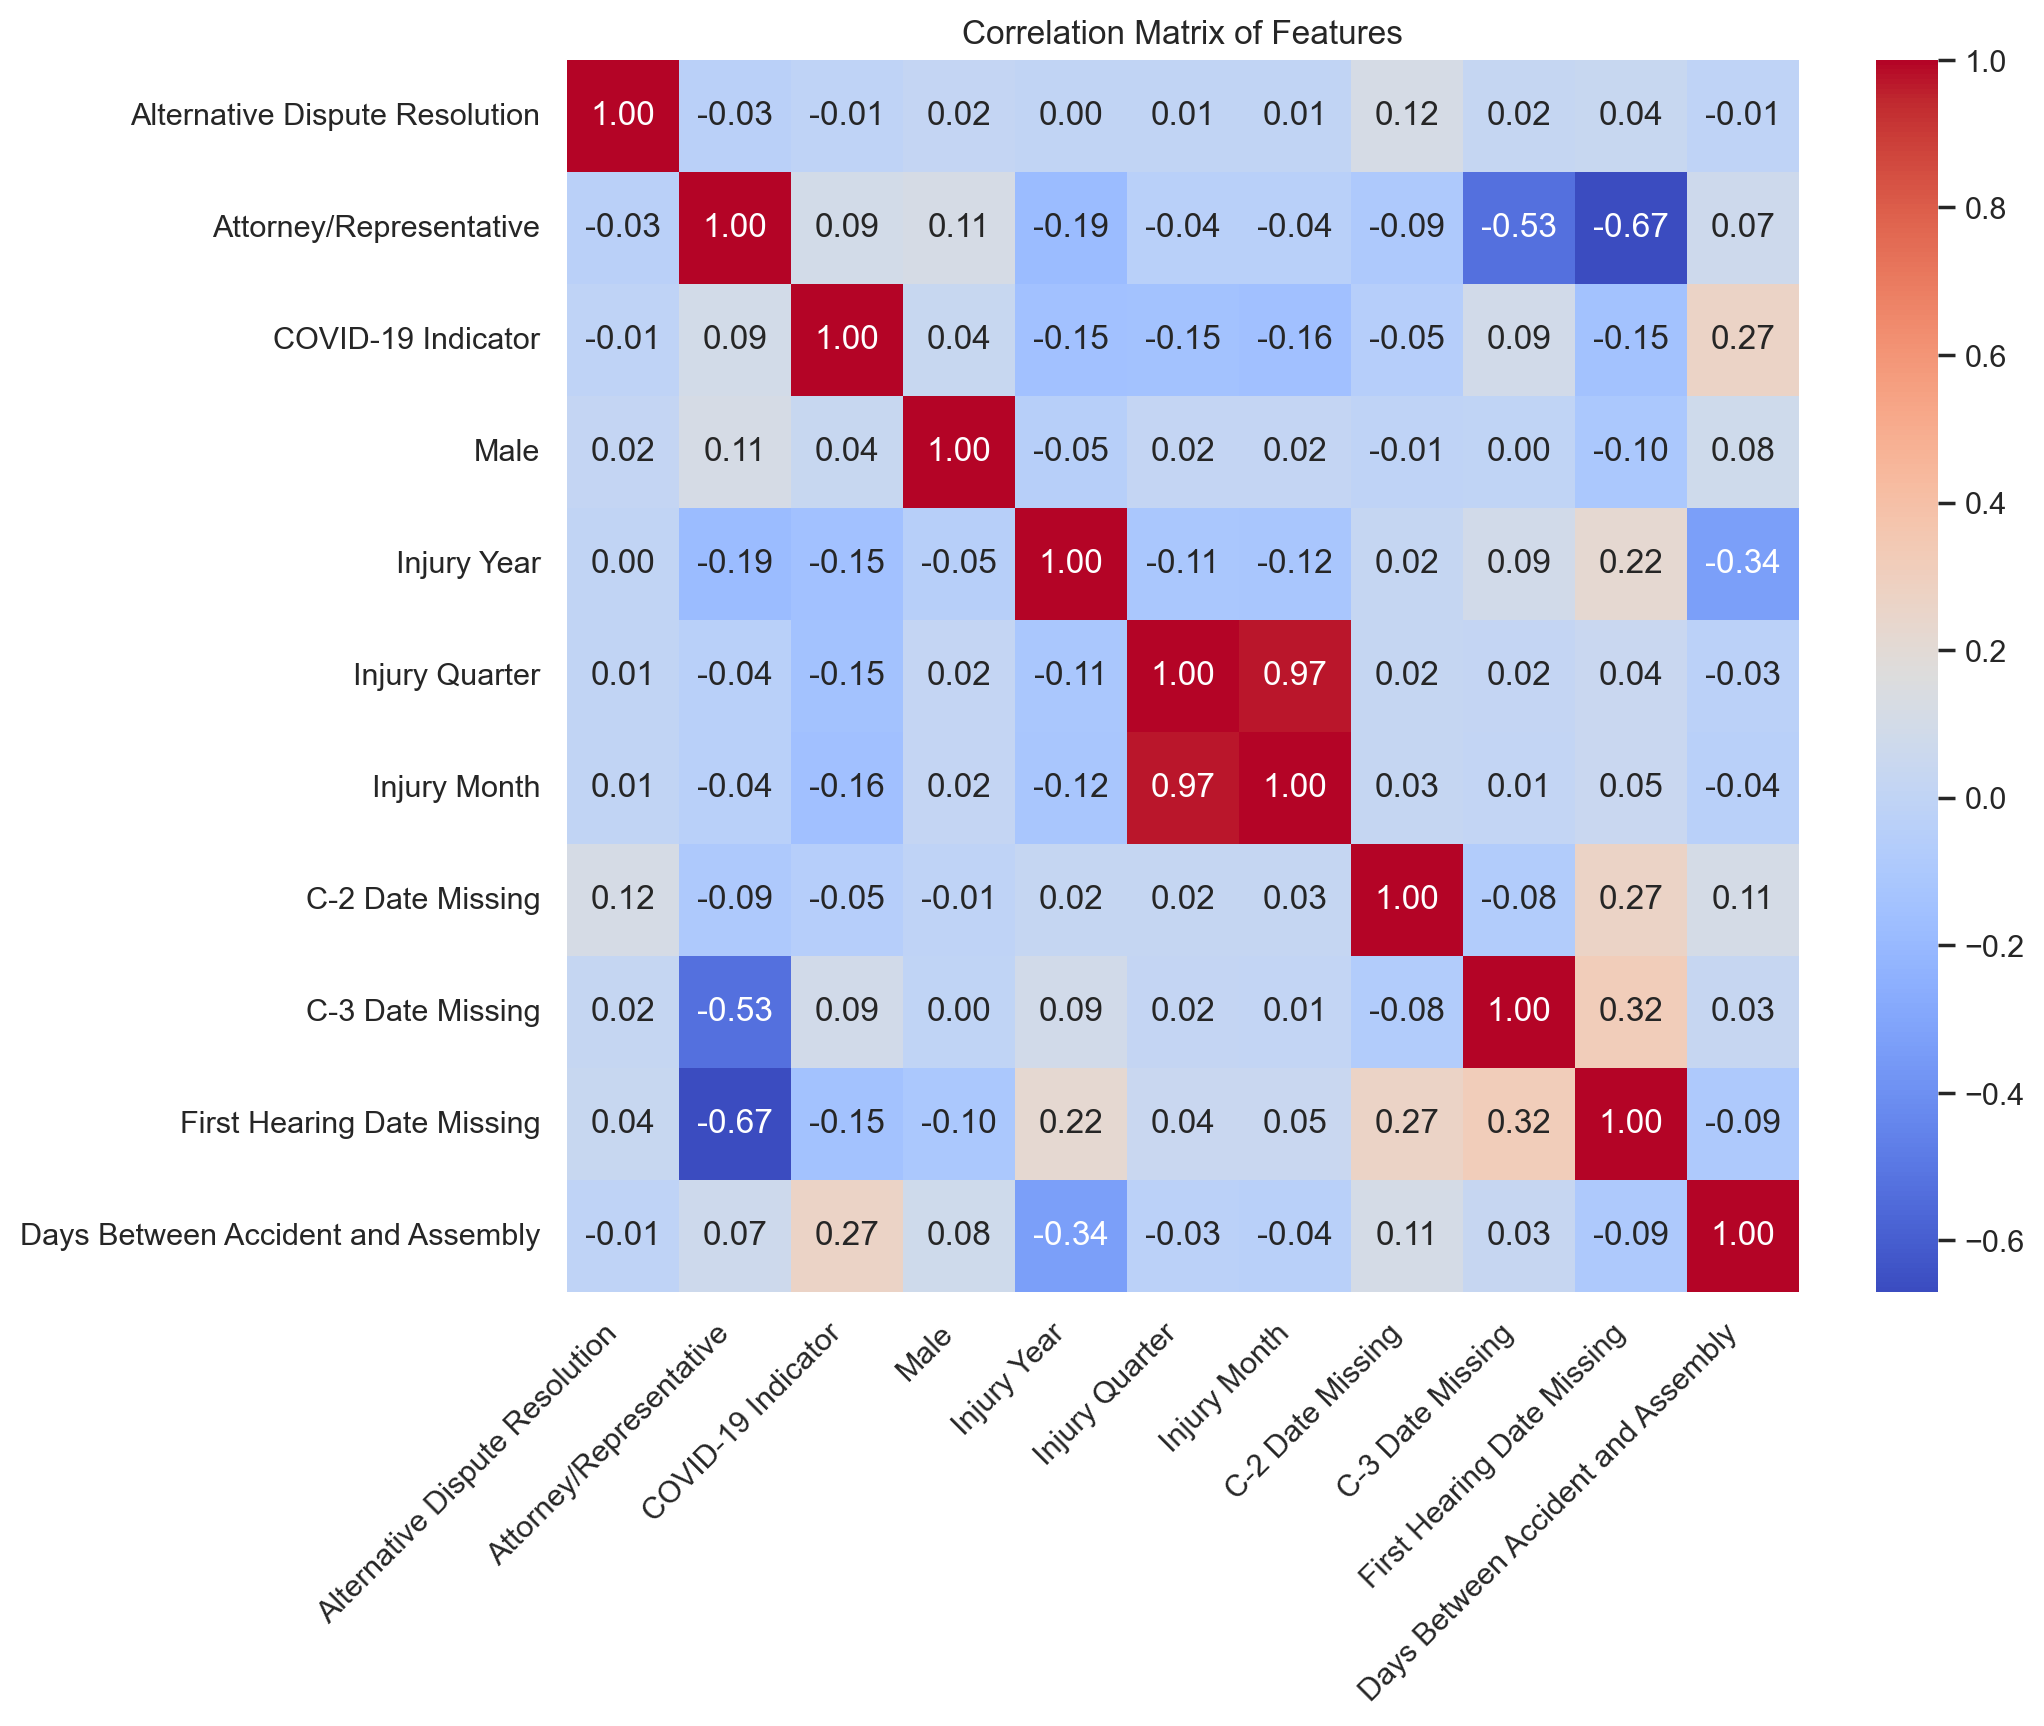

In [768]:
# Compute the correlation matrix for numeric columns
correlation_matrix = X_train_smote[numeric_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)

# Display the plot
plt.title('Correlation Matrix of Features')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# # Function to exclude highly correlated features from selection
# def spearman_selection(X, threshold=0.8):
#     # Calculate the correlation matrix
#     correlation_matrix = X.corr()
    
#     # Create a set to track which features to exclude (due to high correlation)
#     excluded_features = set()

#     # Check for pairs of highly correlated features
#     for i in range(len(correlation_matrix.columns)):
#         for j in range(i):
#             # If the absolute correlation is above the threshold
#             if abs(correlation_matrix.iloc[i, j]) > threshold:
#                 feature_i = correlation_matrix.columns[i]
#                 feature_j = correlation_matrix.columns[j]
#                 # Exclude both features from the set
#                 excluded_features.add(feature_i)
#                 excluded_features.add(feature_j)
    
#     # Return a list of features that are not excluded due to high correlation
#     selected_features = [col for col in X.columns if col not in excluded_features]
    
#     return excluded_features, selected_features

# # Spearman Correlation Feature Selection
# excluded_features_spearman, selected_features_spearman = spearman_selection(X_train_smote[numeric_columns])

# # Print the selected important features
# print(f"Number of Excluded Features (Spearman Correlation): {len(excluded_features_spearman)} / {len(numeric_columns)}")
# print("Excluded Features (Spearman Correlation):", excluded_features_spearman)

Number of Excluded Features (Spearman Correlation): 2 / 11
Excluded Features (Spearman Correlation): {'Injury Month', 'Injury Quarter'}


### Chi-Square Test (Categorical Features)
without smote

In [ ]:
# # Function to test independence between a feature and the target using the Chi-Square test
# def TestIndependence(X, y, var, alpha=0.05):
#     # Create a contingency table (cross-tabulation) of the observed counts
#     dfObserved = pd.crosstab(y, X)
    
#     # Perform the Chi-Square test on the contingency table
#     chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    
#     # If the p-value is less than the alpha, the feature is considered important
#     return p < alpha

# # Initialize list to store important features
# selected_features_chi2 = []

# # Loop over each categorical feature to perform the Chi-Square test
# for var in categorical_columns:
#     if TestIndependence(X_train_feature_selection[var], y_train_encoded, var):
#         selected_features_chi2.append(var)

# # Print the selected important features
# print(f"Number of Selected Features (Chi-Square Test): {len(selected_features_chi2)} / {len(categorical_columns)}")
# print("Selected Features (Chi-Square Test):", selected_features_chi2)

Number of Selected Features (Chi-Square Test): 11 / 11
Selected Features (Chi-Square Test): ['Carrier Type', 'County of Injury', 'District Name', 'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code', 'Age Group at Injury', 'Average Weekly Wage Category']


## 5.3. Wrapper Methods <a id="wrapper"></a>

### RFE

In [ ]:
# # Create a Logistic Regression model
# model = LogisticRegression(random_state=15)

# # Perform RFE
# rfe = RFE(model, n_features_to_select = len(numeric_columns) // 2)
# rfe.fit(X_train_smote[numeric_columns], y_train_smote)

# # Get the selected features
# selected_features_rfe = [col for col, support in zip(numeric_columns, rfe.support_) if support]

# print(f"Number of Selected Features (RFE): {len(selected_features_rfe)} / {len(numeric_columns)}")
# print("Selected Features (RFE):", selected_features_rfe)

Number of Selected Features (RFE): 5 / 11
Selected Features (RFE): ['Alternative Dispute Resolution', 'COVID-19 Indicator', 'Injury Year', 'First Hearing Date Missing', 'Days Between Accident and Assembly']


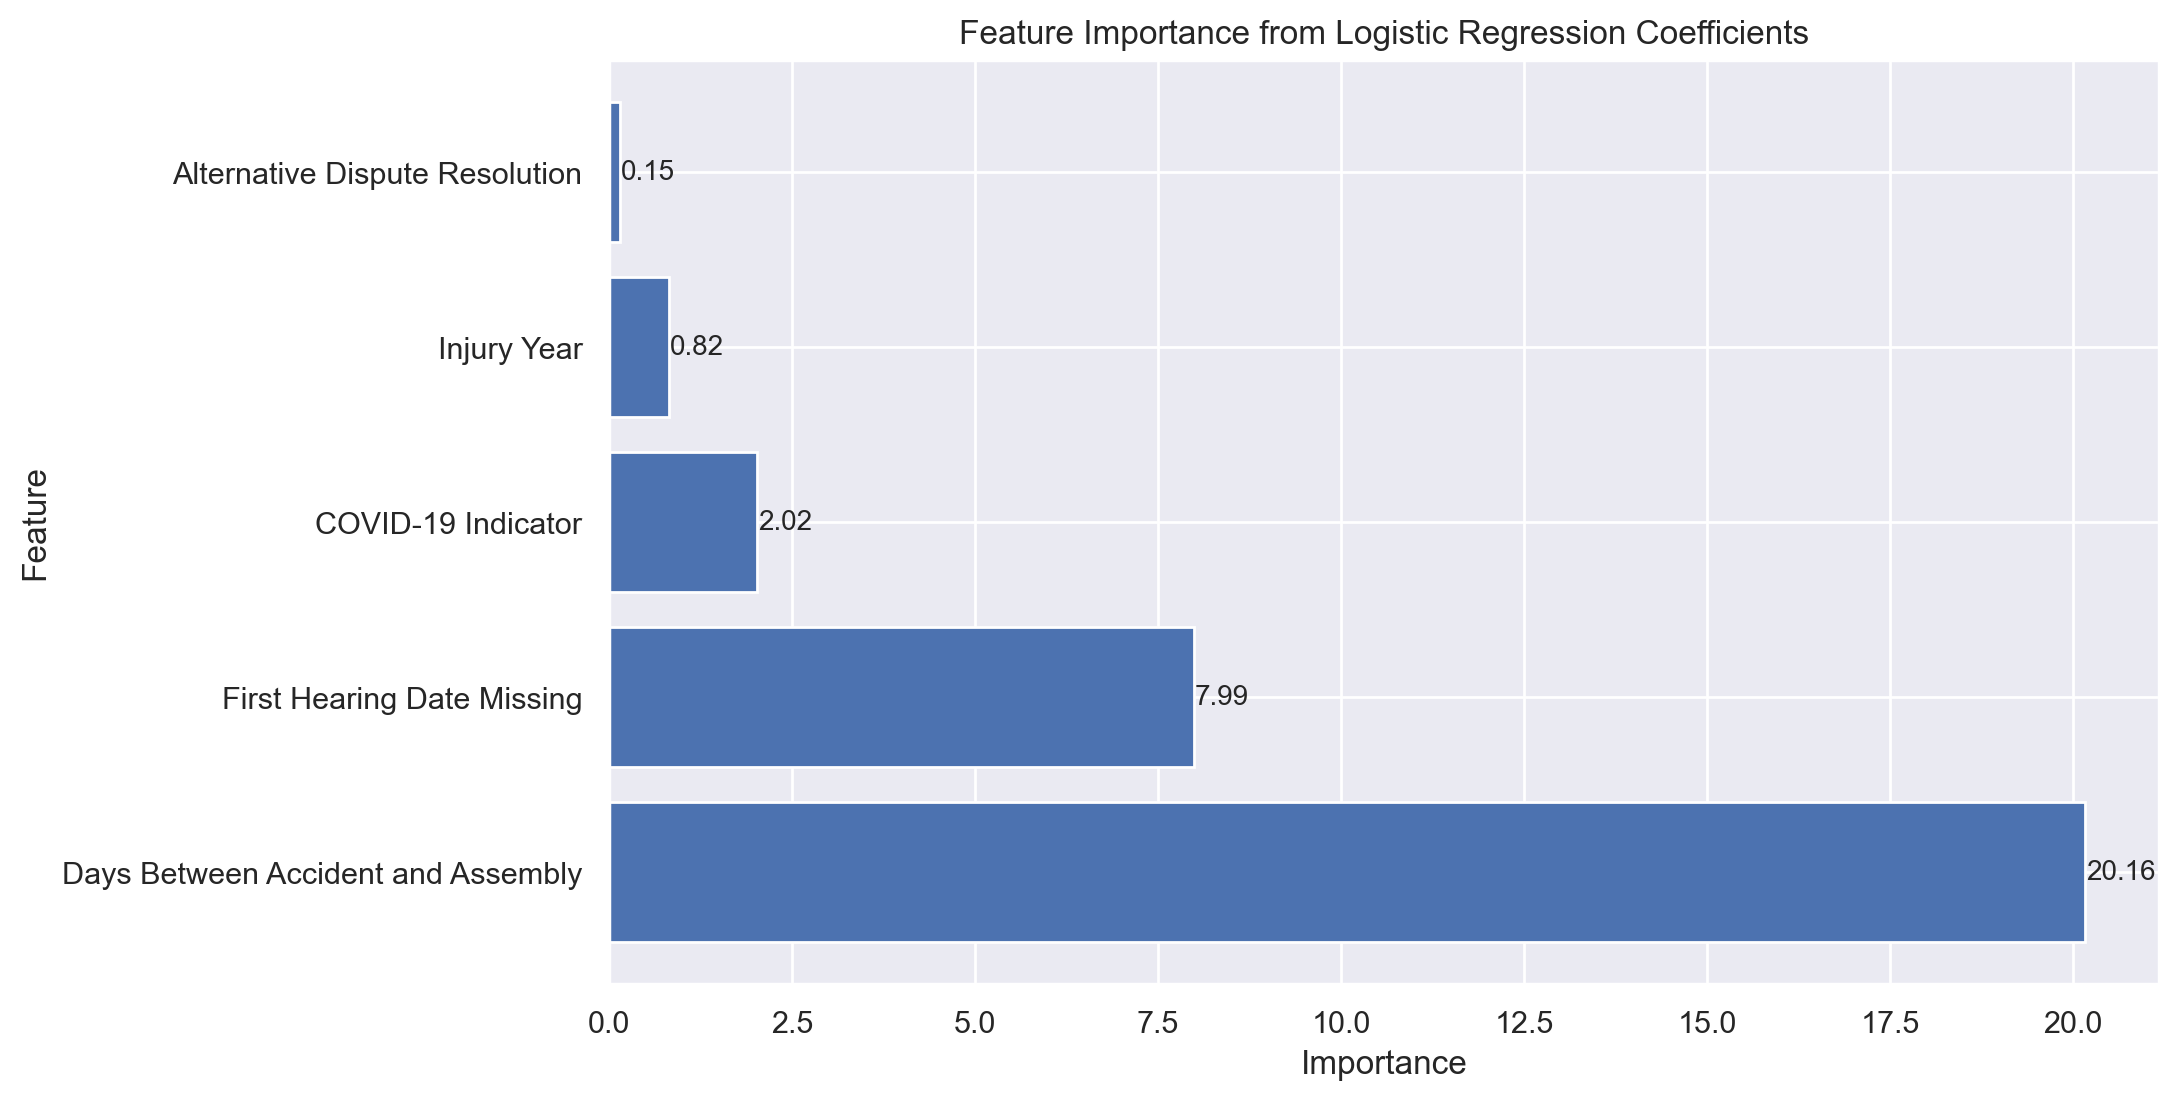

In [ ]:
# Refit the Logistic Regression model with only the selected features
# model.fit(X_train_smote[selected_features_rfe], y_train_smote)

# # Get the coefficients from the fitted Logistic Regression model (which are used as feature importance)
# feature_importance = np.abs(model.coef_[0])

# # Create a DataFrame to pair features with their importance values
# importance_df = pd.DataFrame({
#     'Feature': selected_features_rfe,
#     'Importance': feature_importance
# })

# # Sort by importance
# importance_df = importance_df.sort_values(by='Importance', ascending=False)

# # Create a horizontal bar plot for feature importances
# plt.figure(figsize=(10, 6))
# bars = plt.barh(importance_df['Feature'], importance_df['Importance'])

# # Add labels on top of each bar
# for bar in bars:
#     plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
#              f'{bar.get_width():.2f}', va='center', ha='left', fontsize=10)

# # Label the axes and set title
# plt.xlabel('Importance')
# plt.ylabel('Feature')
# plt.title('Feature Importance from Logistic Regression Coefficients')

# # Show the plot
# plt.show()

## 5.4. Embedded Methods <a id="embedded"></a>

### Decision Tree

In [ ]:
# # Decision Tree Feature Importance
# tree = DecisionTreeClassifier(random_state=15)
# tree.fit(X_train_smote[numeric_columns], y_train_smote)

# # Get feature importances and select those above 0
# importance = pd.Series(tree.feature_importances_, index=numeric_columns)
# selected_features_tree = list(importance[importance > np.median(importance)].index) # threshold determined by visualizing the next plot

# print(f"Number of Selected Features (Decision Tree): {len(selected_features_tree)} / {len(numeric_columns)}")
# print("Selected Features (Decision Tree):", selected_features_tree)

Number of Selected Features (Decision Tree): 5 / 11
Selected Features (Decision Tree): ['Injury Year', 'Injury Month', 'C-2 Date Missing', 'First Hearing Date Missing', 'Days Between Accident and Assembly']


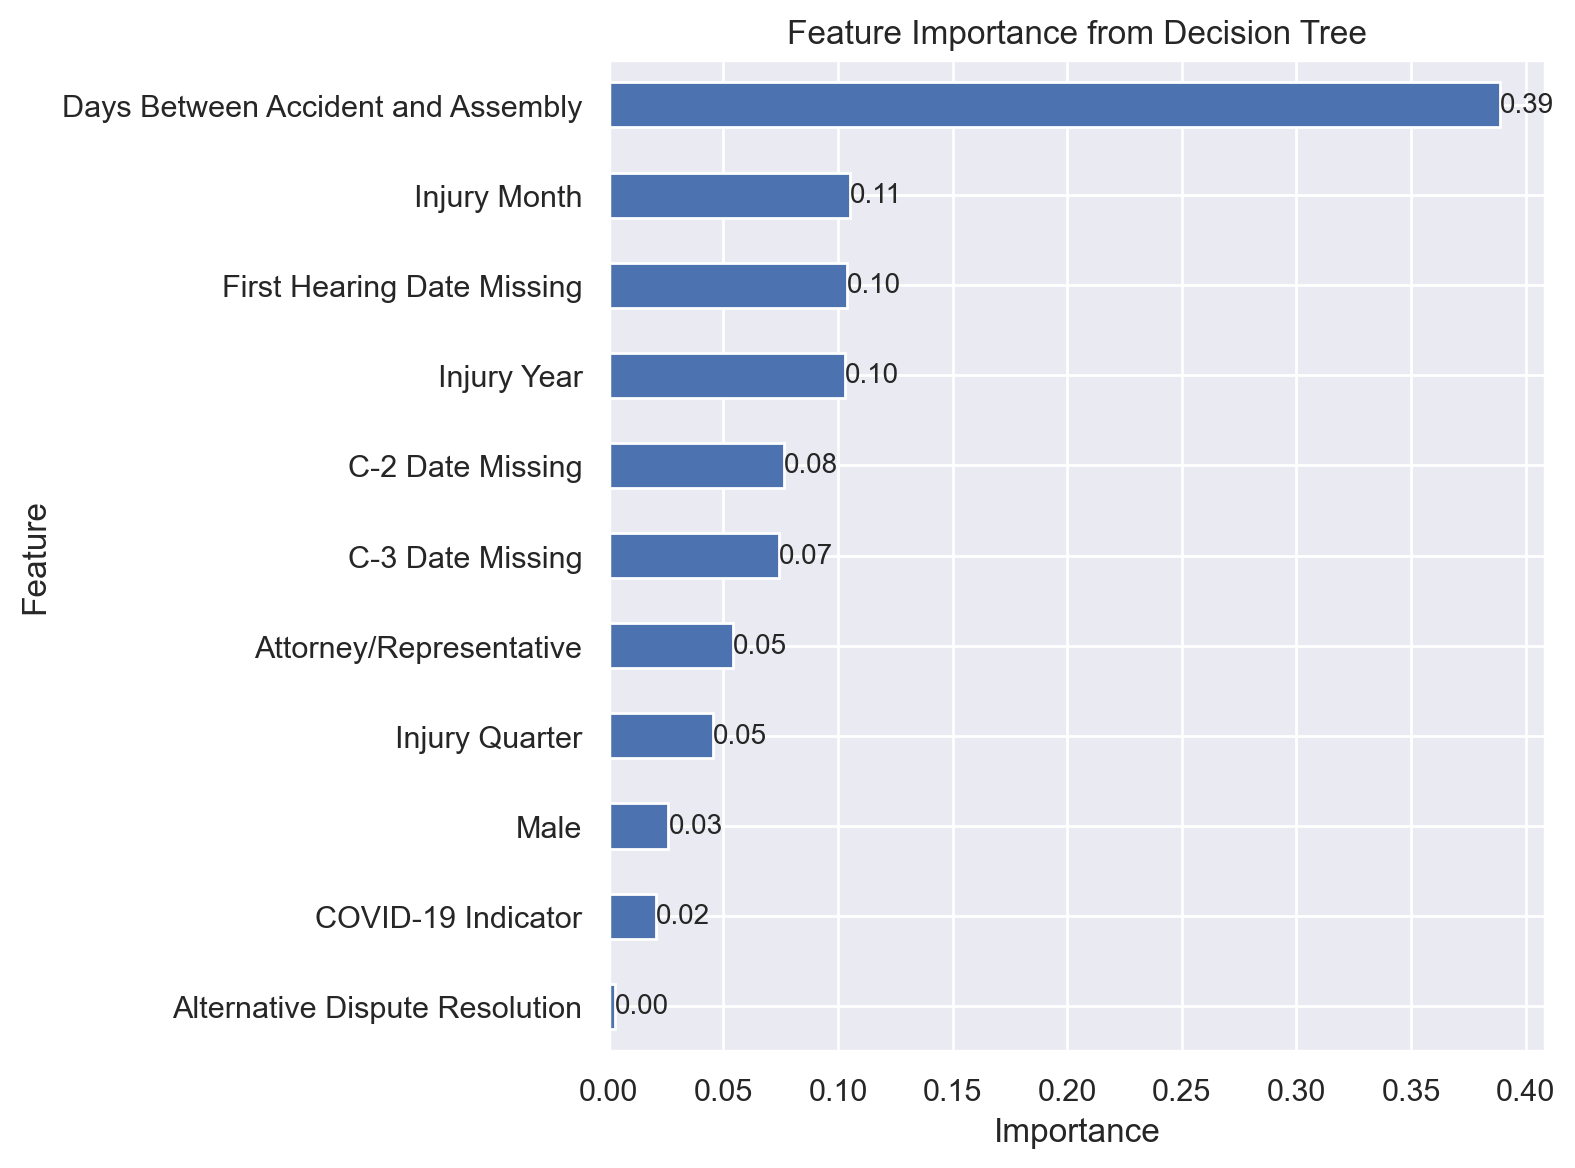

In [ ]:
# # Plot the feature importances (horizontal bar plot)
# importance = pd.Series(tree.feature_importances_, index=numeric_columns)
# importance_sorted = importance.sort_values()

# # Create the horizontal bar plot
# ax = importance_sorted.plot(kind='barh', figsize=(8, 6))

# # Add labels on top of the bars
# for i, value in enumerate(importance_sorted):
#     ax.text(value, i, f'{value:.2f}', ha='left', va='center', fontsize=10)

# # Customize the plot
# plt.title("Feature Importance from Decision Tree")
# plt.xlabel("Importance")
# plt.ylabel("Feature")
# plt.tight_layout()

# # Show the plot
# plt.show()

### Lasso Regression

In [ ]:
# # Lasso Regression Feature Selection
# lasso = LassoCV(random_state=42)
# lasso.fit(X_train_smote[numeric_columns], y_train_smote)

# # Get the features with non-zero coefficients
# lasso_coef = pd.Series(lasso.coef_, index=numeric_columns)
# non_zero_coef = lasso_coef[lasso_coef != 0]
# selected_features_lasso = list(non_zero_coef.index)

# print(f"Number of Selected Features (Lasso Regression): {len(selected_features_lasso)} / {len(numeric_columns)}")
# print("Selected Features (Lasso Regression):", selected_features_lasso)

Number of Selected Features (Lasso Regression): 9 / 11
Selected Features (Lasso Regression): ['Attorney/Representative', 'COVID-19 Indicator', 'Male', 'Injury Year', 'Injury Quarter', 'Injury Month', 'C-2 Date Missing', 'C-3 Date Missing', 'First Hearing Date Missing']


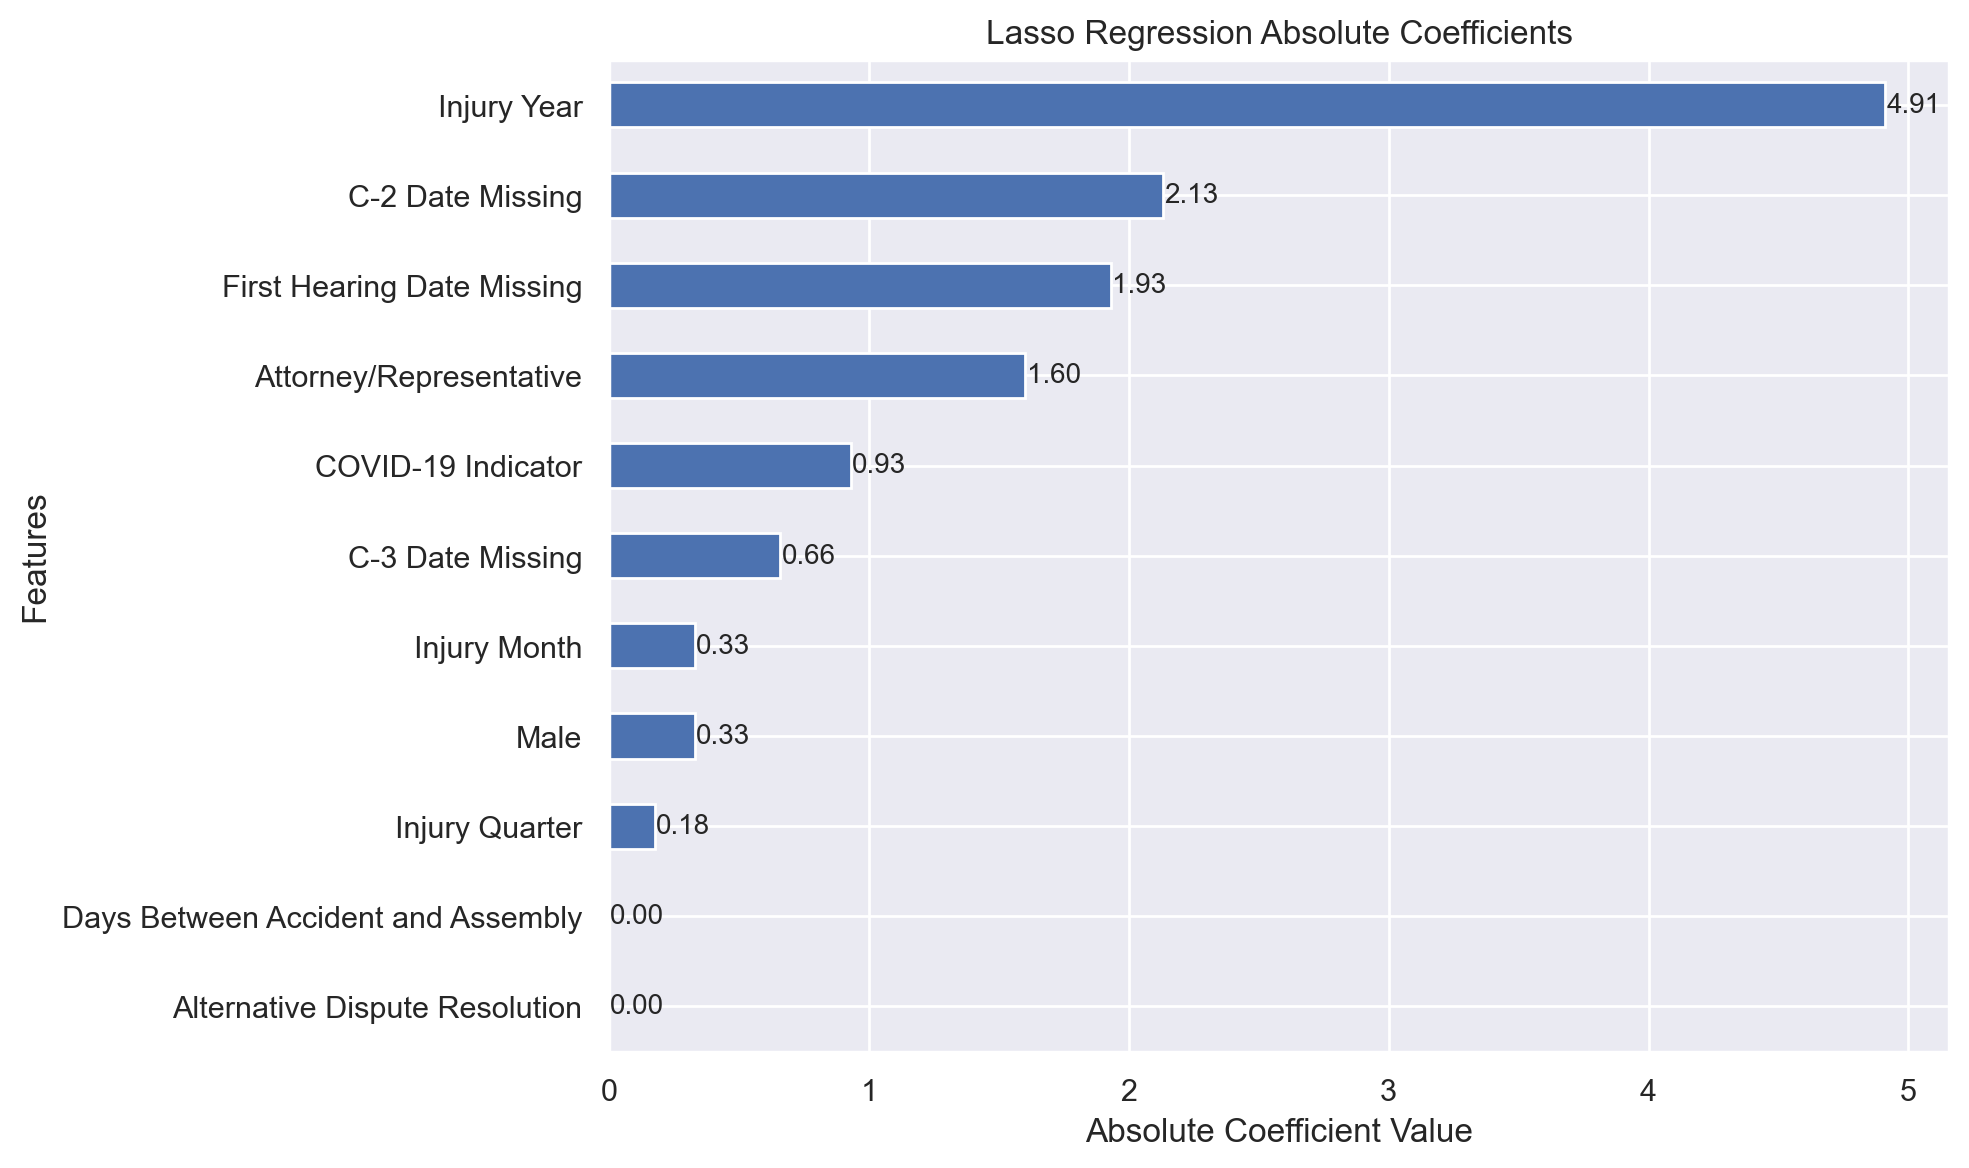

In [ ]:
# # Plot the absolute values of non-zero coefficients horizontally
# plt.figure(figsize=(10, 6))

# # Sort the absolute values of non-zero coefficients
# abs_lasso_coef = lasso_coef.abs().sort_values(ascending=True)

# # Create a horizontal bar plot
# ax = abs_lasso_coef.plot(kind='barh')

# # Add labels on top of the bars
# for i, v in enumerate(abs_lasso_coef):
#     ax.text(v + 0.005, i, f'{v:.2f}', va='center', ha='left', fontsize=10)

# # Customize the plot
# plt.title("Lasso Regression Absolute Coefficients")
# plt.xlabel("Absolute Coefficient Value")
# plt.ylabel("Features")
# plt.tight_layout()

# # Show the plot
# plt.show()

## 5.5. Voting for Feature Selection <a id="voting"></a>

In [ ]:
# # Combine selected numerical features from each method into a DataFrame for voting
# selected_features_all = {
#     'spearman': selected_features_spearman,
#     'rfe': selected_features_rfe,
#     'decision_tree': selected_features_tree,
#     'lasso': selected_features_lasso,
# }

# # Create a DataFrame to track how many methods select each numerical feature
# feature_votes = pd.DataFrame(0, index=numeric_columns, columns=selected_features_all.keys())

# # Fill the DataFrame with votes for each feature (excluding Chi-Square)
# for method, features in selected_features_all.items():
#     feature_votes.loc[features, method] = 1

# # Calculate total votes for each feature (excluding Chi-Square)
# feature_votes['total_votes'] = feature_votes.sum(axis=1)

# # Select features based on vote threshold
# vote_threshold = len(selected_features_all) - 1
# final_selected_numeric_features = feature_votes[feature_votes['total_votes'] >= vote_threshold].index.tolist()

# # Combine features selected through voting with the Chi-Square selected features (categorical variables)
# final_selected_features = final_selected_numeric_features + selected_features_chi2

# print(f"Number of Selected Features (Majority Voting and Chi-Square): {len(final_selected_features)} / {len(numeric_columns + categorical_columns)}")
# print("Selected Features (Majority Voting and Chi-Square):", final_selected_features)

Number of Selected Features (Majority Voting and Chi-Square): 16 / 22
Selected Features (Majority Voting and Chi-Square): ['COVID-19 Indicator', 'Injury Year', 'C-2 Date Missing', 'First Hearing Date Missing', 'Days Between Accident and Assembly', 'Carrier Type', 'County of Injury', 'District Name', 'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code', 'Age Group at Injury', 'Average Weekly Wage Category']


**Note:** The following code exists, just because the teacher won't run the feature selection methods

In [ ]:
final_selected_features = ['COVID-19 Indicator',
                           'Injury Year',
                           'C-2 Date Missing',
                           'First Hearing Date Missing',
                           'Days Between Accident and Assembly', 
                           'Carrier Type', 'County of Injury',
                           'District Name',
                           'Industry Code',
                           'Medical Fee Region',
                           'WCIO Cause of Injury Code',
                           'WCIO Nature of Injury Code',
                           'WCIO Part Of Body Code',
                           'Zip Code',
                           'Age Group at Injury',
                           'Average Weekly Wage Category',
                           ]

Create auxiliary variables

In [778]:
# Separate selected features into numeric and categorical columns
selected_numeric_columns = [col for col in final_selected_features if col in numeric_columns]
selected_categorical_columns = [col for col in final_selected_features if col in categorical_columns]

# Print the selected numeric and categorical columns
print("Selected Numeric Columns:", selected_numeric_columns)
print("Selected Categorical Columns:", selected_categorical_columns)

Selected Numeric Columns: ['COVID-19 Indicator', 'Injury Year', 'C-2 Date Missing', 'First Hearing Date Missing', 'Days Between Accident and Assembly']
Selected Categorical Columns: ['Carrier Type', 'County of Injury', 'District Name', 'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code', 'Age Group at Injury', 'Average Weekly Wage Category']


### Encode Categorical Variables

In [779]:
# Function to perform Ordinal Encoding
def ordinal_encode_train(df_train, df_val, df_test, columns):
    ordinal_encoder = OrdinalEncoder()
    df_train_encoded = df_train.copy()
    df_val_encoded = df_val.copy()
    df_test_encoded = df_test.copy()

    for col in columns:
        # Fit on the training data
        df_train_encoded[col] = ordinal_encoder.fit_transform(df_train[[col]])
        
        # Transform the validation data using the same encoder
        df_val_encoded[col] = ordinal_encoder.transform(df_val[[col]])

        # Transform the test data using the same encoder
        df_test_encoded[col] = ordinal_encoder.transform(df_test[[col]])
    
    return df_train_encoded, df_val_encoded, df_test_encoded

# Function to perform Frequency Encoding
def frequency_encode_train(df_train, df_val, df_test, columns):
    df_train_encoded = df_train.copy()
    df_val_encoded = df_val.copy()
    df_test_encoded = df_test.copy()

    for col in columns:
        # Get frequency of each category based on training data
        freq_map = df_train[col].value_counts().to_dict()
        
        # Map the frequencies to the training data
        df_train_encoded[col] = df_train[col].map(freq_map)
        
        # Map the frequencies to the validation data (using the same mapping)
        df_val_encoded[col] = df_val[col].map(freq_map).fillna(0)  # Fill NaN with 0 for unseen categories
    
        # Map the frequencies to the test data (using the same mapping)
        df_test_encoded[col] = df_test[col].map(freq_map).fillna(0)  # Fill NaN with 0 for unseen categories

    return df_train_encoded, df_val_encoded, df_test_encoded

In [780]:
# Columns to apply Ordinal Encoding (since they have a natural ordering)
ordinal_columns = ['Age Group at Injury',
                   'Average Weekly Wage Category',
                   ]

# Columns to encode with high cardinality (for frequency encoding)
high_cardinality_columns = [col for col in selected_categorical_columns if col not in ordinal_columns]

# Apply Ordinal Encoding for ordinal features
X_train_categorical_encoded, X_val_categorical_encoded, X_test_categorical_encoded = ordinal_encode_train(X_train_feature_selection, 
                                                                                                          X_val_feature_selection,
                                                                                                          X_test_feature_selection,
                                                                                                          ordinal_columns,
                                                                                                          )

# Apply Frequency Encoding for high cardinality categorical features
X_train_categorical_encoded, X_val_categorical_encoded, X_test_categorical_encoded = frequency_encode_train(X_train_categorical_encoded, 
                                                                                                            X_val_categorical_encoded, 
                                                                                                            X_test_categorical_encoded,
                                                                                                            high_cardinality_columns,
                                                                                                            )

# Verify the transformed training data
print("Encoded Training Data:")
X_train_categorical_encoded[selected_categorical_columns]

Encoded Training Data:


,Carrier Type,County of Injury,District Name,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Age Group at Injury,Average Weekly Wage Category
Claim Identifier,,,,,,,,,,,
5904426,87122,2266,35106,72224,105713,8509,13620,14779,212,1.0,4.0
5879638,222364,5221,17014,95743,232443,20926,43830,29767,48,3.0,4.0
5689289,94938,13548,67300,72224,41646,20926,87335,12182,2292,1.0,4.0
5567728,222364,31074,210592,28531,232443,45352,129164,50475,1905,1.0,4.0
5965798,94938,12095,34714,72224,66116,29359,87335,32946,626,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
5755378,222364,41554,210592,28531,232443,9296,43830,29767,1975,0.0,2.0
6041587,222364,1908,34714,20432,105713,26123,28140,2238,209,0.0,4.0
5640543,222364,31074,210592,12586,232443,19770,20313,8630,1255,0.0,4.0


Create final training datasets with numeric (after SMOTE) and categorical features
- We were having difficulties, because the training with numeric features as much more rows than the training with categorical features, due to SMOTE
- Therefore, if we combine both training datasets into a single one, the synthetic rows will have only missing values in categorical data
- In the future, we'll solve this problem, because SMOTE is very important (the dataset is very imbalanced)

In [781]:
# # Ensure categorical data has the correct index after encoding
# X_train_categorical_encoded = X_train_categorical_encoded[selected_categorical_columns].reset_index(drop=True)

# # Combine the SMOTE numeric data with the encoded categorical data for the training set
# # the problem: the synthetic rows will have missing in categorical features
# X_train_final = pd.concat([X_train_smote.reset_index(drop=True),
#                            X_train_categorical_encoded], axis=1)

# # Display final training data
# X_train_final

<div class="alert alert-block alert-success"> <a id = "modelling_and_assessment"></a>


## 6. Modelling and Assessment

## K-Fold Cross-Validation

In [782]:
X_train_modelling = X_train_categorical_encoded[final_selected_features].copy()
X_val_modelling = X_val_categorical_encoded[final_selected_features].copy()

# Convert y_train_encoded and y_val_encoded from NumPy arrays to DataFrames
y_train_encoded = pd.DataFrame(y_train_encoded, columns=['Claim Injury Type'])
y_val_encoded = pd.DataFrame(y_val_encoded, columns=['Claim Injury Type'])

**Note:** We are using the F1 score to evaluate our models due to the dataset’s imbalance (currently, without applying SMOTE). The F1 score provides a balanced measure of precision and recall, ensuring the model performs well on minority classes without being skewed by the majority class, as can happen with accuracy.

In [783]:
# Function to calculate average F1 score using (Repeated) K-Fold Cross Validation
def model_avg_score(method, model, X, y):
    f1_train = []
    f1_test = []
    
    for train_index, test_index in method.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on training and testing set
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate and append F1 Score (using average='weighted' to help balance the impact of class imbalances)
        f1_train.append(f1_score(y_train, y_train_pred, average='weighted'))
        f1_test.append(f1_score(y_test, y_test_pred, average='weighted'))
    
    print('Average F1 Scores - Train:', round(np.mean(f1_train), 2))
    print('Average F1 Scores - Test:', round(np.mean(f1_test), 2))

### Models Created
We chose these models based on their suitability for multi-class classification:
- Logistic Regression: A simple, interpretable model ideal for linear relationships in multi-class problems.
- Random Forest Classifier: An ensemble method that enhances accuracy, handles numerous features, and reduces overfitting.
- XGBoost Classifier: A powerful model that builds trees sequentially to improve accuracy, excelling with structured data.

In [ ]:
# rkf = RepeatedKFold(n_splits=6, n_repeats=2)
# lr = LogisticRegression()
# model_avg_score(rkf, lr, X_train_modelling, y_train_encoded)

Average F1 Scores - Train: 0.36
Average F1 Scores - Test: 0.36


In [ ]:
# rkf = RepeatedKFold(n_splits=6, n_repeats=2)
# rfc = RandomForestClassifier()
# model_avg_score(rkf, rfc, X_train_modelling, y_train_encoded)

Average F1 Scores - Train: 1.0
Average F1 Scores - Test: 0.72


In [788]:
rkf = RepeatedKFold(n_splits=6, n_repeats=2)
xgbc = XGBClassifier()
model_avg_score(rkf, xgbc, X_train_modelling, y_train_encoded)

Average F1 Scores - Train: 0.74
Average F1 Scores - Test: 0.73


**Note:** Support Vector Machine takes a lot of time to run

In [789]:
# rkf = RepeatedKFold(n_splits=6, n_repeats=2)
# svc = SVC()
# model_avg_score(rkf, svc, X_train_modelling, y_train_encoded)

**Conclusion:**

Based on the average F1 scores:
- Logistic Regression: Low F1 scores (0.36 for both train and test), indicating poor performance.
- Random Forest: High train F1 score (1.0) and good test F1 score (0.72), indicating strong model performance but very likely overfitting.
- XGBoost: Balanced performance with good and very similar F1 scores for train and test (0.74 and 0.73, respectively), indicating robustness without overfitting.

**Best Model: XGBoost**

<div class="alert alert-block alert-success"> <a id = "deployment"></a>

## 7. Deployment

In [790]:
X_test_deployment = X_test_categorical_encoded[final_selected_features].copy()

In [791]:
# Check how should be the submission file
df_sample_submission

,Claim Identifier,Claim Injury Type
0,6165911,2. NON-COMP
1,6166141,2. NON-COMP
2,6165907,2. NON-COMP
3,6166047,2. NON-COMP
4,6166102,2. NON-COMP
...,...,...
387970,6553137,2. NON-COMP
387971,6553119,2. NON-COMP
387972,6553542,2. NON-COMP
387973,6553455,2. NON-COMP


In [792]:
# Check final test data (after treatment)
X_test_deployment.head()

,COVID-19 Indicator,Injury Year,C-2 Date Missing,First Hearing Date Missing,Days Between Accident and Assembly,Carrier Type,County of Injury,District Name,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Age Group at Injury,Average Weekly Wage Category
Claim Identifier,,,,,,,,,,,,,,,,
6165911,0.0,1.0,0.0,1.0,0.000969,222364.0,31074,210592,28531,232443,25052,87335,9140,1818.0,4.0,4.0
6166141,0.0,1.0,0.0,1.0,0.004628,222364.0,45322,210592,14164,232443,14430,87335,6227,1107.0,4.0,4.0
6165907,0.0,1.0,0.0,1.0,0.000753,222364.0,19964,210592,16410,41646,8509,43830,895,219.0,2.0,4.0
6166047,0.0,1.0,0.0,1.0,0.000538,222364.0,45322,210592,28531,232443,9479,87335,37698,612.0,2.0,4.0
6166102,0.0,1.0,0.0,1.0,0.001399,222364.0,41554,210592,264,232443,9793,37128,9806,1975.0,4.0,4.0


In [793]:
# Predict the 'Claim Injury Type' for the test dataset by using the trained model
X_test_deployment['Claim Injury Type'] = xgbc.predict(X_test_deployment)

# Decode the predicted labels back to their original categorical values
X_test_deployment['Claim Injury Type'] = label_encoder.inverse_transform(X_test_deployment['Claim Injury Type'])

In [794]:
# Prepare the submission DataFrame with the necessary columns (reset the index to treat 'Claim Identifier' as a column)
df_submission = X_test_deployment.reset_index()[['Claim Identifier', 'Claim Injury Type']]

# Check the submission DataFrame
df_submission

,Claim Identifier,Claim Injury Type
0,6165911,2. NON-COMP
1,6166141,2. NON-COMP
2,6165907,2. NON-COMP
3,6166047,2. NON-COMP
4,6166102,2. NON-COMP
...,...,...
387970,6553137,2. NON-COMP
387971,6553119,1. CANCELLED
387972,6553542,1. CANCELLED
387973,6553455,2. NON-COMP


In [796]:
# Prepare the submission DataFrame with the necessary columns (reset the index to treat 'Claim Identifier' as a column)
df_submission = X_test_deployment['Claim Injury Type']

# Check the submission DataFrame
df_submission

Claim Identifier
6165911     2. NON-COMP
6166141     2. NON-COMP
6165907     2. NON-COMP
6166047     2. NON-COMP
6166102     2. NON-COMP
               ...     
6553137     2. NON-COMP
6553119    1. CANCELLED
6553542    1. CANCELLED
6553455     2. NON-COMP
6553594     2. NON-COMP
Name: Claim Injury Type, Length: 387975, dtype: object

In [797]:
# Export test data predictions
df_submission.to_csv('Group_38_predictions.csv')